# CIFAR100 Image Classification - Coloured

Name: Soh Hong Yu<br/><br/>
Admin Number: P2100775<br/><br/>
Class: DAAA/FT/2B/01<br/><br/>
Module Code: ST1504 Deep Learning<br/>

<hr>
<h3>References (In Harvard format):</h3>
<ol>
  <li>Krizhevsky, A., Nair, V. and Hinton, G. (2009) The CIFAR-10 dataset and CIFAR-100 dataset, CIFAR-10 and CIFAR-100 datasets. <br/>Available at: <a href="https://www.cs.toronto.edu/~kriz/cifar.html">https://www.cs.toronto.edu/~kriz/cifar.html</a> (Accessed: November 24, 2022). </li>
  <li>User, D. (2022) An overview of state of the art (SOTA) deep neural networks (dnns), Deci. <br/>Available at: <a href="https://deci.ai/blog/sota-dnns-overview/">https://deci.ai/blog/sota-dnns-overview/</a> (Accessed: November 19, 2022). </li>
  <li>Cox, S. (2021) The overlooked technique of image averaging, Photography Life. <br/>Available at: <a href="https://photographylife.com/image-averaging-technique">https://photographylife.com/image-averaging-technique</a> (Accessed: November 19, 2022). </li>
  <li>Gupta, A. et al. (2021) Adam vs. SGD: Closing the generalization gap on Image Classiﬁcation, Adam vs. SGD: Closing the generalization gap on image classification. <br/>Available at: <a href="https://www.opt-ml.org/papers/2021/paper53.pdf">https://www.opt-ml.org/papers/2021/paper53.pdf</a> (Accessed: November 19, 2022). </li>
  <li>Nelson, J. (2020) Why and how to implement random crop data augmentation, Roboflow Blog. Roboflow Blog. <br/>Available at: <a href="https://blog.roboflow.com/why-and-how-to-implement-random-crop-data-augmentation">https://blog.roboflow.com/why-and-how-to-implement-random-crop-data-augmentation</a> (Accessed: November 19, 2022). </li>
  <li>Zvornicanin, E. (2022) Convolutional Neural Network vs. Regular Neural Network, Baeldung on Computer Science. <br/>Available at: <a href="https://www.baeldung.com/cs/convolutional-vs-regular-nn">https://www.baeldung.com/cs/convolutional-vs-regular-nn</a> (Accessed: November 19, 2022). </li>
  <li>Baker, J. (2021) 8.2. networks using blocks (VGG)¶ <br/>Available at: <a href="https://d2l.ai/chapter_convolutional-modern/vgg.html">https://d2l.ai/chapter_convolutional-modern/vgg.html</a> (Accessed: November 19, 2022). </li>
  <li>Shinde, Y. (2021) How to code your resnet from scratch in tensorflow? , Analytics Vidhya. <br/>Available at: <a href="https://www.analyticsvidhya.com/blog/2021/08/how-to-code-your-resnet-from-scratch-in-tensorflow">https://www.analyticsvidhya.com/blog/2021/08/how-to-code-your-resnet-from-scratch-in-tensorflow</a> (Accessed: November 19, 2022). </li>
  <li>Baker, J. (2021) 8.6. residual networks (ResNet) <br/>Available at: <a href="https://d2l.ai/chapter_convolutional-modern/resnet.html">https://d2l.ai/chapter_convolutional-modern/resnet.html</a> (Accessed: November 19, 2022). </li>
  <li>Debanga Raj Neog, P.D. (2020) Cutmix augmentation in python, Medium. Depurr. <br/>Available at: <a href="https://medium.com/depurr/cutmix-augmentation-in-python-bf099a97afac">https://medium.com/depurr/cutmix-augmentation-in-python-bf099a97afac</a> (Accessed: November 25, 2022). </li>
  <li>Tan, M. and Le, Q.V. (2021) EFFICIENTNETV2: Smaller models and faster training, arXiv.org. <br/>Available at: <a href="https://arxiv.org/abs/2104.00298v3">https://arxiv.org/abs/2104.00298v3</a> (Accessed: November 25, 2022). </li>
  <li>Tan, et (2019) Papers with code - efficientnet explained, Explained | Papers With Code. <br/>Available at: <a href="https://paperswithcode.com/method/efficientnet">https://paperswithcode.com/method/efficientnet</a> (Accessed: November 25, 2022). </li>
</ol>


# Project Objective

Implement an image classifier using a deep learning network


# Background Information

This dataset is just like the CIFAR-10, except it has 100 classes containing 600 images each. There are 500 training images and 100 testing images per class. The 100 classes in the CIFAR-100 are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs).
Here is the list of classes in the CIFAR-100:


# Initialising Libraries and Variables


In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from keras.utils import to_categorical
import keras_tuner as kt
from keras.regularizers import l1, l2
from keras.layers import AveragePooling2D, ZeroPadding2D, BatchNormalization, Activation, MaxPool2D, Add
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Normalization, Dense, Conv2D, Dropout, BatchNormalization, ReLU
from keras.models import Sequential
from keras.models import Model
from keras import Input
from keras.optimizers import *
from keras.callbacks import EarlyStopping
import visualkeras
from keras.layers import GlobalAveragePooling2D

# Checking GPU


In [ ]:
# Check if Cuda GPU is available
tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Loading Datasets


In [ ]:
df = tf.keras.datasets.cifar100.load_data(label_mode="fine")


In [ ]:
(x_train_val, y_train_val), (x_test, y_test) = df


As the training set will be used to train the model, we will need a set of data for model tuning, and the testing set will be used to evaluate the final model, ensuring the model is generalise and not overfit to the validation set due to model tuning.

To decide what size of the validation set, I have decided to split the data by 80:20 of the train set as the validation set.

Training set - 40000<br/>
Validation set - 10000<br/>
Testing set - 10000<br/>


In [ ]:
train_size = 40000
x_train, y_train = x_train_val[:train_size], y_train_val[:train_size]
x_val, y_val = x_train_val[train_size:], y_train_val[train_size:]

# Exploratory Data Analysis

We will begin by conducting an exploratory data analysis of the data, to gain a better understanding of the characteristics of the dataset.


x_train: uint8 NumPy array of grayscale image data with shapes (50000, 32, 32, 3), containing the training data. Pixel values range from 0 to 255.

y_train: uint8 NumPy array of labels (integers in range 0-99) with shape (50000, 1) for the training data.

x_test: uint8 NumPy array of grayscale image data with shapes (10000, 32, 32, 3), containing the test data. Pixel values range from 0 to 255.

y_test: uint8 NumPy array of labels (integers in range 0-99) with shape (10000, 1) for the test data.


There are 100 different type of labels in the dataset. From the dataset, each value represent an item. The following list is the description of each value.

Item Labels

- 0 : apple
- 1 : aquarium_fish
- 2 : baby
- 3 : bear
- 4 : beaver
- 5 : bed
- 6 : bee
- 7 : beetle
- 8 : bicycle
- 9 : bottle
- 10 : bowl
- 11 : boy
- 12 : bridge
- 13 : bus
- 14 : butterfly
- 15 : camel
- 16 : can
- 17 : castle
- 18 : caterpillar
- 19 : cattle
- 20 : chair
- 21 : chimpanzee
- 22 : clock
- 23 : cloud
- 24 : cockroach
- 25 : couch
- 26 : crab
- 27 : crocodile
- 28 : cup
- 29 : dinosaur
- 30 : dolphin
- 31 : elephant
- 32 : flatfish
- 33 : forest
- 34 : fox
- 35 : girl
- 36 : hamster
- 37 : house
- 38 : kangaroo
- 39 : keyboard
- 40 : lamp
- 41 : lawn_mower
- 42 : leopard
- 43 : lion
- 44 : lizard
- 45 : lobster
- 46 : man
- 47 : maple_tree
- 48 : motorcycle
- 49 : mountain
- 50 : mouse
- 51 : mushroom
- 52 : oak_tree
- 53 : orange
- 54 : orchid
- 55 : otter
- 56 : palm_tree
- 57 : pear
- 58 : pickup_truck
- 59 : pine_tree
- 60 : plain
- 61 : plate
- 62 : poppy
- 63 : porcupine
- 64 : possum
- 65 : rabbit
- 66 : raccoon
- 67 : ray
- 68 : road
- 69 : rocket
- 70 : rose
- 71 : sea
- 72 : seal
- 73 : shark
- 74 : shrew
- 75 : skunk
- 76 : skyscraper
- 77 : snail
- 78 : snake
- 79 : spider
- 80 : squirrel
- 81 : streetcar
- 82 : sunflower
- 83 : sweet_pepper
- 84 : table
- 85 : tank
- 86 : telephone
- 87 : television
- 88 : tiger
- 89 : tractor
- 90 : train
- 91 : trout
- 92 : tulip
- 93 : turtle
- 94 : wardrobe
- 95 : whale
- 96 : willow_tree
- 97 : wolf
- 98 : woman
- 99 : worm

Superclass Labels

- 4, 30, 55, 72, 95 : aquatic mammals
- 1, 32, 67, 73, 91 : fish
- 54, 62, 70, 82, 92 : flowers
- 9, 10, 16, 28, 61 : food containers
- 0, 51, 53, 57, 83 : fruit and vegetables
- 22, 39, 40, 86, 87 : household electrical devices
- 5, 20, 25, 84, 94 : household furniture
- 6, 7, 14, 18, 24 : insects
- 3, 42, 43, 88, 97 : large carnivores
- 12, 17, 37, 68, 76 : large man-made outdoor things
- 23, 33, 49, 60, 71 : large natural outdoor scenes
- 15, 19, 21, 31, 38 : large omnivores and herbivores
- 34, 63, 64, 66, 75 : medium-sized mammals
- 26, 45, 77, 79, 99 : non-insect invertebrates
- 2, 11, 35, 46, 98 : people
- 27, 29, 44, 78, 93 : reptiles
- 36, 50, 65, 74, 80 : small mammals
- 47, 52, 56, 59, 96 : trees
- 8, 13, 48, 58, 90 : vehicles 1
- 41, 69, 81, 85, 89 : vehicles 2

In [ ]:
# super class labels
super_class_labels = {
    "aquatic mammals": [4, 30, 55, 72, 95],
    "fish": [1, 32, 67, 73, 91],
    "flowers": [54, 62, 70, 82, 92],
    "food containers": [9, 10, 16, 28, 61],
    "fruit and vegetables": [0, 51, 53, 57, 83],
    "household electrical devices": [22, 39, 40, 86, 87],
    "household furniture": [5, 20, 25, 84, 94],
    "insects": [6, 7, 14, 18, 24],
    "large carnivores": [3, 42, 43, 88, 97],
    "large man-made outdoor things": [12, 17, 37, 68, 76],
    "large natural outdoor scenes": [23, 33, 49, 60, 71],
    "large omnivores and herbivores": [15, 19, 21, 31, 38],
    "medium-sized mammals": [34, 63, 64, 66, 75],
    "non-insect invertebrates": [26, 45, 77, 79, 99],
    "people": [2, 11, 35, 46, 98],
    "reptiles": [27, 29, 44, 78, 93],
    "small mammals": [36, 50, 65, 74, 80],
    "trees": [47, 52, 56, 59, 96],
    "vehicles 1": [8, 13, 48, 58, 90],
    "vehicles 2": [41, 69, 81, 85, 89],
}

# coarse labels
coarse_labels = {
    0 : "aquatic mammals",
    1 : "fish",
    2 : "flowers",
    3 : "food containers",
    4 : "fruit and vegetables",
    5 : "household electrical devices",
    6 : "household furniture",
    7 : "insects",
    8 : "large carnivores",
    9 : "large man-made outdoor things",
    10 : "large natural outdoor scenes",
    11 : "large omnivores and herbivores",
    12 : "medium-sized mammals",
    13 : "non-insect invertebrates",
    14 : "people",
    15 : "reptiles",
    16 : "small mammals",
    17 : "trees",
    18 : "vehicles 1",
    19 : "vehicles 2",
}

# class labels
class_labels = {
    0: "apple",
    1: "aquarium_fish",
    2: "baby",
    3: "bear",
    4: "beaver",
    5: "bed",
    6: "bee",
    7: "beetle",
    8: "bicycle",
    9: "bottle",
    10: "bowl",
    11: "boy",
    12: "bridge",
    13: "bus",
    14: "butterfly",
    15: "camel",
    16: "can",
    17: "castle",
    18: "caterpillar",
    19: "cattle",
    20: "chair",
    21: "chimpanzee",
    22: "clock",
    23: "cloud",
    24: "cockroach",
    25: "couch",
    26: "crab",
    27: "crocodile",
    28: "cup",
    29: "dinosaur",
    30: "dolphin",
    31: "elephant",
    32: "flatfish",
    33: "forest",
    34: "fox",
    35: "girl",
    36: "hamster",
    37: "house",
    38: "kangaroo",
    39: "keyboard",
    40: "lamp",
    41: "lawn_mower",
    42: "leopard",
    43: "lion",
    44: "lizard",
    45: "lobster",
    46: "man",
    47: "maple_tree",
    48: "motorcycle",
    49: "mountain",
    50: "mouse",
    51: "mushroom",
    52: "oak_tree",
    53: "orange",
    54: "orchid",
    55: "otter",
    56: "palm_tree",
    57: "pear",
    58: "pickup_truck",
    59: "pine_tree",
    60: "plain",
    61: "plate",
    62: "poppy",
    63: "porcupine",
    64: "possum",
    65: "rabbit",
    66: "raccoon",
    67: "ray",
    68: "road",
    69: "rocket",
    70: "rose",
    71: "sea",
    72: "seal",
    73: "shark",
    74: "shrew",
    75: "skunk",
    76: "skyscraper",
    77: "snail",
    78: "snake",
    79: "spider",
    80: "squirrel",
    81: "streetcar",
    82: "sunflower",
    83: "sweet_pepper",
    84: "table",
    85: "tank",
    86: "telephone",
    87: "television",
    88: "tiger",
    89: "tractor",
    90: "train",
    91: "trout",
    92: "tulip",
    93: "turtle",
    94: "wardrobe",
    95: "whale",
    96: "willow_tree",
    97: "wolf",
    98: "woman",
    99: "worm",
}

NUM_CLASS = 100

Each image is a 32x32 image as well as 3 color channel [RGB] (coloured image). Therefore, we can set the IMG_SIZE as a tuple (32, 32, 3)


In [ ]:
IMG_SIZE = (32, 32, 3)


### Visualising the Dataset

Let's look at what the images look like.


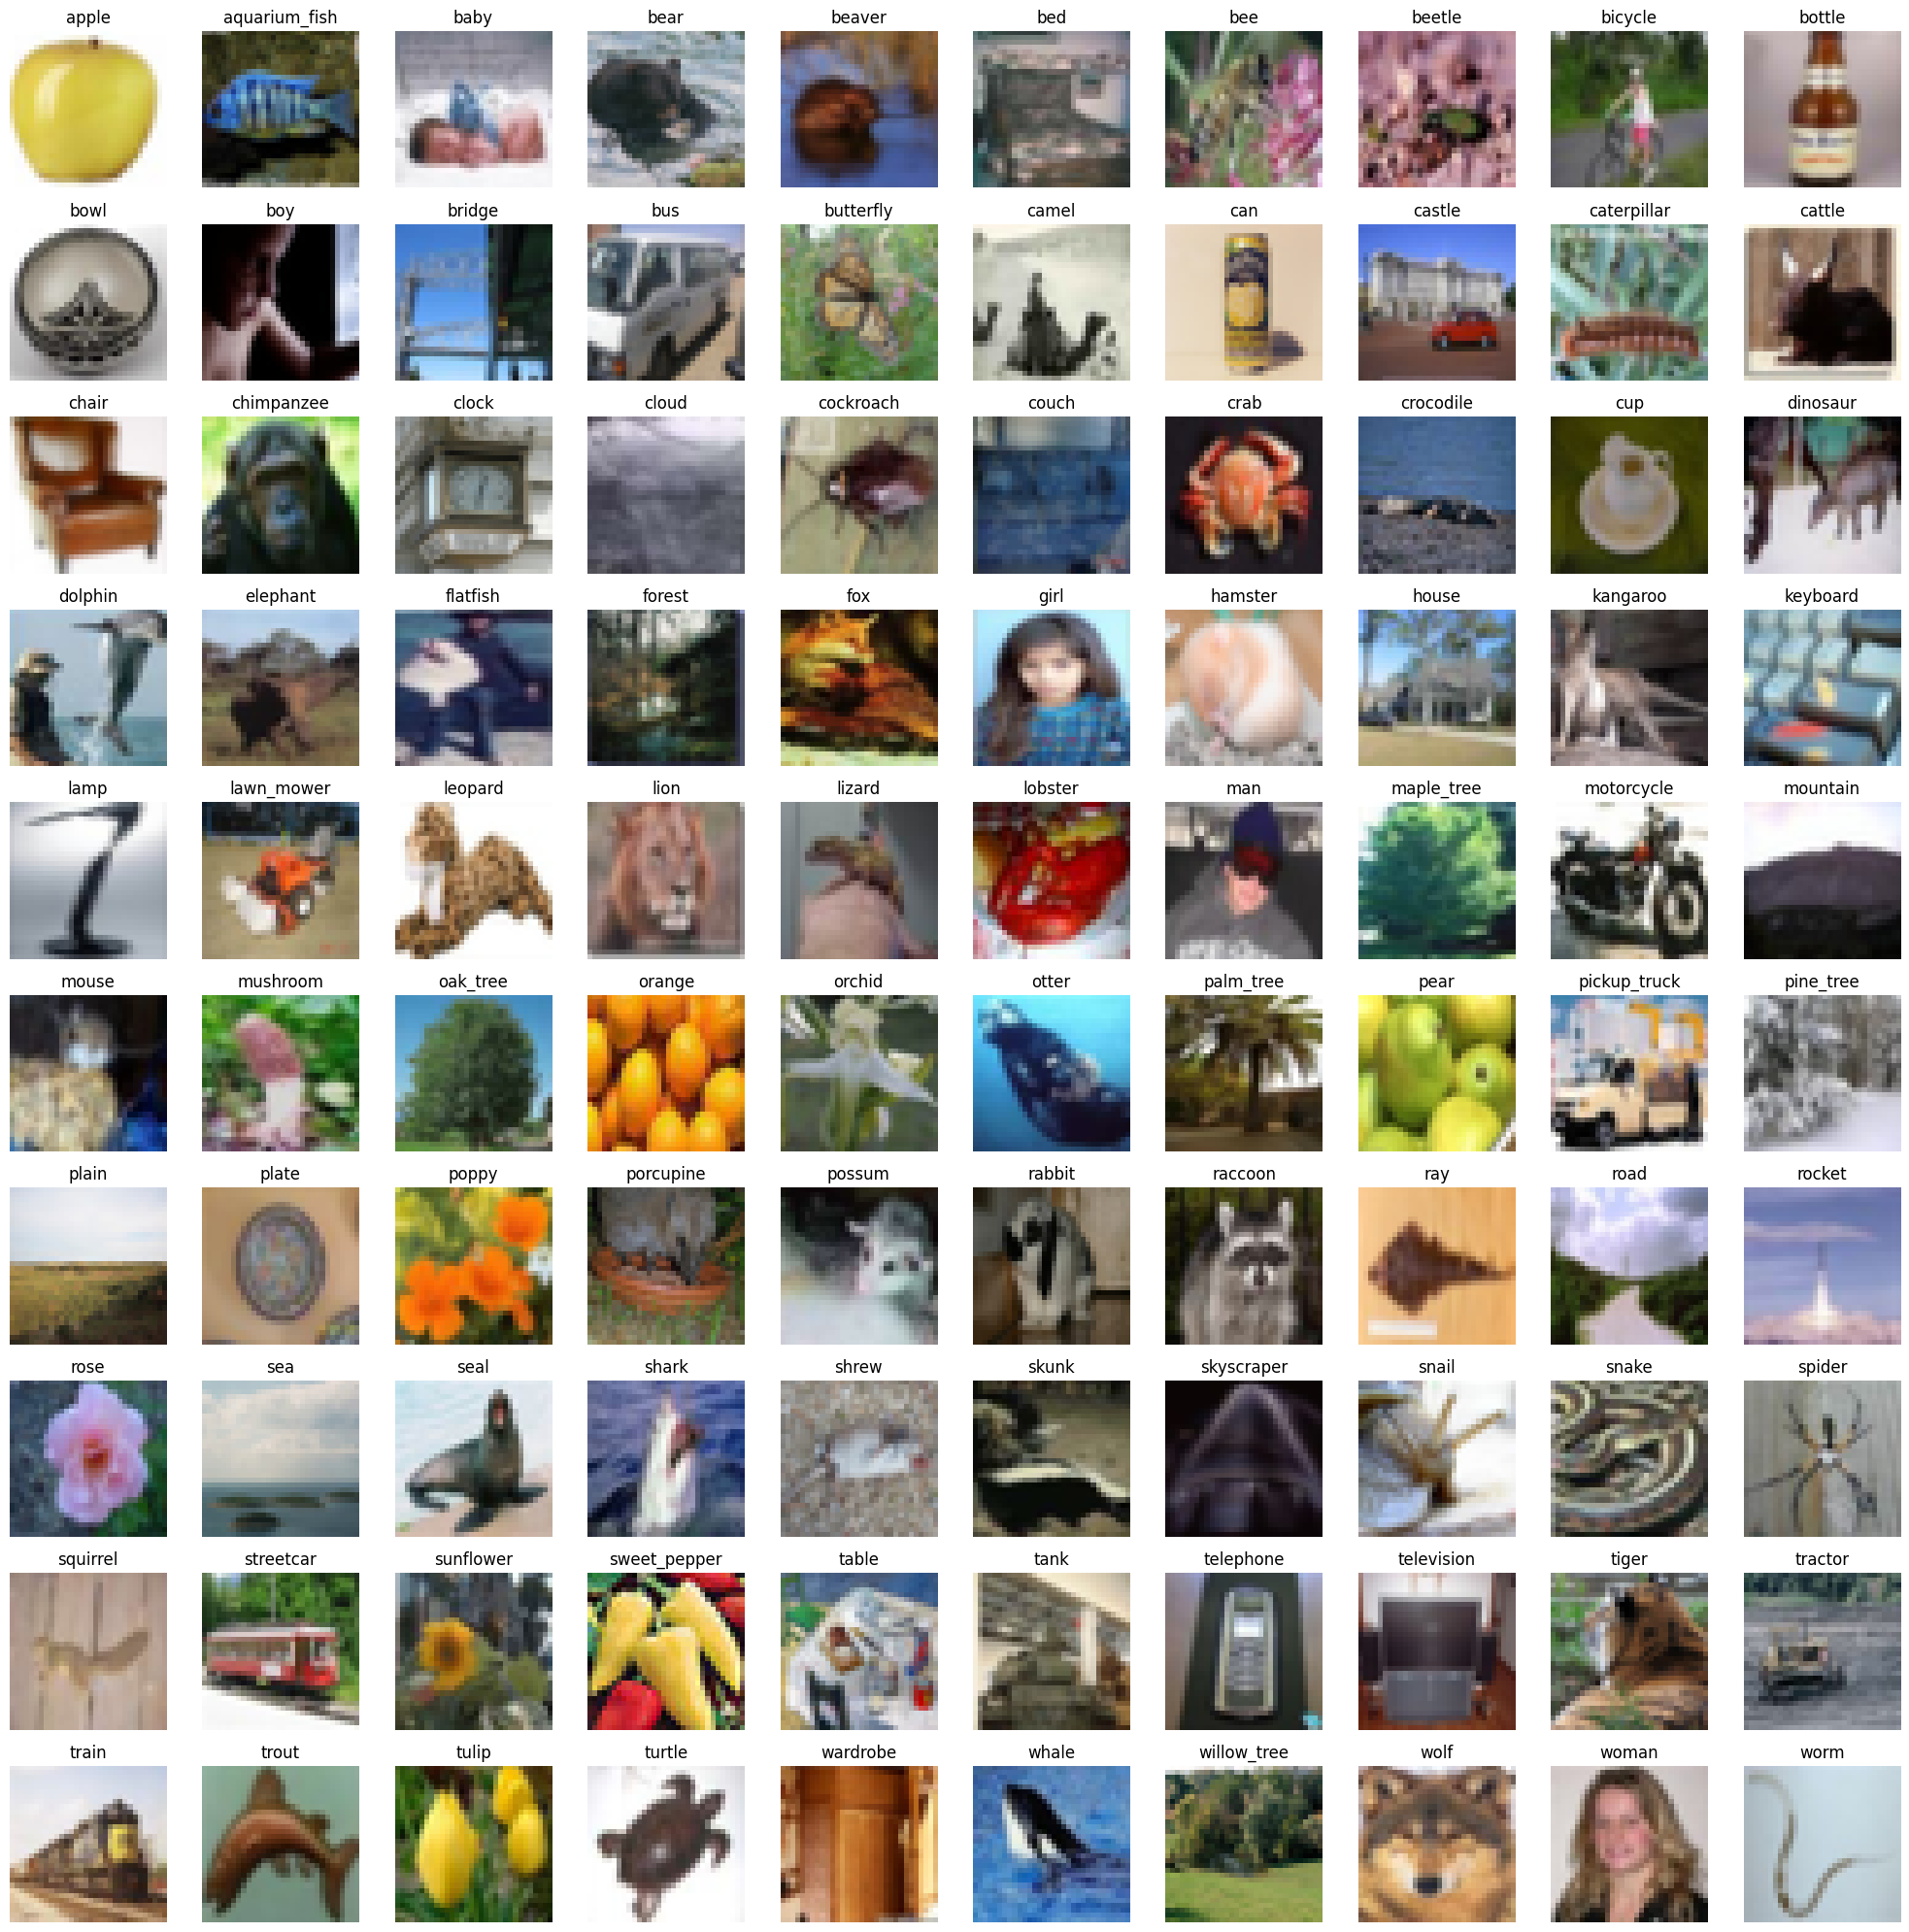

In [ ]:
fig, ax = plt.subplots(10, 10, figsize=(20, 20), tight_layout=True)

for label, subplot in enumerate(ax.ravel()):
    subplot.axis("off")
    subplot.imshow(x_train[np.random.choice(np.where(y_train == label)[0])])
    subplot.set_title(class_labels[label])

plt.show()


<u><b>Observations</b></u>

We can see that the images are not very consistent in the orientation. Data augmentation where images can be flipped/cropped could be possible to do better prediction. Based on the selection of images, There is no clear indication of missed identified items/wrongly augmented items from the dataset. 


### Class Distribution

When training a machine learning model, it is always important to check the distribution of the different classes in the dataset. This will inform us which metrics is the best to use and if anything is needed to balance the classes.


In [ ]:
labels, counts = np.unique(y_train, return_counts=True)
for label, count in zip(labels, counts):
    print(f"{class_labels[label]}: {count}")


apple: 397
aquarium_fish: 387
baby: 402
bear: 398
beaver: 389
bed: 391
bee: 404
beetle: 391
bicycle: 423
bottle: 398
bowl: 374
boy: 398
bridge: 398
bus: 393
butterfly: 415
camel: 393
can: 414
castle: 408
caterpillar: 413
cattle: 416
chair: 398
chimpanzee: 409
clock: 412
cloud: 396
cockroach: 395
couch: 386
crab: 396
crocodile: 398
cup: 382
dinosaur: 390
dolphin: 391
elephant: 413
flatfish: 417
forest: 412
fox: 409
girl: 401
hamster: 401
house: 390
kangaroo: 408
keyboard: 391
lamp: 409
lawn_mower: 396
leopard: 410
lion: 413
lizard: 396
lobster: 394
man: 394
maple_tree: 388
motorcycle: 399
mountain: 403
mouse: 388
mushroom: 395
oak_tree: 383
orange: 389
orchid: 415
otter: 396
palm_tree: 398
pear: 396
pickup_truck: 413
pine_tree: 414
plain: 416
plate: 414
poppy: 399
porcupine: 402
possum: 402
rabbit: 408
raccoon: 413
ray: 411
road: 406
rocket: 410
rose: 405
sea: 417
seal: 412
shark: 398
shrew: 395
skunk: 394
skyscraper: 395
snail: 395
snake: 408
spider: 394
squirrel: 387
streetcar: 408
su

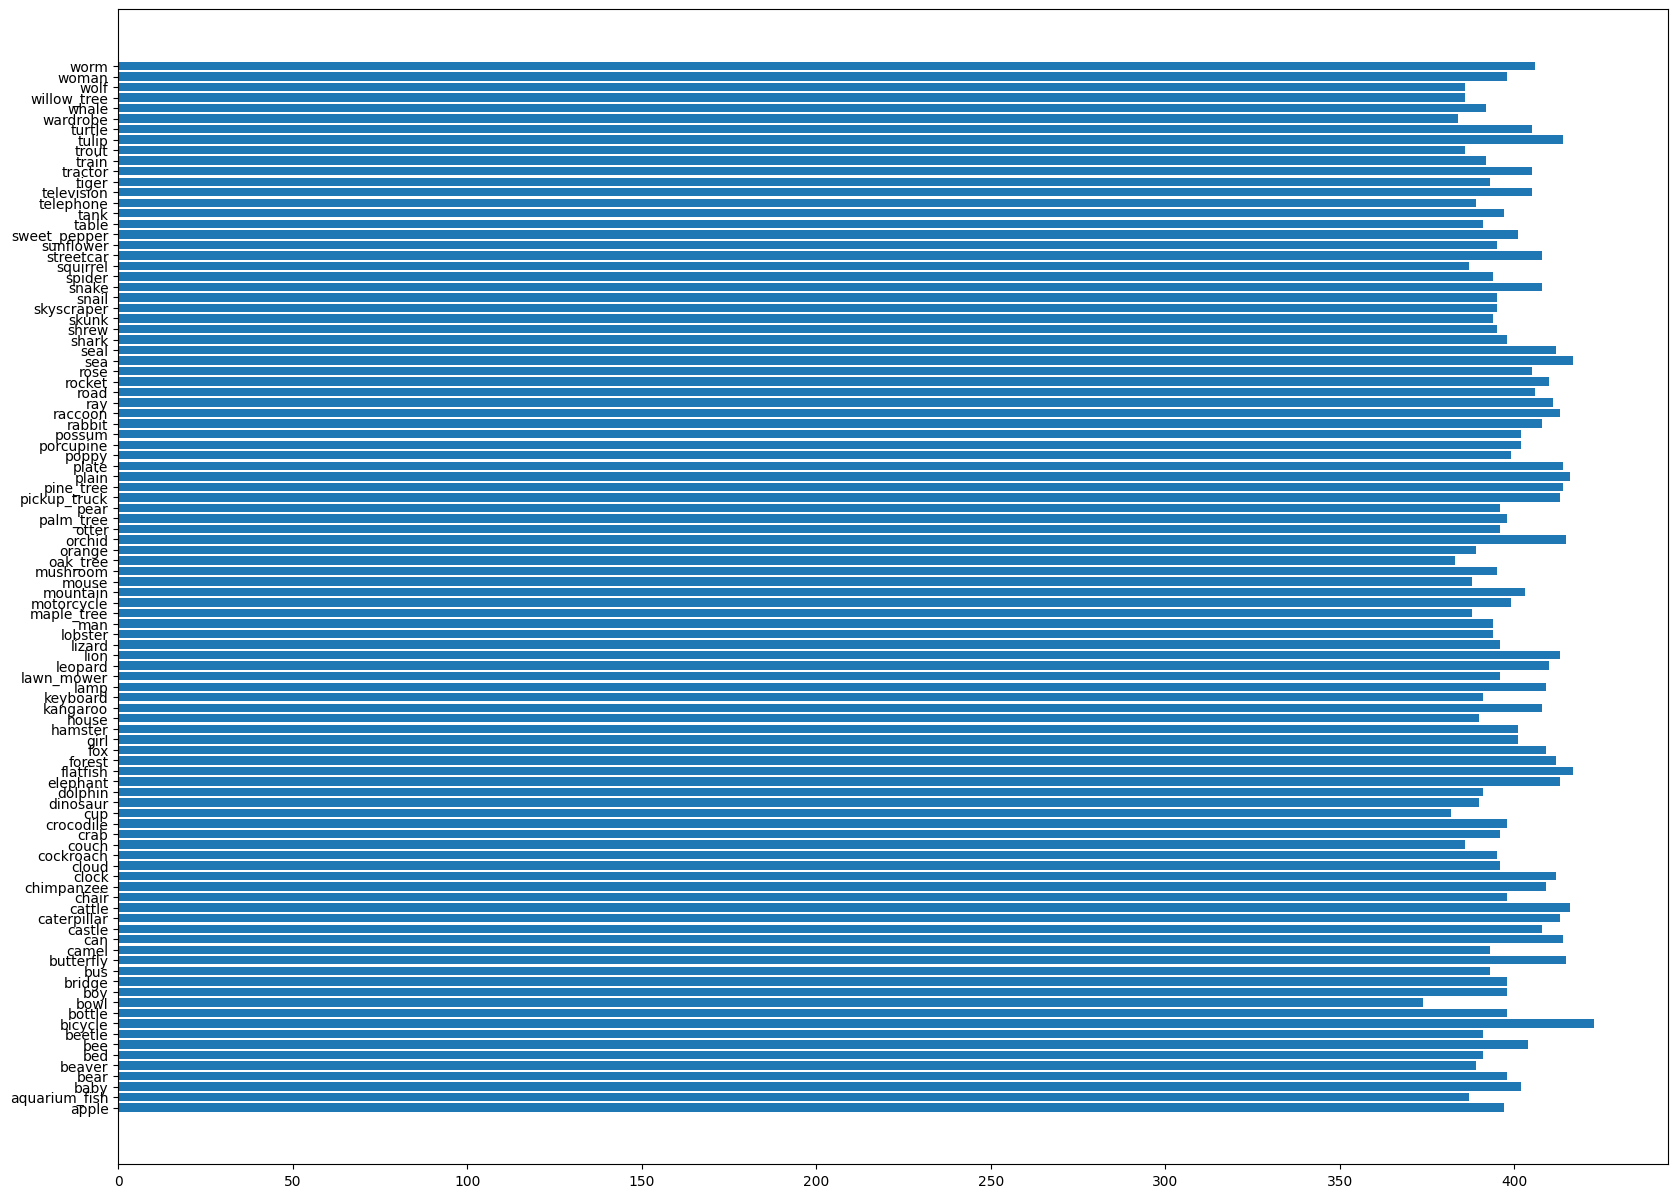

In [ ]:
plt.figure(figsize=(20, 15))
plt.barh(labels, counts, tick_label=list(class_labels.values()))
plt.show()


<u><b>Observations</b></u>

As we can see from the bar graph, the distribution of the images is even. This suggest that accuracy can be use as a primary metric.


### Image Pixel Distribution

We need to know the pixel intensity and know the distribution of the pixels


In [ ]:
print("Max: ", np.max(x_train))
print("Min: ", np.min(x_train))


Max:  255
Min:  0


As expected, our pixels have values between 0 and 255.


In [ ]:
mean, std = np.mean(x_train, axis=(0, 1, 2)), np.std(x_train, axis=(0, 1, 2))
print("Mean:", mean)
print("std:", std)


Mean: [129.26910793 124.11666553 112.55583118]
std: [68.11519598 65.3142698  70.31977601]


### Image Averaging

Image Averaging involves stacking multiple photos on top of each other and averaging them together. The main purpose is to see the noise of the image adn therefore reducing it.


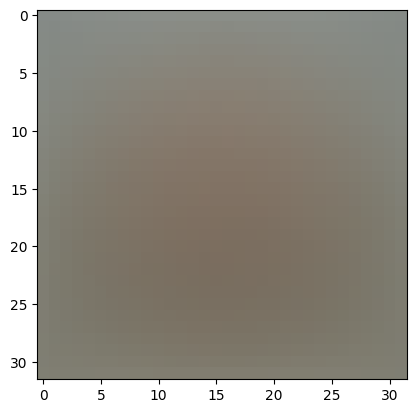

In [ ]:
plt.imshow(np.mean(x_train, axis=0) / 255, cmap='Greys')
plt.show()


<u><b>Observation</b></u>

We cannot see a single thing from the image. This is likely due to the color of the images overlaying each other giving this blur effect.

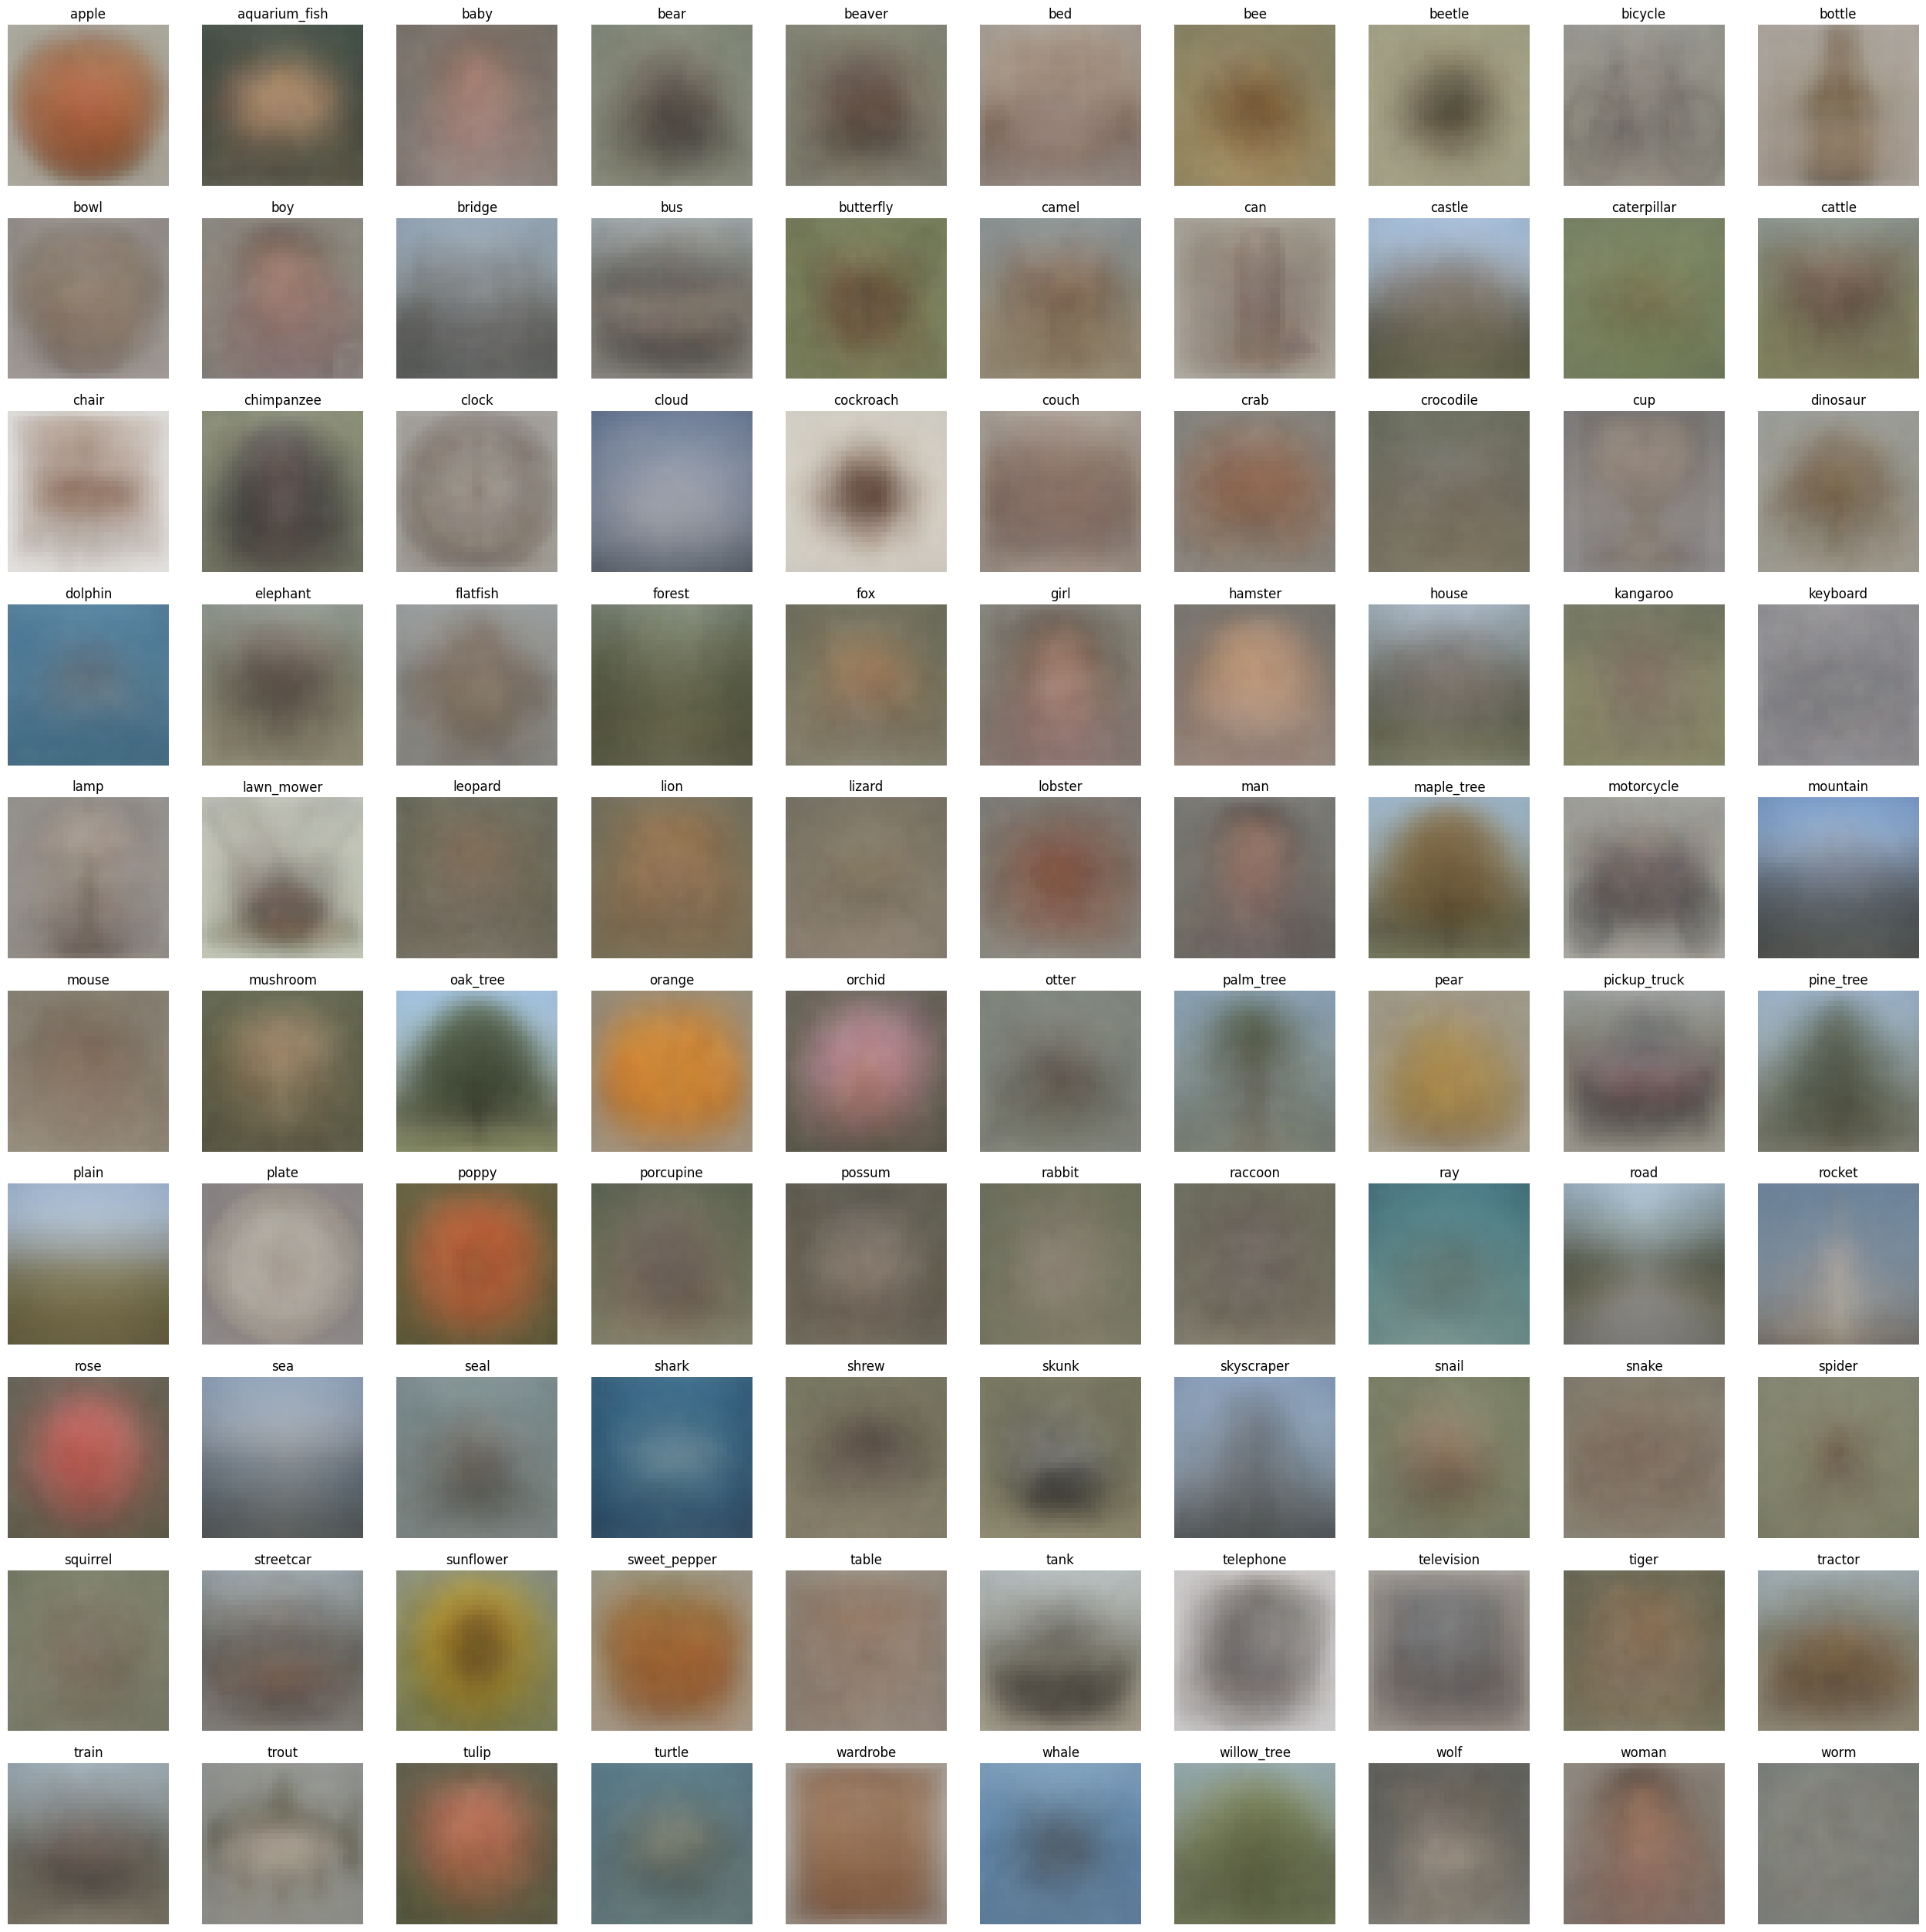

In [ ]:
fig, ax = plt.subplots(10, 10, figsize=(32, 32))

for idx, subplot in enumerate(ax.ravel()):
    avg_image = np.mean(x_train[np.squeeze(y_train == idx)], axis=0) / 255
    subplot.imshow(avg_image, cmap='Greys')
    subplot.set_title(f"{class_labels[idx]}")
    subplot.axis("off")


<u><b>Observations</b></u>

Although the average images is blurry, we can make out the images of a trout, sunflower, apple, can, orange, bottle etc. It is more difficult to make out the average image for the other classes, which might suggest that it is harder to predict these classes. We also note some of the average images like the orange and sweet pepper have a similar shade and average image which might be a problem for the model.

# Data Preprocessing

Before modelling, its is important to perform data preprocessing


### One Hot Encoding

As they are, the current labels are encoded from 0-99, we will one hot encode the labels.


In [ ]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [ ]:
print(y_train[0])
print("Label:", tf.argmax(y_train[0]))


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
Label: tf.Tensor(19, shape=(), dtype=int64)


### Normalizing the inputs

Image normalisation is done to the dataset.

Normalising the inputs means that we will calculate the mean and standard deviation of the training set, and then apply the formula below.

$$X_{} = \frac{X_{} - μ_{}}{σ_{}}$$

Pixel values of each pixel are on similar scale, therefore normalisation can be used. This helps to optimize the algorithm to better converge during gradient descent.


In [ ]:
pre_processing_v1 = Normalization()
pre_processing_v1.adapt(x_train)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


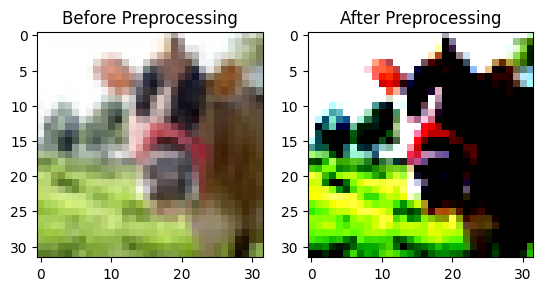

In [ ]:
fig, ax = plt.subplots(ncols=2)

ax[0].imshow(x_train[0])
ax[0].set_title('Before Preprocessing')
ax[1].imshow(tf.squeeze(pre_processing_v1(x_train[:1, :, :])))
ax[1].set_title('After Preprocessing')
plt.show()


### Data Augmentation

To prevent overfitting of the model, we will apply data augmentation. Data augmentation is a method to reduce the variance of a model by imposing random transformations on the data for training.

Types of Image Data Augmentations

- Flipping
- Cropping
- Rotating
- Scaling
- Shearing
- Many more ...

For this case, we will be using only flipping, resizing and cropping. This is because as we seen during our exploratory data analysis. The images are all in the same orientation which means we can flip left and right to help make data augmentation better. To have more data points, we will resize and add more padding to the images, this will allow us to crop without cropping the object out of the image. Cropping the images also allows the model to generalise the data and identify features more easily.

Note: we will only be augmenting the training data as we do not want to edit the validation and test data as they will be used to evaluate the model's accuracy.


##### Batch Size
To help make the model to have a regularizing effect, we will choose the smaller batch sizes. We will choose a batch size of 64 as it allows the model to converge more easily.


In [ ]:
BATCH_SIZE = 64


##### Basic Augmentation

In [ ]:
def data_augmentation(x_train):
    imageArr = []
    for images in x_train:
        tf.convert_to_tensor(images)
        randomVal = np.random.randint(0,2)
        if randomVal == 1:
            image = tf.image.random_flip_left_right(images)
            image = tf.image.resize_with_crop_or_pad(
                image, IMG_SIZE[0] + 4, IMG_SIZE[1] + 4)
            image = tf.image.random_crop(
                image, size=IMG_SIZE
            )
            images = image
        imageArr.append(images)
    return np.array(imageArr)


In [ ]:
x_train_aug = np.copy(x_train)


In [ ]:
x_train_aug = data_augmentation(x_train_aug)


Let's see what happened to the data after we have augmented it.


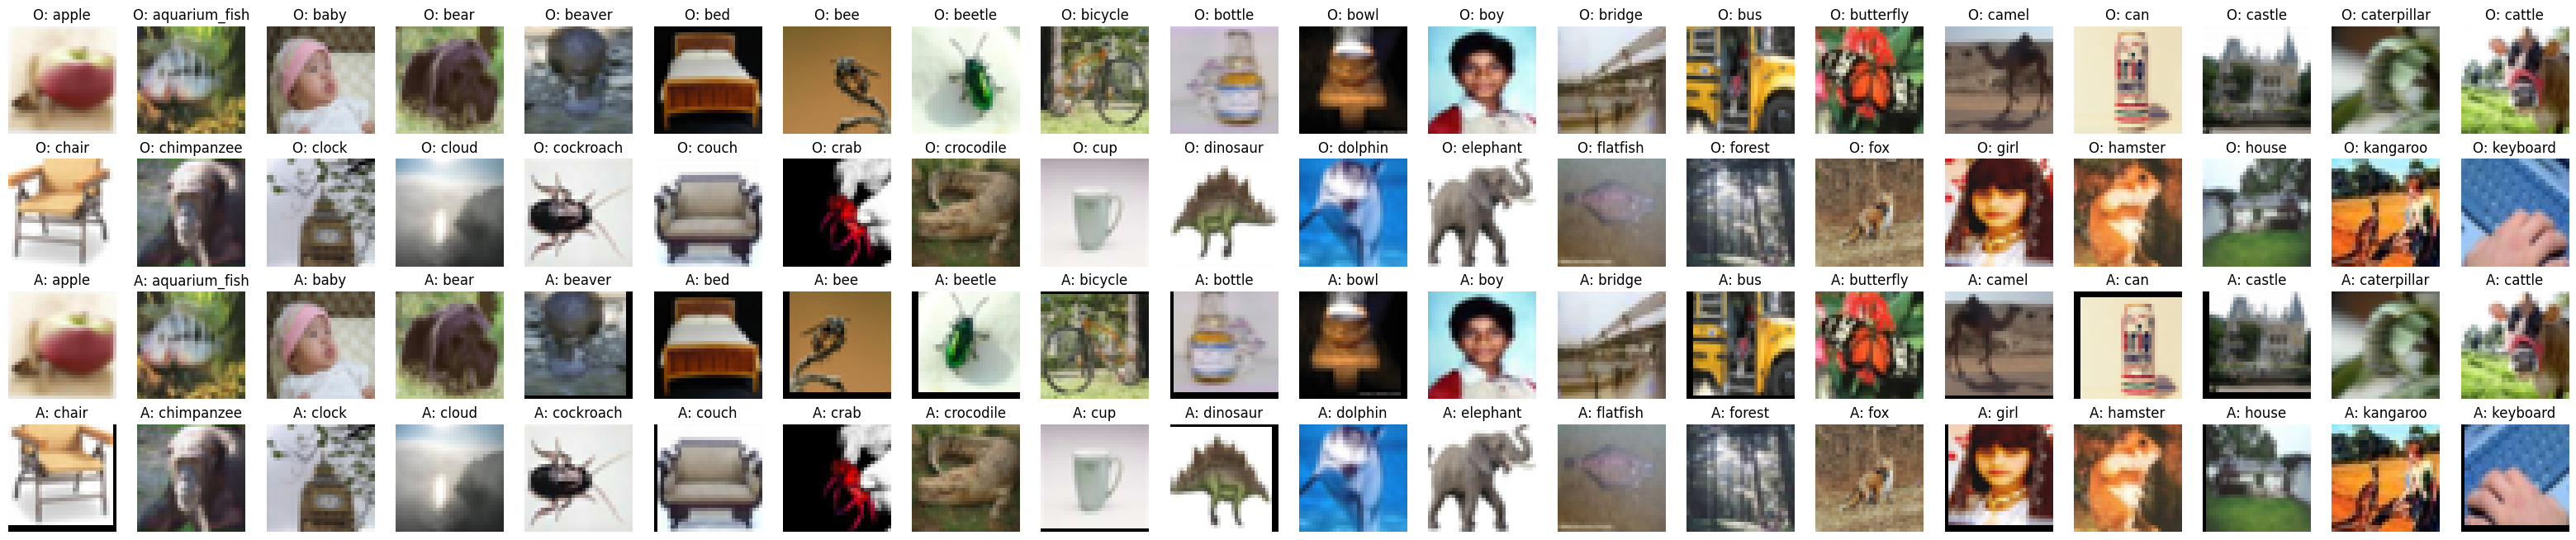

In [ ]:
fig, ax = plt.subplots(4, 20, figsize=(40, 8))
for idx in range(80):
    subplot = ax.ravel()[idx]
    y_label = np.argmax(y_train, axis=1)
    if idx >= 40:
        subplot.set_title(f"A: {class_labels[idx % 40]}")
        subplot.imshow(x_train_aug[y_label == idx % 40][0])
    else:
        subplot.set_title(f"O: {class_labels[idx % 40]}")
        subplot.imshow(x_train[y_label == idx % 40][0])
    subplot.axis("off")
plt.show()


<u><b>Observations</b></u>

As we can see, some of the images have been shifted, rotated and cropped. This shows that the image augmentation works


##### CutMix Augmentation
This image augmentation method cuts patches and paste it among training images. This improves the model robustness against input corruptions and its out-of-distribution detection performances.

In [ ]:
AUTO = tf.data.AUTOTUNE


In [ ]:
x_train_cutmix = x_train.copy()

In [ ]:
def preprocess_image(image, label):
    image = tf.image.resize(image, (32, 32))
    image = tf.image.convert_image_dtype(image, tf.float32) / 255.0
    return image, label

In [ ]:
train_ds_one = (
    tf.data.Dataset.from_tensor_slices((x_train_cutmix, y_train))
    .shuffle(1024)
    .map(preprocess_image, num_parallel_calls=AUTO)
)
train_ds_two = (
    tf.data.Dataset.from_tensor_slices((x_train_cutmix, y_train))
    .shuffle(1024)
    .map(preprocess_image, num_parallel_calls=AUTO)
)

# Combine two shuffled datasets from the same training data.
train_ds = tf.data.Dataset.zip((train_ds_one, train_ds_two))

val_ds = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_ds = (
    val_ds.map(preprocess_image, num_parallel_calls=AUTO)
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)

ValueError: Dimensions 32 and 40000 are not compatible

In [ ]:
def sample_beta_distribution(size, concentration_0=0.2, concentration_1=0.2):
    gamma_1_sample = tf.random.gamma(shape=[size], alpha=concentration_1)
    gamma_2_sample = tf.random.gamma(shape=[size], alpha=concentration_0)
    return gamma_1_sample / (gamma_1_sample + gamma_2_sample)


@tf.function
def get_box(lambda_value):
    cut_rat = tf.math.sqrt(1.0 - lambda_value)

    cut_w = 32 * cut_rat  # rw
    cut_w = tf.cast(cut_w, tf.int32)

    cut_h = 32 * cut_rat  # rh
    cut_h = tf.cast(cut_h, tf.int32)

    cut_x = tf.random.uniform((1,), minval=0, maxval=32, dtype=tf.int32)  # rx
    cut_y = tf.random.uniform((1,), minval=0, maxval=32, dtype=tf.int32)  # ry

    boundaryx1 = tf.clip_by_value(cut_x[0] - cut_w // 2, 0, 32)
    boundaryy1 = tf.clip_by_value(cut_y[0] - cut_h // 2, 0, 32)
    bbx2 = tf.clip_by_value(cut_x[0] + cut_w // 2, 0, 32)
    bby2 = tf.clip_by_value(cut_y[0] + cut_h // 2, 0, 32)

    target_h = bby2 - boundaryy1
    if target_h == 0:
        target_h += 1

    target_w = bbx2 - boundaryx1
    if target_w == 0:
        target_w += 1

    return boundaryx1, boundaryy1, target_h, target_w


@tf.function
def cutmix(train_ds_one, train_ds_two):
    (image1, label1), (image2, label2) = train_ds_one, train_ds_two

    alpha = [0.25]
    beta = [0.25]

    # Get a sample from the Beta distribution
    lambda_value = sample_beta_distribution(1, alpha, beta)

    # Define Lambda
    lambda_value = lambda_value[0][0]

    # Get the bounding box offsets, heights and widths
    boundaryx1, boundaryy1, target_h, target_w = get_box(lambda_value)

    # Get a patch from the second image (`image2`)
    crop2 = tf.image.crop_to_bounding_box(
        image2, boundaryy1, boundaryx1, target_h, target_w
    )
    # Pad the `image2` patch (`crop2`) with the same offset
    image2 = tf.image.pad_to_bounding_box(
        crop2, boundaryy1, boundaryx1, 32, 32
    )
    # Get a patch from the first image (`image1`)
    crop1 = tf.image.crop_to_bounding_box(
        image1, boundaryy1, boundaryx1, target_h, target_w
    )
    # Pad the `image1` patch (`crop1`) with the same offset
    img1 = tf.image.pad_to_bounding_box(
        crop1, boundaryy1, boundaryx1, 32, 32
    )

    # Modify the first image by subtracting the patch from `image1`
    # (before applying the `image2` patch)
    image1 = image1 - img1
    # Add the modified `image1` and `image2`  together to get the CutMix image
    image = image1 + image2

    # Adjust Lambda in accordance to the pixel ration
    lambda_value = 1 - (target_w * target_h) / (32 * 32)
    lambda_value = tf.cast(lambda_value, tf.float32)

    # Combine the labels of both images
    label = lambda_value * label1 + (1 - lambda_value) * label2
    return image, label

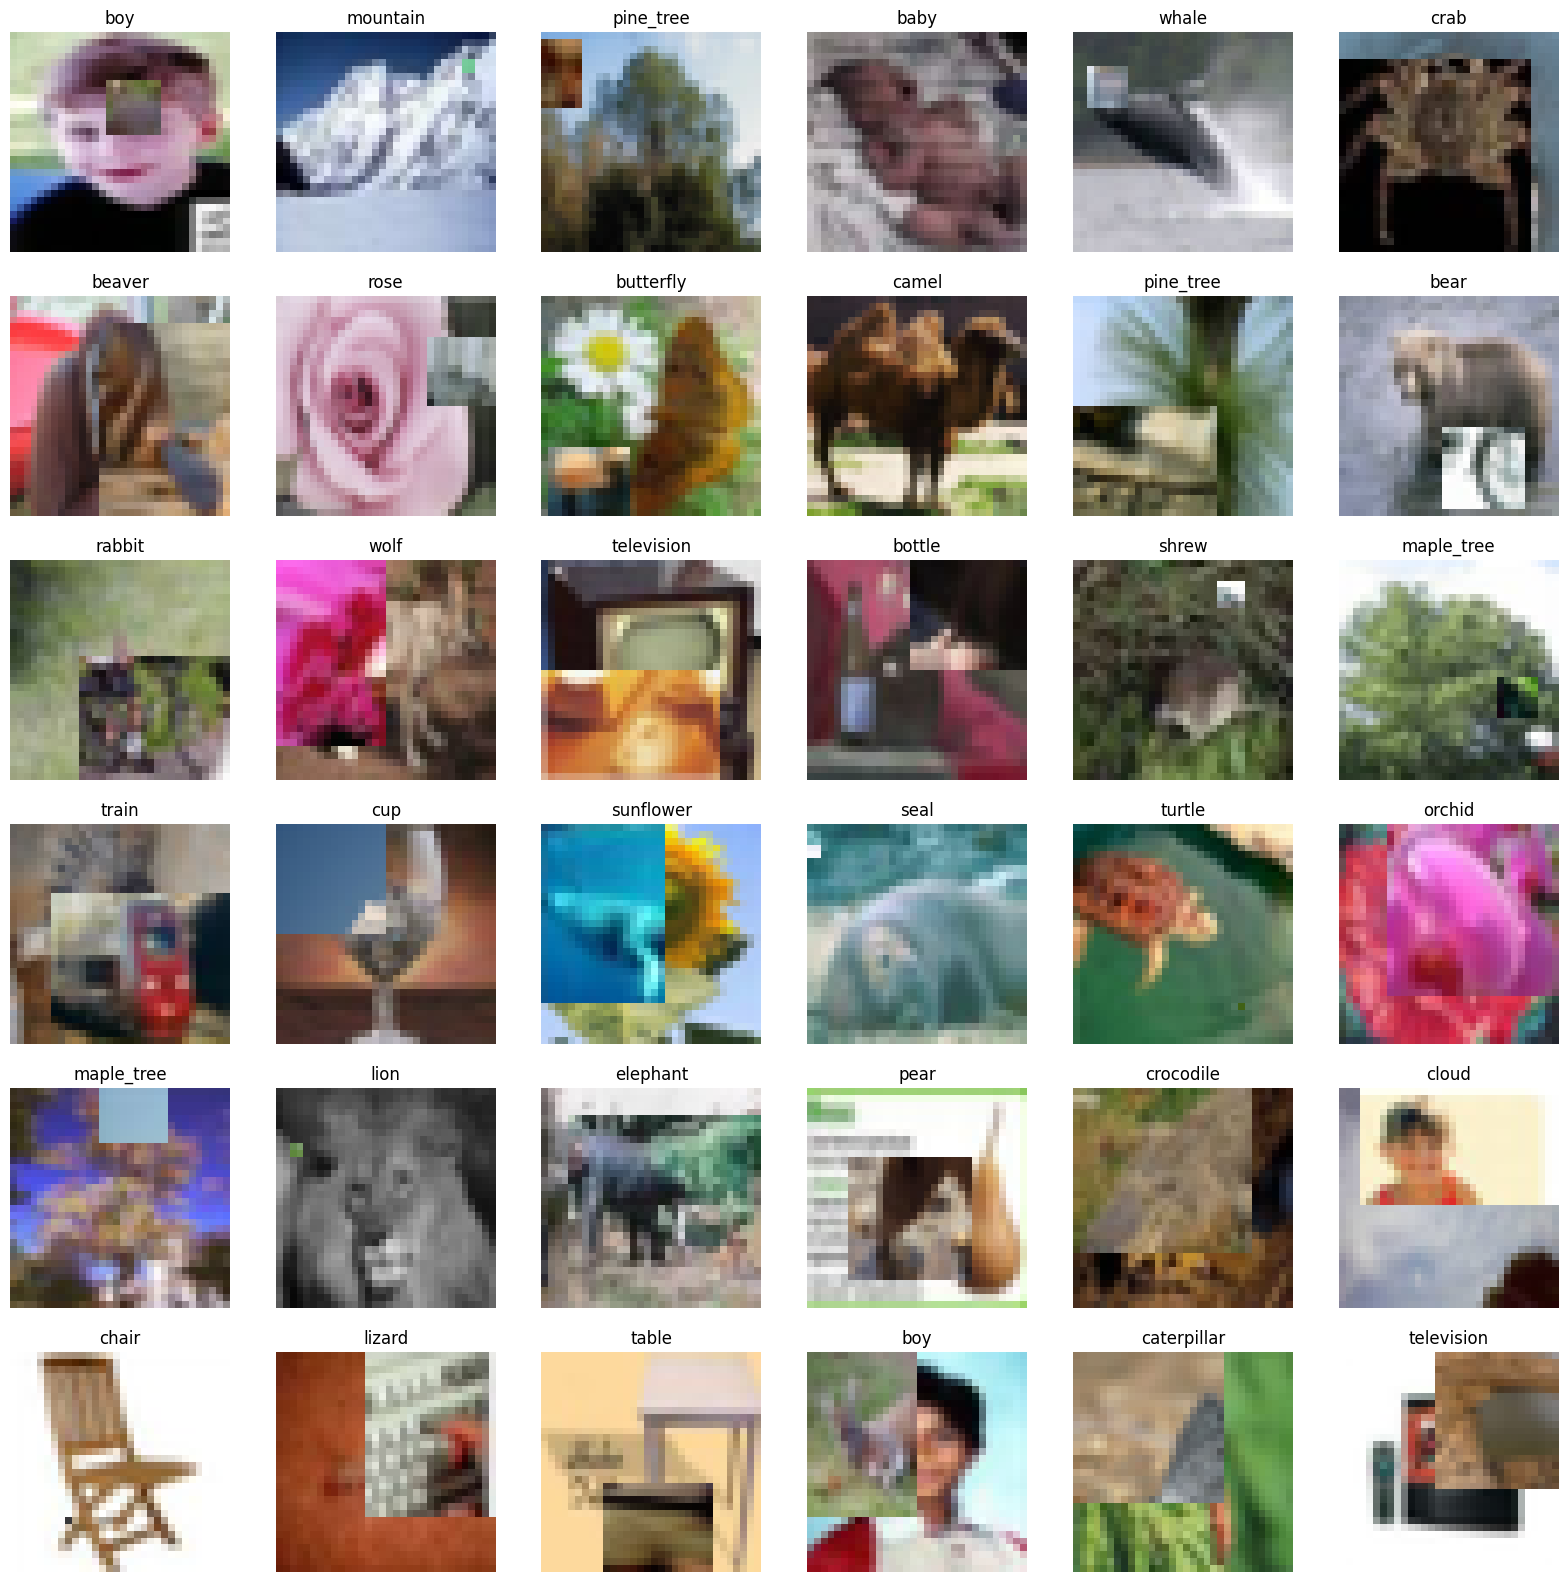

In [ ]:
# Create the new dataset using our `cutmix` utility
train_ds_cutmix = (
    train_ds.shuffle(1024)
    .map(cutmix, num_parallel_calls=AUTO)
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)

# Let's preview 36 samples from the dataset
x_train_cutmix, y_train_cutmix = next(iter(train_ds_cutmix))
plt.figure(figsize=(20, 20))
for i in range(36):
    ax = plt.subplot(6, 6, i + 1)
    plt.title(class_labels[np.argmax(y_train_cutmix[i])])
    plt.imshow(x_train_cutmix[i])
    plt.axis("off")


<u><b>Observations</b></u>

As we can see, the images have been cut and pasted and mixed together. This shows that the image augmentation works


# Building Models

We will be building a few deep learning models to solve the image classification problem.

**Model List:**

1. Fully Connected Neural Network Model (Baseline)
2. Conv2D Neural Network Model
3. CustomVGG Model
4. CustomVGG16 Model
5. CustomResNet-10 Model
6. EfficientNetV2 Model

<img src="https://deci.ai/wp-content/uploads/2022/03/dnns-1-1024x569.jpg.webp"/>


### Overfitting

To prevent overfitting, we will be using Early Stopping. This will stop model training once it begins to overfit.


### Optimizers

There are a lot of different types of optimizers offered by Tensorflow. The most common 2 are Adam and SGD optimizers.

**Adam**<br>
Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.

**SGD**<br>
SGD also known as Stochastic gradient descent is an iterative method for optimizing an objective function with suitable smoothness.

**Difference between Adam and SGD**<br>
Adam is faster compared to SGD, this is due to Adam using coordinate wise gradient clipping which tackle heavy-tailed noise. It also updates the learning rate for each network weight individually. However, SGD is known to perform better than SGD for image classification tasks. As Adam takes "shortcuts" as mentioned previously which is better for NLP and other purposes but for Image Classification, every detail is important to distinguish what the image is. Therefore for all the subsequent models, we will be using the SGD as our optimizer.


### Utility Function

Before we begin building our models, we will first be building some functions that will help us to compare our models more easily.


In [ ]:
def plot_loss_curve(modelInfo):
    history = modelInfo.history
    history = pd.DataFrame(history)
    epochs = list(range(1, len(history) + 1))
    if np.max(history["val_loss"]) > 1 or np.max(history["loss"]) > 1:
        fig, ax = plt.subplots(1, 2, figsize=(20, 10))
        ax[0].set_title("Plot Loss Curve")
        ax[1].set_title("Plot Accuracy Curve")
        ax[0].scatter(epochs, history["loss"])
        ax[0].plot(epochs, history["loss"], label="Training Loss")
        ax[0].scatter(epochs, history["val_loss"])
        ax[0].plot(epochs, history["val_loss"], label="Validation Loss")
        ax[1].scatter(epochs, history["accuracy"])
        ax[1].plot(epochs, history["accuracy"], label="Training Accuracy")
        ax[1].scatter(epochs, history["val_accuracy"])
        ax[1].plot(epochs, history["val_accuracy"], label="Validation Accuracy")
        ax[0].set_ylabel("Accuracy")
        ax[0].set_xlabel("Epochs")
        ax[1].set_ylabel("Accuracy")
        ax[1].set_xlabel("Epochs")
        plt.legend()
    else: 
        fig, ax = plt.subplots(1, 1, figsize=(20, 10))
        plt.title("Plot Loss Curve")
        plt.scatter(epochs, history["loss"])
        plt.plot(epochs, history["loss"], label="Training Loss")
        plt.scatter(epochs, history["val_loss"])
        plt.plot(epochs, history["val_loss"], label="Validation Loss")
        plt.scatter(epochs, history["accuracy"])
        plt.plot(epochs, history["accuracy"], label="Training Accuracy")
        plt.scatter(epochs, history["val_accuracy"])
        plt.plot(epochs, history["val_accuracy"], label="Validation Accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("Epochs")
        plt.legend()
    return fig


In [ ]:
allResults = pd.DataFrame()


In [27]:
def storeResult(modelInfo):
    history = modelInfo.history
    global allResults
    best_val_idx = np.argmax(history["val_accuracy"])
    result = {}
    result["Model Name"] = modelInfo.model._name
    result["Epochs"] = len(history["loss"])
    result["Batch Size"] = BATCH_SIZE
    result["Train Loss"] = history["loss"][best_val_idx]
    result["Val Loss"] = history["val_loss"][best_val_idx]
    result["Train Acc"] = history["accuracy"][best_val_idx]
    result["Val Acc"] = history["val_accuracy"][best_val_idx]
    result["[Train - Val] Acc"] = result["Train Acc"] - result["Val Acc"]
    allResults = allResults.append(result, ignore_index=True)
    return result

### Baseline Fully Connected Neural Network

As our baseline model, we will be using it to compare against our other models that we are trying to build. This model will be very simple Model using the Sequential class and 3 Hidden Layers. For each hidden layer, we will be using the ReLU activation function and for the final output layer we will be using softmax as there is multiple classes therefore sigmoid will not be usable. As there are multiple category that we are predicting, we will be using the categorical_crossentropy as our loss function. The optimizer will be SGD as mentioned previously and we will be using the metrics of accuracy as the classes are quite balanced.


##### Training baseline model without Data Augmentation

To train the baseline model, we will first use our unaugmented data to fit and train the model. Subsequently, we will use our augmented data to fit and train and compare the difference.


In [154]:
tf.keras.backend.clear_session()
inputs = Input(IMG_SIZE)  # Input
x = pre_processing_v1(inputs)
x = Flatten()(x)
x = Dense(128, 'relu')(x)  # Hidden Layer 1
x = Dense(128, 'relu')(x)  # Hidden Layer 3
x = Dense(128, 'relu')(x)  # Hidden Layer 3
x = Dense(NUM_CLASS, 'softmax')(x)
baseModel = Model(inputs=inputs, outputs=x, name="baseline")
baseModel.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                  loss='categorical_crossentropy', metrics=['accuracy'])


In [155]:
baseModelHistory = baseModel.fit(x_train, y_train, epochs=100,
                                 validation_data=(x_val, y_val), batch_size=BATCH_SIZE, callbacks=EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True))


Epoch 1/100
625/625 [==============================] - 4s 6ms/step - loss: 3.9509 - accuracy: 0.1048 - val_loss: 3.6575 - val_accuracy: 0.1447
Epoch 2/100
625/625 [==============================] - 3s 6ms/step - loss: 3.5302 - accuracy: 0.1677 - val_loss: 3.5138 - val_accuracy: 0.1721
Epoch 3/100
625/625 [==============================] - 4s 6ms/step - loss: 3.3519 - accuracy: 0.1959 - val_loss: 3.4208 - val_accuracy: 0.1801
Epoch 4/100
625/625 [==============================] - 3s 6ms/step - loss: 3.2317 - accuracy: 0.2190 - val_loss: 3.4465 - val_accuracy: 0.1937
Epoch 5/100
625/625 [==============================] - 3s 6ms/step - loss: 3.1240 - accuracy: 0.2399 - val_loss: 3.4284 - val_accuracy: 0.1922
Epoch 6/100
625/625 [==============================] - 3s 6ms/step - loss: 3.0400 - accuracy: 0.2544 - val_loss: 3.3822 - val_accuracy: 0.1996
Epoch 7/100
625/625 [==============================] - 4s 6ms/step - loss: 2.9556 - accuracy: 0.2689 - val_loss: 3.4089 - val_accuracy: 0.1997

{'Model Name': 'baseline', 'Epochs': 20, 'Batch Size': 64, 'Train Loss': 2.769735097885132, 'Val Loss': 3.4920077323913574, 'Train Acc': 0.30399999022483826, 'Val Acc': 0.2101999968290329, '[Train - Val] Acc': 0.09379999339580536}


C:\Users\Soh Hong Yu\AppData\Local\Temp\ipykernel_30216\3161967465.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allResults = allResults.append(result, ignore_index=True)


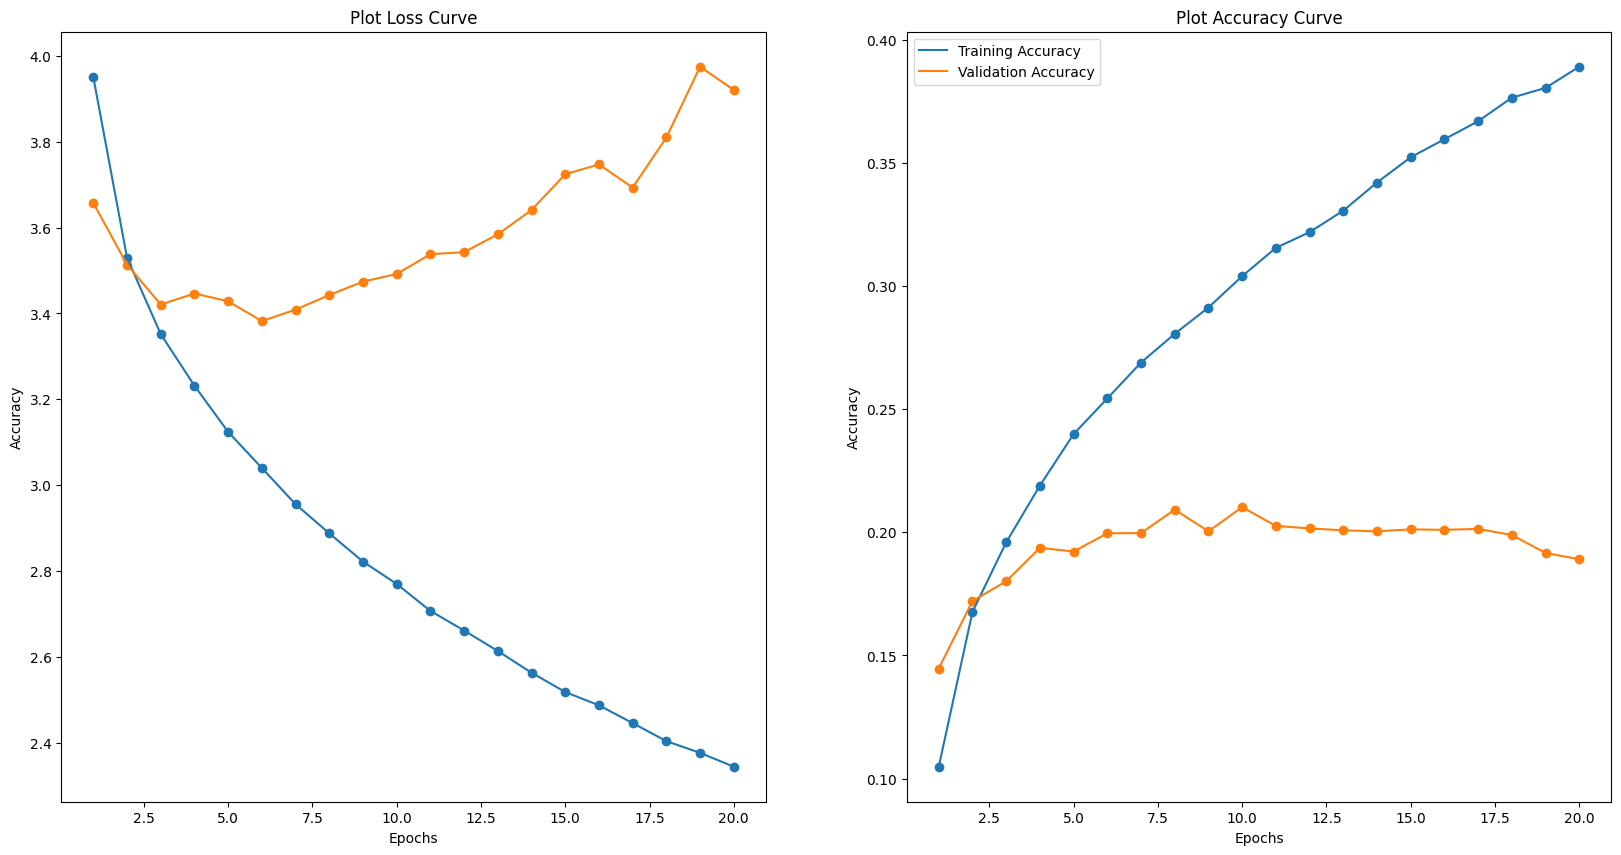

In [156]:
print(storeResult(baseModelHistory))
plot_loss_curve(baseModelHistory)
plt.show()


<u><b>Observations</b></u>

From the loss curve, We can see that as the model increase in epochs, the model becomes more generalise and the loss functions starts decreasing too. However, the accuracy of both training and validation is very low at 30.3% and 21.1%. This means that the model is not very strong at predicting and it is similar to randomly choosing a label. Let's see if augmentations will improve the accuracy.

##### Training baseline model with Data Augmentation

As mentioned previously, we will train the baseline model with the dataset that was augmented.


In [157]:
tf.keras.backend.clear_session()
inputs = Input(IMG_SIZE)  # Input
x = pre_processing_v1(inputs)
x = Flatten()(x)
x = Dense(128, 'relu')(x)  # Hidden Layer 1
x = Dense(128, 'relu')(x)  # Hidden Layer 3
x = Dense(128, 'relu')(x)  # Hidden Layer 3
x = Dense(NUM_CLASS, 'softmax')(x)
baseAugModel = Model(inputs=inputs, outputs=x, name="baselineAug")
baseAugModel.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                  loss='categorical_crossentropy', metrics=['accuracy'])


In [158]:
baseAugModelHistory = baseAugModel.fit(x_train_aug, y_train, epochs=100,
                                 validation_data=(x_val, y_val), batch_size=BATCH_SIZE, callbacks=EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True))


Epoch 1/100
625/625 [==============================] - 4s 5ms/step - loss: 4.0036 - accuracy: 0.0958 - val_loss: 3.7374 - val_accuracy: 0.1347
Epoch 2/100
625/625 [==============================] - 3s 6ms/step - loss: 3.6176 - accuracy: 0.1508 - val_loss: 3.5842 - val_accuracy: 0.1589
Epoch 3/100
625/625 [==============================] - 3s 5ms/step - loss: 3.4439 - accuracy: 0.1794 - val_loss: 3.4872 - val_accuracy: 0.1776
Epoch 4/100
625/625 [==============================] - 3s 5ms/step - loss: 3.3238 - accuracy: 0.1996 - val_loss: 3.4499 - val_accuracy: 0.1830
Epoch 5/100
625/625 [==============================] - 3s 6ms/step - loss: 3.2220 - accuracy: 0.2178 - val_loss: 3.4401 - val_accuracy: 0.1869
Epoch 6/100
625/625 [==============================] - 3s 5ms/step - loss: 3.1359 - accuracy: 0.2298 - val_loss: 3.4560 - val_accuracy: 0.1885
Epoch 7/100
625/625 [==============================] - 3s 6ms/step - loss: 3.0548 - accuracy: 0.2451 - val_loss: 3.4280 - val_accuracy: 0.1963

{'Model Name': 'baselineAug', 'Epochs': 22, 'Batch Size': 64, 'Train Loss': 2.7556023597717285, 'Val Loss': 3.581662178039551, 'Train Acc': 0.3008750081062317, 'Val Acc': 0.19939999282360077, '[Train - Val] Acc': 0.10147501528263092}


C:\Users\Soh Hong Yu\AppData\Local\Temp\ipykernel_30216\3161967465.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allResults = allResults.append(result, ignore_index=True)


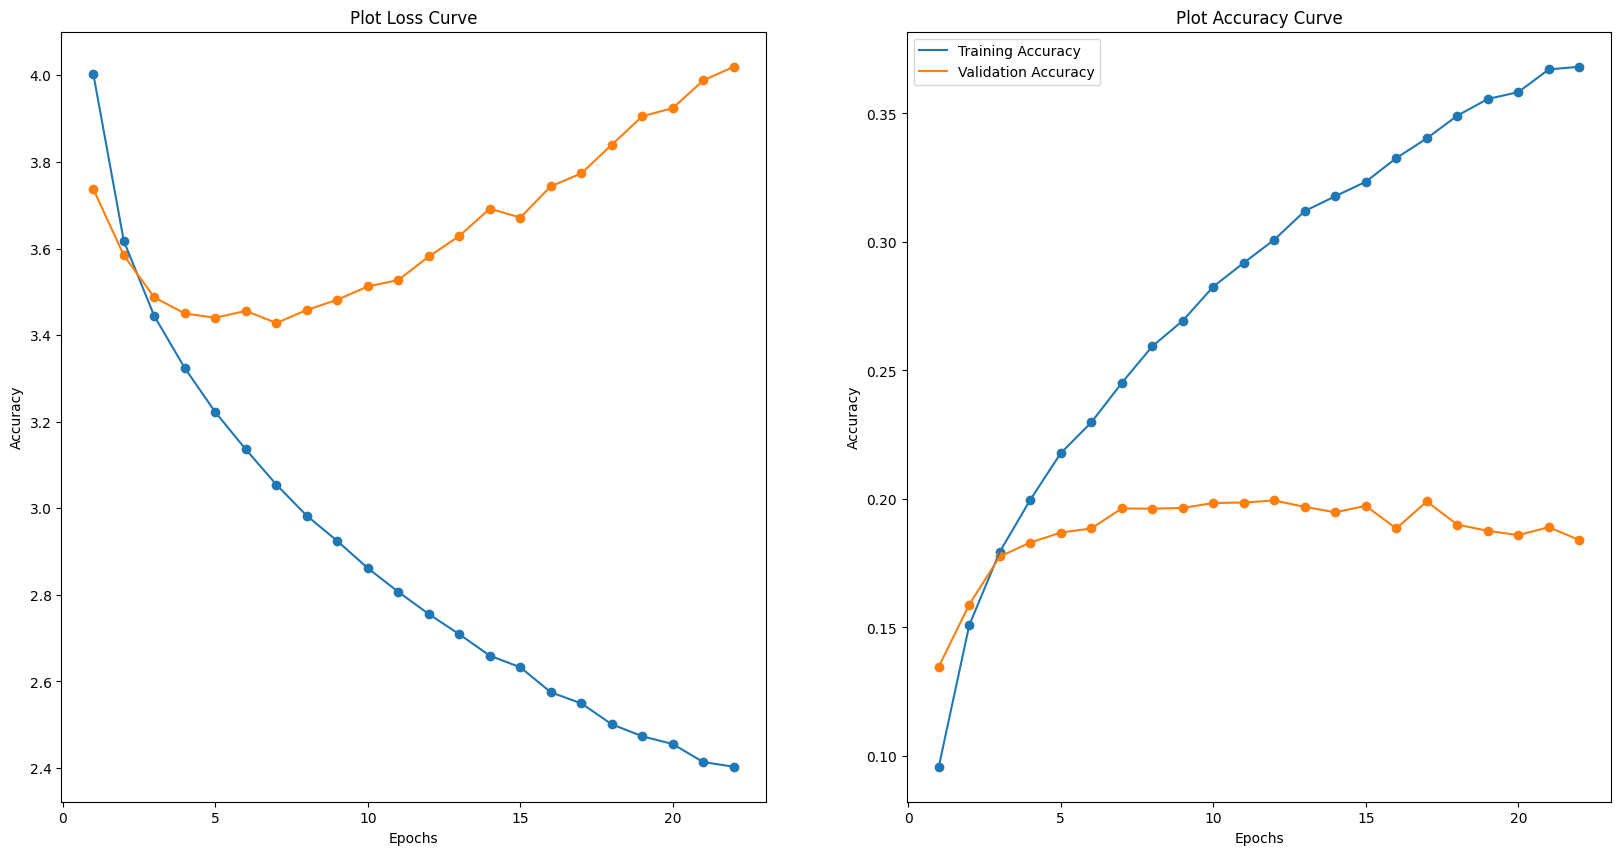

In [159]:
print(storeResult(baseAugModelHistory))
plot_loss_curve(baseAugModelHistory)
plt.show()


<u><b>Observations</b></u>

We can also see that by augmenting the data, we see that even though the accuracy for both training and validation decreased, there is a slight decrease in validation loss which means that the model is becoming more generalise to fit to the dataset. However, as the accuracy is still very low, more improvements need to be made to make the model better.

##### Training baseline model with CutMix Augmentation

As mentioned previously, we will train the baseline model with the dataset that was cutmix.


In [28]:
tf.keras.backend.clear_session()
inputs = Input(IMG_SIZE)  # Input
x = pre_processing_v1(inputs)
x = Flatten()(x)
x = Dense(128, 'relu')(x)  # Hidden Layer 1
x = Dense(128, 'relu')(x)  # Hidden Layer 3
x = Dense(128, 'relu')(x)  # Hidden Layer 3
x = Dense(NUM_CLASS, 'softmax')(x)
baseCutMixModel = Model(inputs=inputs, outputs=x, name="baselineCutMix")
baseCutMixModel.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                  loss='categorical_crossentropy', metrics=['accuracy'])


In [29]:
baseCutMixModelHistory = baseCutMixModel.fit(train_ds_cutmix, epochs=100,
                                 validation_data=(x_val, y_val), batch_size=BATCH_SIZE, callbacks=EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True))


Epoch 1/100
625/625 [==============================] - 5s 8ms/step - loss: 4.3627 - accuracy: 0.0739 - val_loss: 3.8675 - val_accuracy: 0.1239
Epoch 2/100
625/625 [==============================] - 5s 8ms/step - loss: 4.1414 - accuracy: 0.1256 - val_loss: 3.7126 - val_accuracy: 0.1388
Epoch 3/100
625/625 [==============================] - 4s 7ms/step - loss: 4.0469 - accuracy: 0.1518 - val_loss: 3.6346 - val_accuracy: 0.1563
Epoch 4/100
625/625 [==============================] - 4s 7ms/step - loss: 3.9757 - accuracy: 0.1688 - val_loss: 3.6011 - val_accuracy: 0.1633
Epoch 5/100
625/625 [==============================] - 5s 8ms/step - loss: 3.9172 - accuracy: 0.1845 - val_loss: 3.5585 - val_accuracy: 0.1680
Epoch 6/100
625/625 [==============================] - 4s 7ms/step - loss: 3.8646 - accuracy: 0.2008 - val_loss: 3.5501 - val_accuracy: 0.1748
Epoch 7/100
625/625 [==============================] - 4s 7ms/step - loss: 3.8196 - accuracy: 0.2079 - val_loss: 3.5266 - val_accuracy: 0.1779

C:\Users\Soh Hong Yu\AppData\Local\Temp\ipykernel_10728\3161967465.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allResults = allResults.append(result, ignore_index=True)


{'Model Name': 'baselineCutMix', 'Epochs': 20, 'Batch Size': 64, 'Train Loss': 3.696510076522827, 'Val Loss': 3.534803628921509, 'Train Acc': 0.24435000121593475, 'Val Acc': 0.1835000067949295, '[Train - Val] Acc': 0.06084999442100525}


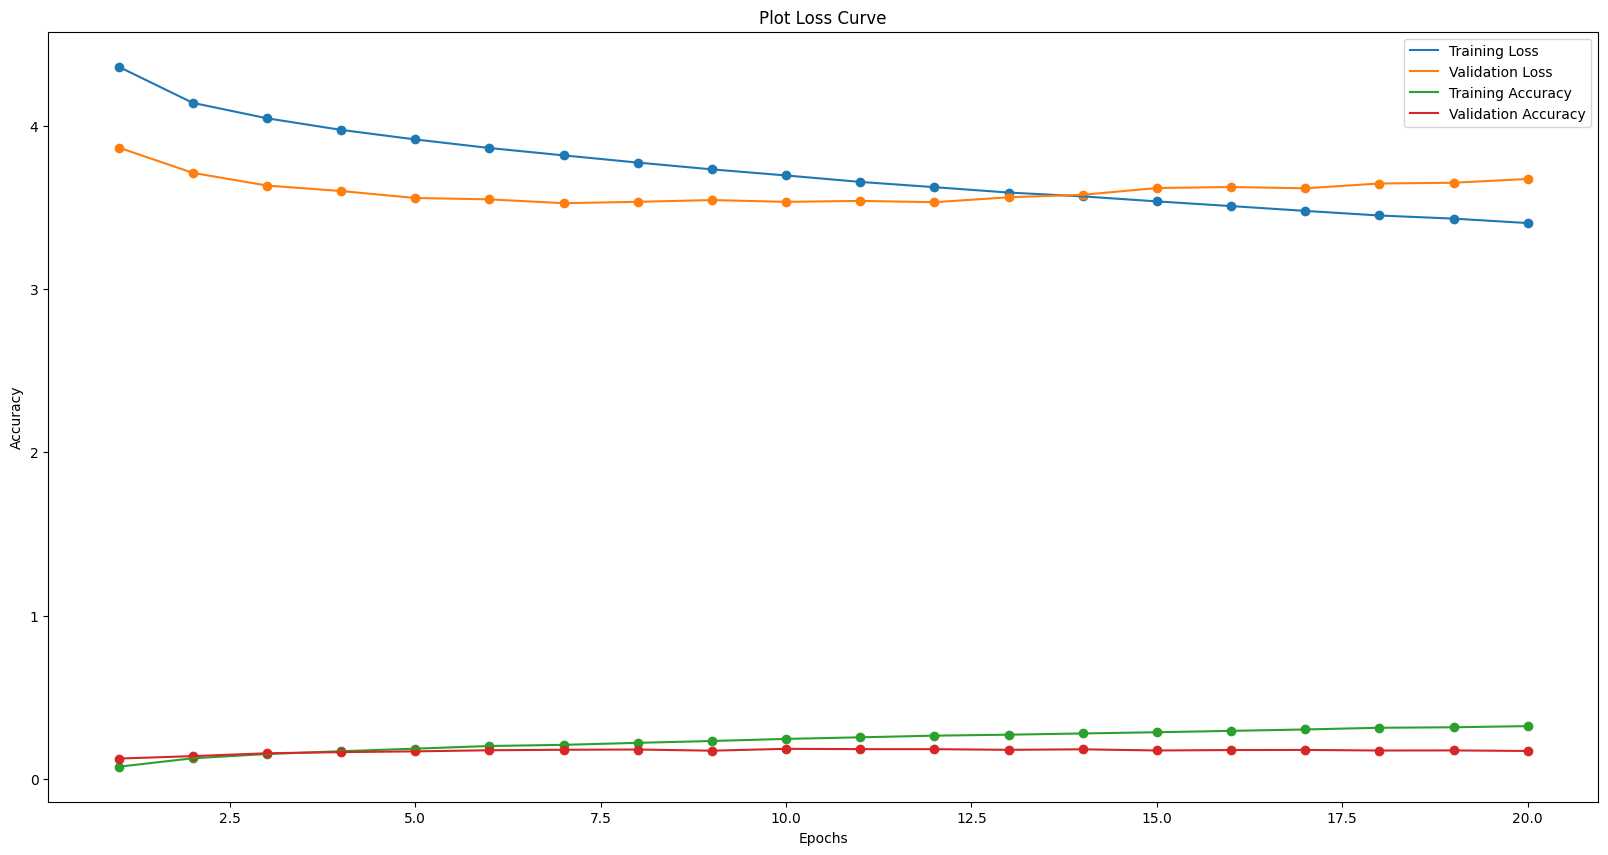

In [30]:
print(storeResult(baseCutMixModelHistory))
plot_loss_curve(baseCutMixModelHistory)
plt.show()

<u><b>Observation</b></u>

We can also see that by cut mixing the data, we see that the accuracy for both training and validation decreased, this is likely because the model is too simple and it was not able to find the similarity and between the different images. Furthermore, the dataset is relatively small which makes the cutmix algorithm not as strong as the cutmix algorithm works better with larger dataset like imagenet.




### Conv2D Neural Network Model

After creating our baseline model, we begin making more complex models. We will be building a simple convolutional neural network (CNN). We will be using tensorflow's Conv2D layers to build the models. The reason why we use a CNN architecture is because CNNs are well suited to solve the problem of image classification. This is because the convolution layers consider the context in the local neighbourhood of the input data and constructs features from the neighbourhood. CNNs also reduce the number of parameters in the network due to its sparse connections and weight sharing properties.


##### Training conv2D model without Data Augmentation


In [163]:
tf.keras.backend.clear_session()
inputs = Input(IMG_SIZE)  # Input
x = pre_processing_v1(inputs)
x = Conv2D(32, (5, 5), input_shape=IMG_SIZE, activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.2)(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dense(NUM_CLASS, 'softmax')(x)
conv2DModel = Model(inputs=inputs, outputs=x, name="conv2D")
conv2DModel.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                    loss='categorical_crossentropy', metrics=['accuracy'])


In [164]:
conv2DModel.summary()


Model: "conv2D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 normalization (Normalizatio  (None, 32, 32, 3)        7         
 n)                                                              
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 flatten (Flatten)           (None, 6272)              0    

In [165]:
conv2DModelHistory = conv2DModel.fit(x_train, y_train, epochs=100,
                                     validation_data=(x_val, y_val), batch_size=BATCH_SIZE, callbacks=EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True))


Epoch 1/100
625/625 [==============================] - 4s 6ms/step - loss: 3.8144 - accuracy: 0.1280 - val_loss: 3.3800 - val_accuracy: 0.1998
Epoch 2/100
625/625 [==============================] - 3s 5ms/step - loss: 3.1669 - accuracy: 0.2395 - val_loss: 3.1078 - val_accuracy: 0.2567
Epoch 3/100
625/625 [==============================] - 4s 6ms/step - loss: 2.8232 - accuracy: 0.2996 - val_loss: 2.9606 - val_accuracy: 0.2773
Epoch 4/100
625/625 [==============================] - 3s 5ms/step - loss: 2.5829 - accuracy: 0.3494 - val_loss: 2.8591 - val_accuracy: 0.3062
Epoch 5/100
625/625 [==============================] - 4s 6ms/step - loss: 2.4009 - accuracy: 0.3865 - val_loss: 2.8660 - val_accuracy: 0.3143
Epoch 6/100
625/625 [==============================] - 3s 6ms/step - loss: 2.2461 - accuracy: 0.4125 - val_loss: 2.9159 - val_accuracy: 0.3143
Epoch 7/100
625/625 [==============================] - 3s 5ms/step - loss: 2.0967 - accuracy: 0.4465 - val_loss: 2.9434 - val_accuracy: 0.3079

{'Model Name': 'conv2D', 'Epochs': 22, 'Batch Size': 64, 'Train Loss': 1.4723334312438965, 'Val Loss': 3.2979133129119873, 'Train Acc': 0.5880500078201294, 'Val Acc': 0.3158000111579895, '[Train - Val] Acc': 0.2722499966621399}


C:\Users\Soh Hong Yu\AppData\Local\Temp\ipykernel_30216\3161967465.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allResults = allResults.append(result, ignore_index=True)


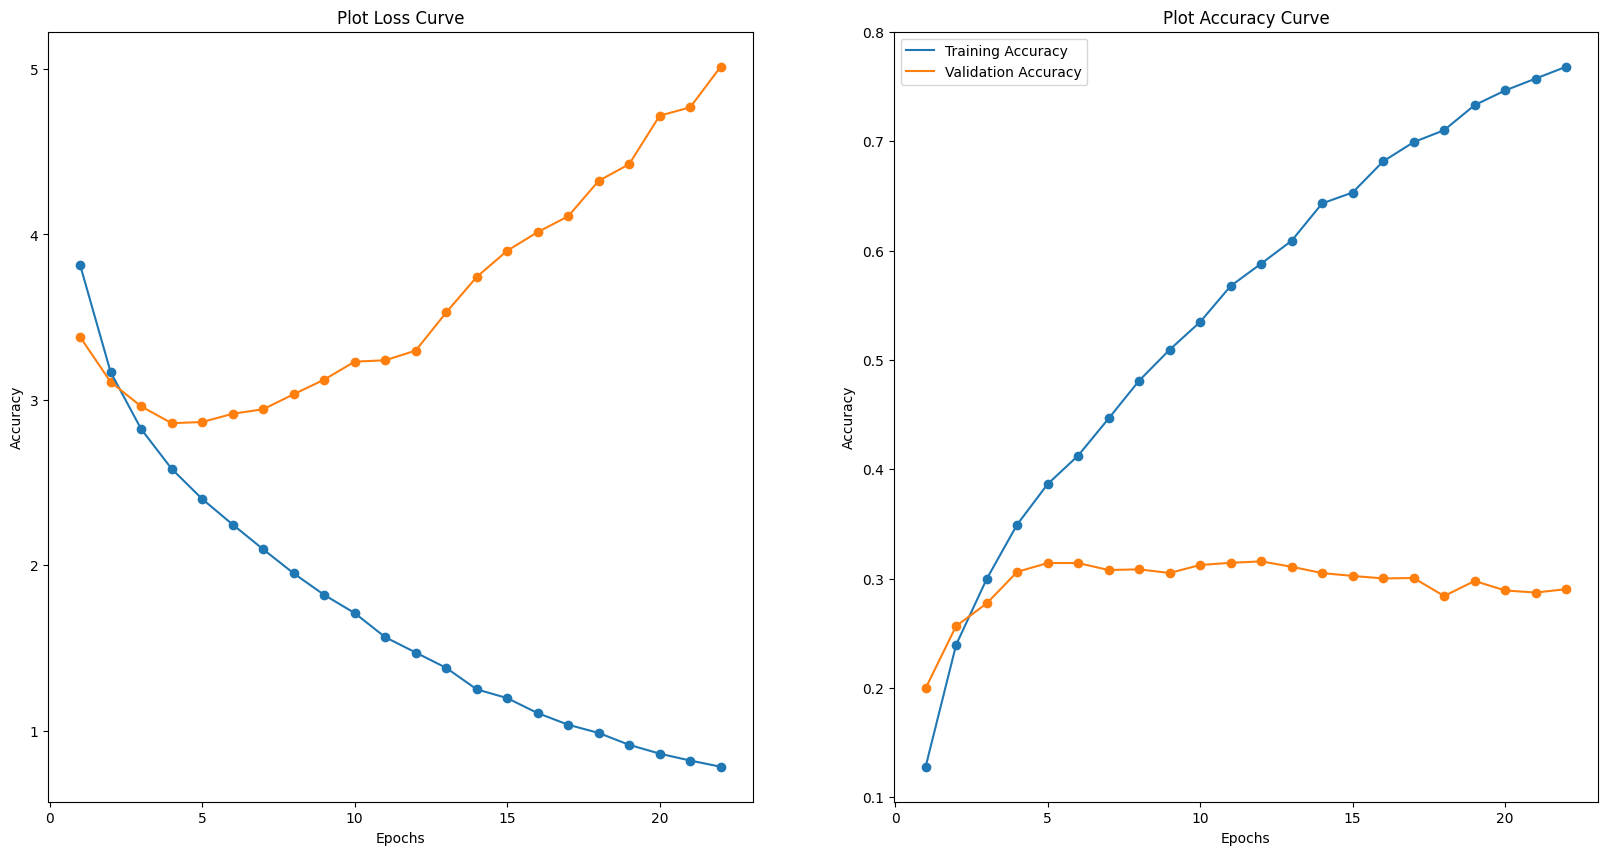

In [166]:
print(storeResult(conv2DModelHistory))
plot_loss_curve(conv2DModelHistory)
plt.show()

<u><b>Observations</b></u>

Comparing the Conv2D model with the baseline model, we can see that there is a huge difference in the training accuracy but the validation accuracy still remain around 30%. This suggest that there is some form of overfitting.

##### Training conv2D model with Data Augmentation


In [167]:
tf.keras.backend.clear_session()
inputs = Input(IMG_SIZE)  # Input
x = pre_processing_v1(inputs)
x = Conv2D(32, (5, 5), input_shape=IMG_SIZE, activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.2)(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dense(NUM_CLASS, 'softmax')(x)
conv2DAugModel = Model(inputs=inputs, outputs=x, name="conv2DAug")
conv2DAugModel.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                    loss='categorical_crossentropy', metrics=['accuracy'])


In [168]:
conv2DAugModelHistory = conv2DAugModel.fit(x_train_aug, y_train, epochs=100,
                                     validation_data=(x_val, y_val), batch_size=BATCH_SIZE, callbacks=EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True))


Epoch 1/100
625/625 [==============================] - 4s 6ms/step - loss: 3.8514 - accuracy: 0.1198 - val_loss: 3.4553 - val_accuracy: 0.1790
Epoch 2/100
625/625 [==============================] - 4s 6ms/step - loss: 3.2258 - accuracy: 0.2209 - val_loss: 3.1002 - val_accuracy: 0.2484
Epoch 3/100
625/625 [==============================] - 4s 6ms/step - loss: 2.9186 - accuracy: 0.2772 - val_loss: 2.9416 - val_accuracy: 0.2779
Epoch 4/100
625/625 [==============================] - 3s 6ms/step - loss: 2.7223 - accuracy: 0.3156 - val_loss: 2.9326 - val_accuracy: 0.2861
Epoch 5/100
625/625 [==============================] - 4s 6ms/step - loss: 2.5545 - accuracy: 0.3501 - val_loss: 2.8781 - val_accuracy: 0.3090
Epoch 6/100
625/625 [==============================] - 3s 6ms/step - loss: 2.3866 - accuracy: 0.3826 - val_loss: 2.8294 - val_accuracy: 0.3086
Epoch 7/100
625/625 [==============================] - 4s 6ms/step - loss: 2.2668 - accuracy: 0.4108 - val_loss: 2.8770 - val_accuracy: 0.3160

{'Model Name': 'conv2DAug', 'Epochs': 17, 'Batch Size': 64, 'Train Loss': 2.26682710647583, 'Val Loss': 2.876986026763916, 'Train Acc': 0.41084998846054077, 'Val Acc': 0.3160000145435333, '[Train - Val] Acc': 0.09484997391700745}


C:\Users\Soh Hong Yu\AppData\Local\Temp\ipykernel_30216\3161967465.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allResults = allResults.append(result, ignore_index=True)


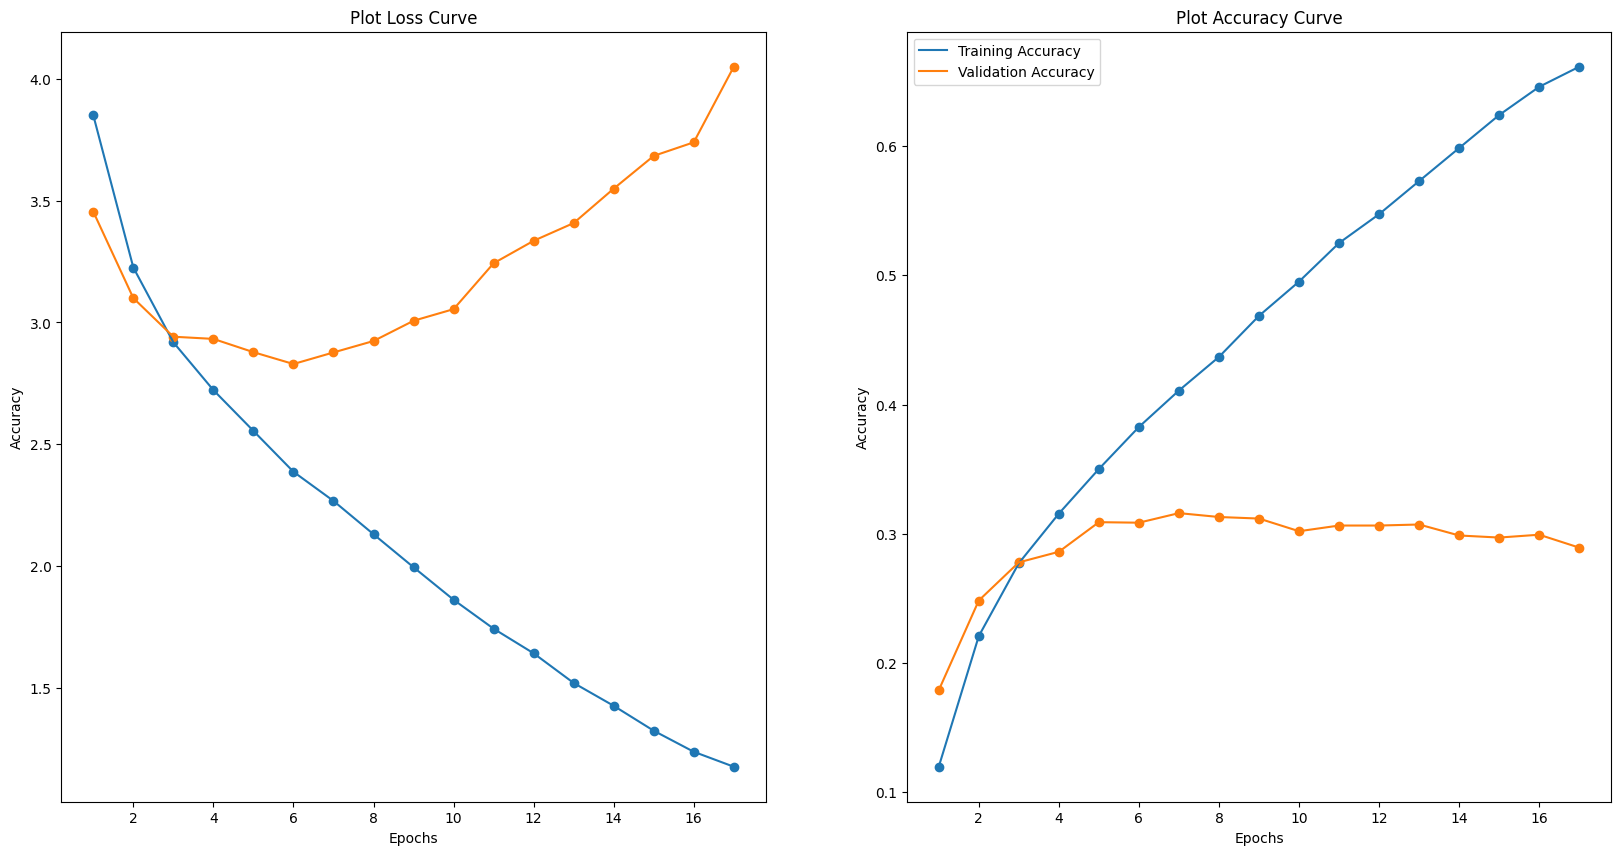

In [169]:
print(storeResult(conv2DAugModelHistory))
plot_loss_curve(conv2DAugModelHistory)
plt.show()

<u><b>Observation</b></u>

Comparing the augmented data trained under the conv2D model, we can see that although training accuracy decreased, the validation accuracy increased. This suggest that using the data augmentation method it decreased overfitting as well as improved the overall model.

##### Training conv2D model with CutMix Augmentation

In [31]:
tf.keras.backend.clear_session()
inputs = Input(IMG_SIZE)  # Input
x = pre_processing_v1(inputs)
x = Conv2D(32, (5, 5), input_shape=IMG_SIZE, activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.2)(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dense(NUM_CLASS, 'softmax')(x)
conv2DCutMixModel = Model(inputs=inputs, outputs=x, name="conv2DCutMix")
conv2DCutMixModel.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                    loss='categorical_crossentropy', metrics=['accuracy'])


In [32]:
conv2DCutMixModelHistory = conv2DCutMixModel.fit(train_ds_cutmix, epochs=100,
                                     validation_data=val_ds, batch_size=BATCH_SIZE, callbacks=EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True))


Epoch 1/100
625/625 [==============================] - 6s 7ms/step - loss: 4.3417 - accuracy: 0.0758 - val_loss: 3.7627 - val_accuracy: 0.1353
Epoch 2/100
625/625 [==============================] - 4s 6ms/step - loss: 4.0502 - accuracy: 0.1424 - val_loss: 3.5050 - val_accuracy: 0.1943
Epoch 3/100
625/625 [==============================] - 4s 6ms/step - loss: 3.8864 - accuracy: 0.1853 - val_loss: 3.2877 - val_accuracy: 0.2220
Epoch 4/100
625/625 [==============================] - 4s 7ms/step - loss: 3.7643 - accuracy: 0.2193 - val_loss: 3.1480 - val_accuracy: 0.2578
Epoch 5/100
625/625 [==============================] - 5s 8ms/step - loss: 3.6594 - accuracy: 0.2475 - val_loss: 3.1071 - val_accuracy: 0.2555
Epoch 6/100
625/625 [==============================] - 5s 8ms/step - loss: 3.5685 - accuracy: 0.2730 - val_loss: 2.9894 - val_accuracy: 0.2812
Epoch 7/100
625/625 [==============================] - 4s 7ms/step - loss: 3.4953 - accuracy: 0.2899 - val_loss: 3.0381 - val_accuracy: 0.2772

C:\Users\Soh Hong Yu\AppData\Local\Temp\ipykernel_10728\3161967465.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allResults = allResults.append(result, ignore_index=True)


{'Model Name': 'conv2DCutMix', 'Epochs': 19, 'Batch Size': 64, 'Train Loss': 3.3561222553253174, 'Val Loss': 2.9555504322052, 'Train Acc': 0.3285500109195709, 'Val Acc': 0.29679998755455017, '[Train - Val] Acc': 0.03175002336502075}


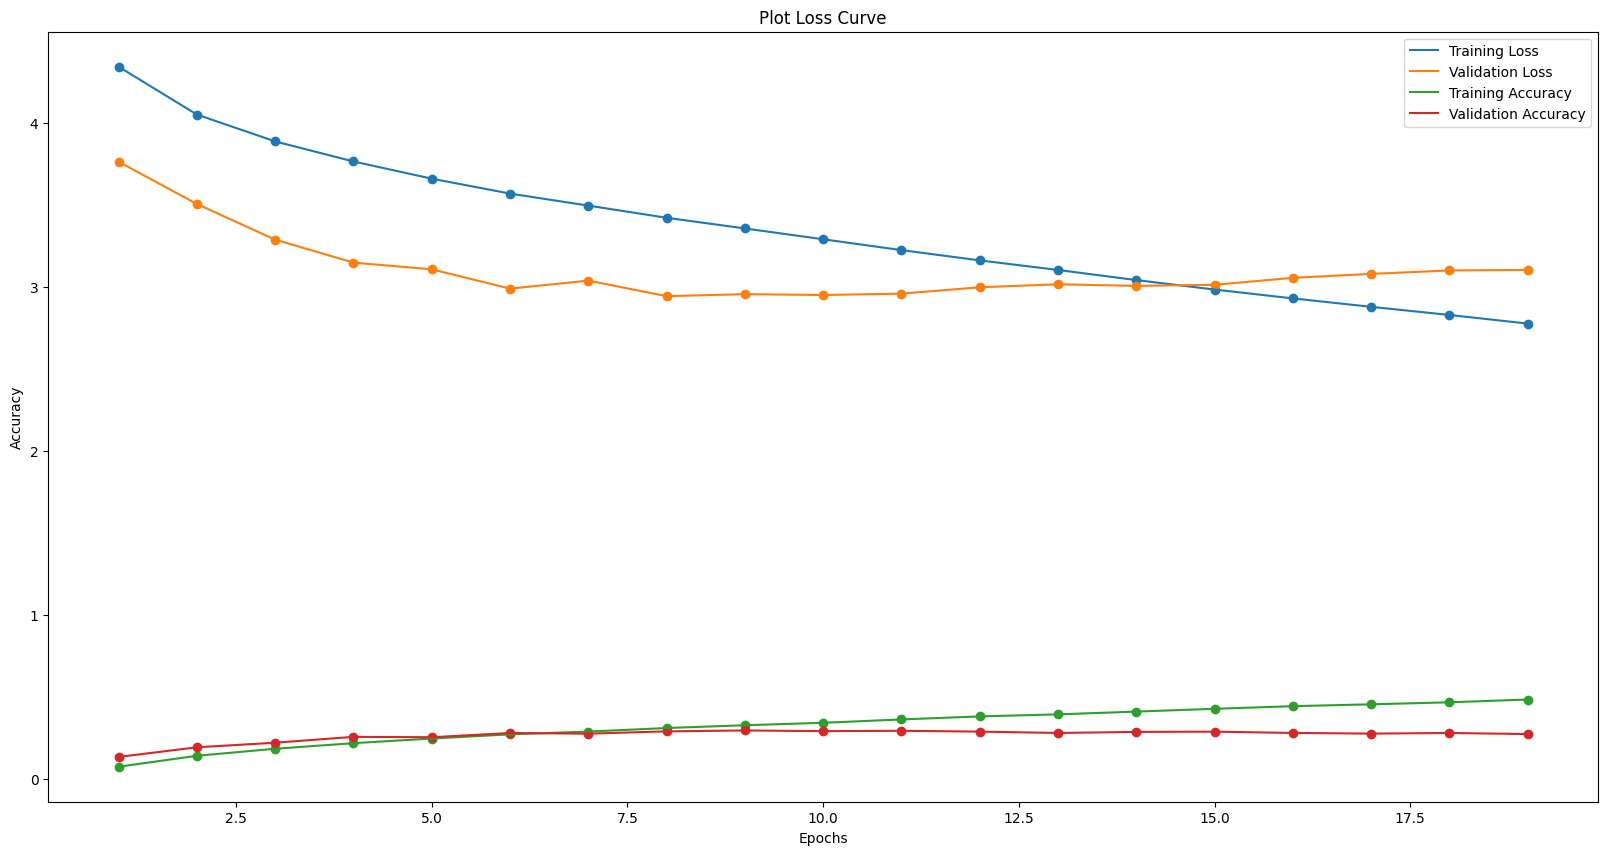

In [33]:
print(storeResult(conv2DCutMixModelHistory))
plot_loss_curve(conv2DCutMixModelHistory)
plt.show()

<u><b>Observations</b></u>

We note that training loss and training accuracy increased. However, there is no improvement in the validation accuracy and loss. This suggest that the model is overfitted to the training dataset.

### CustomVGG Model

VGG-16 is a convolutional neural network that is 16 layers deep.

<img src="https://miro.medium.com/max/828/1*UeAhoKM0kJfCPA03wt5H0A.png">


##### Building the Custom VGG model

From the main VGG16 model, we can see that the VGG network is build based on blocks. Each block contains 2/3 layers of Conv2D and a MaxPooling2D layer. We will build it based on the [https://d2l.ai/chapter_convolutional-modern/vgg.html#]. After the main VGG block has been created, there is a flatten layer followed by 2 fully connected neural networks [relu] which helps the model reach the output layer [softmax].

In [38]:
def vgg_block(num_convs, num_channels):
    blk = Sequential()
    for _ in range(num_convs):
        blk.add(
            Conv2D(num_channels, kernel_size=3,
                   padding='same', activation='relu'))
        blk.add(
            BatchNormalization())
    blk.add(MaxPool2D(pool_size=2, strides=2))
    return blk


##### Training CustomVGG model without Data Augmentation


In [174]:
tf.keras.backend.clear_session()
inputs = Input(IMG_SIZE)  # Input
x = pre_processing_v1(inputs)
x = vgg_block(2, 32)(x)  # we are using less filters compared to VGG16
x = vgg_block(2, 64)(x)
x = vgg_block(3, 128)(x)
x = vgg_block(3, 256)(x)
x = GlobalAveragePooling2D()(x)
x = Dense(256, 'relu')(x)
x = Dropout(0.3)(x)
x = Dense(NUM_CLASS, 'softmax')(x)
customVGGModel = Model(inputs=inputs, outputs=x, name="CustomVGG")
customVGGModel.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                       loss='categorical_crossentropy', metrics=['accuracy'])


In [175]:
customVGGModelHistory = customVGGModel.fit(x_train, y_train, epochs=50,
                                           validation_data=(x_val, y_val), batch_size=BATCH_SIZE, callbacks=EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True))


Epoch 1/50
625/625 [==============================] - 13s 17ms/step - loss: 3.9421 - accuracy: 0.1040 - val_loss: 3.5052 - val_accuracy: 0.1611
Epoch 2/50
625/625 [==============================] - 10s 16ms/step - loss: 3.2797 - accuracy: 0.2005 - val_loss: 3.4450 - val_accuracy: 0.1911
Epoch 3/50
625/625 [==============================] - 10s 17ms/step - loss: 2.8478 - accuracy: 0.2772 - val_loss: 2.7374 - val_accuracy: 0.3035
Epoch 4/50
625/625 [==============================] - 11s 17ms/step - loss: 2.5009 - accuracy: 0.3469 - val_loss: 2.4229 - val_accuracy: 0.3696
Epoch 5/50
625/625 [==============================] - 11s 18ms/step - loss: 2.2164 - accuracy: 0.4069 - val_loss: 2.3237 - val_accuracy: 0.3880
Epoch 6/50
625/625 [==============================] - 11s 18ms/step - loss: 1.9888 - accuracy: 0.4580 - val_loss: 2.1975 - val_accuracy: 0.4202
Epoch 7/50
625/625 [==============================] - 12s 18ms/step - loss: 1.7707 - accuracy: 0.5049 - val_loss: 2.1444 - val_accuracy:

{'Model Name': 'CustomVGG', 'Epochs': 50, 'Batch Size': 64, 'Train Loss': 0.03357550874352455, 'Val Loss': 3.9237570762634277, 'Train Acc': 0.9894000291824341, 'Val Acc': 0.5054000020027161, '[Train - Val] Acc': 0.484000027179718}


C:\Users\Soh Hong Yu\AppData\Local\Temp\ipykernel_30216\3161967465.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allResults = allResults.append(result, ignore_index=True)


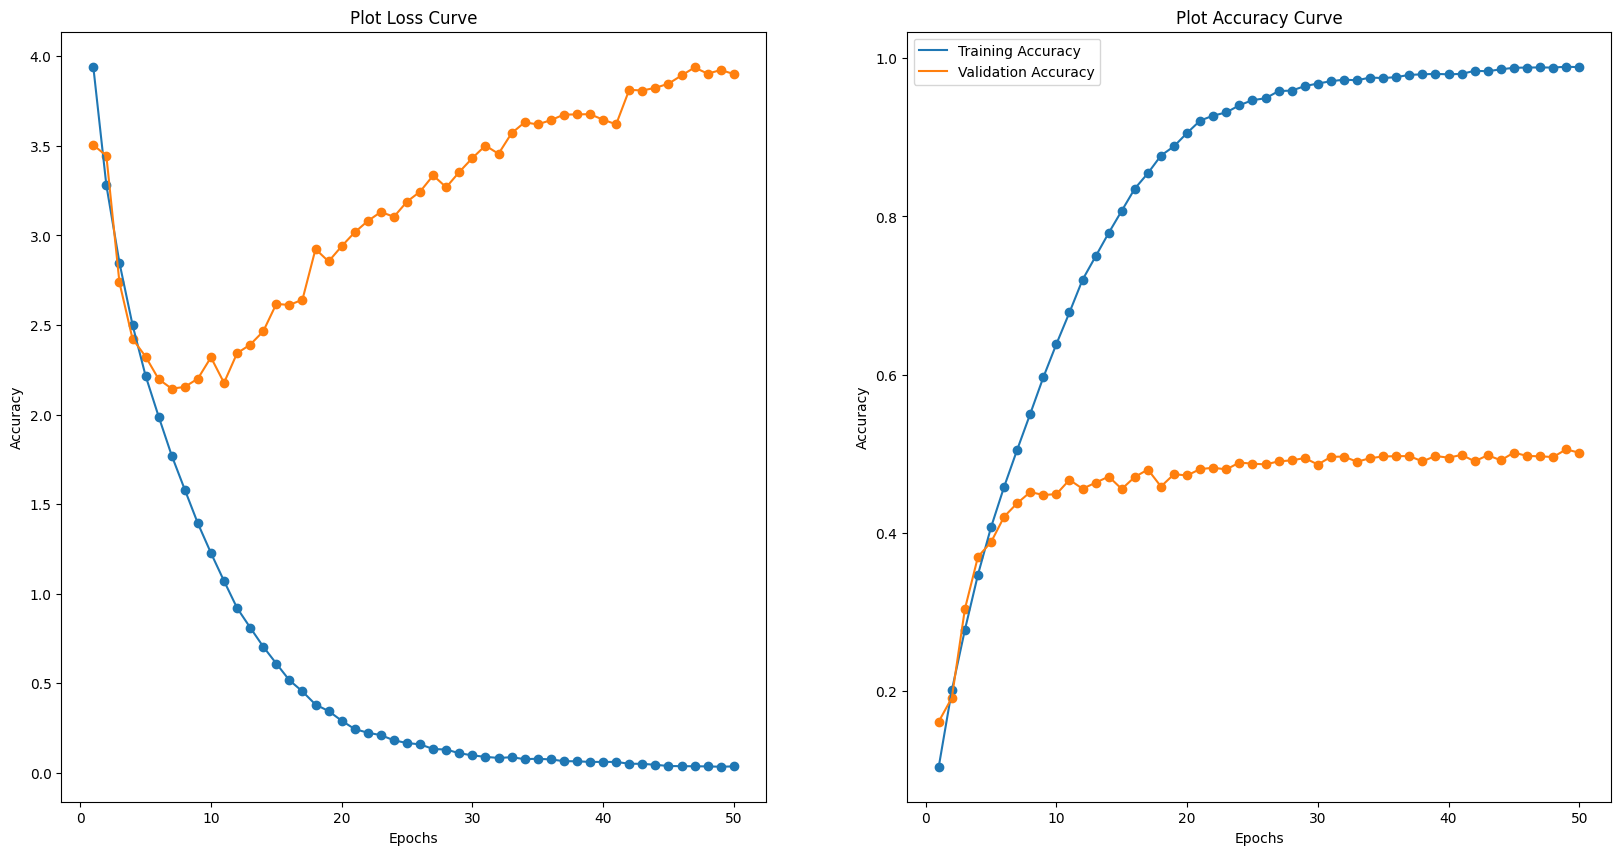

In [176]:
print(storeResult(customVGGModelHistory))
plot_loss_curve(customVGGModelHistory)
plt.show()

<u><b>Observations</b></u>

Comparing our baseline model and customVGG model, we can see that the customVGG model is very overfitted as the validation loss is super high while training loss is super low. We need to do data augmentation etc to reduce overfitting.

##### Training CustomVGG model without Data Augmentation and using L1 Lasso Regularisation




In [37]:
def vgg_block_l1(num_convs, num_channels, weight_decay=0.0005):
    blk = Sequential()
    for _ in range(num_convs):
        blk.add(
            Conv2D(num_channels, kernel_size=3,
                   padding='same', activation='relu', kernel_regularizer=l1(weight_decay)))
        blk.add(
            BatchNormalization())
    blk.add(MaxPool2D(pool_size=2, strides=2))
    return blk


In [178]:
tf.keras.backend.clear_session()
inputs = Input(IMG_SIZE)  # Input
x = pre_processing_v1(inputs)
x = vgg_block_l1(2, 32)(x)  # we are using less filters compared to VGG16
x = vgg_block_l1(2, 64)(x)
x = vgg_block_l1(3, 128)(x)
x = vgg_block_l1(3, 256)(x)
x = GlobalAveragePooling2D()(x)
x = Dense(256, 'relu')(x)
x = Dropout(0.3)(x)
x = Dense(NUM_CLASS, 'softmax')(x)
customVGGL1Model = Model(inputs=inputs, outputs=x, name="CustomVGG_L1")
customVGGL1Model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                         loss='categorical_crossentropy', metrics=['accuracy'])


In [179]:
customVGGL1ModelHistory = customVGGL1Model.fit(x_train, y_train, epochs=50,
                                               validation_data=(x_val, y_val), batch_size=BATCH_SIZE, callbacks=EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True))


Epoch 1/50
625/625 [==============================] - 20s 27ms/step - loss: 13.9563 - accuracy: 0.0861 - val_loss: 7.5263 - val_accuracy: 0.0546
Epoch 2/50
625/625 [==============================] - 15s 24ms/step - loss: 5.9061 - accuracy: 0.1020 - val_loss: 5.7275 - val_accuracy: 0.0663
Epoch 3/50
625/625 [==============================] - 15s 24ms/step - loss: 5.1977 - accuracy: 0.1112 - val_loss: 5.0844 - val_accuracy: 0.1214
Epoch 4/50
625/625 [==============================] - 15s 24ms/step - loss: 4.9844 - accuracy: 0.1307 - val_loss: 5.0463 - val_accuracy: 0.1240
Epoch 5/50
625/625 [==============================] - 15s 24ms/step - loss: 4.8669 - accuracy: 0.1521 - val_loss: 4.7668 - val_accuracy: 0.1657
Epoch 6/50
625/625 [==============================] - 16s 25ms/step - loss: 4.7200 - accuracy: 0.1723 - val_loss: 4.8663 - val_accuracy: 0.1647
Epoch 7/50
625/625 [==============================] - 15s 24ms/step - loss: 4.5843 - accuracy: 0.1993 - val_loss: 4.7428 - val_accuracy

C:\Users\Soh Hong Yu\AppData\Local\Temp\ipykernel_30216\3161967465.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allResults = allResults.append(result, ignore_index=True)


{'Model Name': 'CustomVGG_L1', 'Epochs': 47, 'Batch Size': 64, 'Train Loss': 3.280015230178833, 'Val Loss': 3.3387374877929688, 'Train Acc': 0.4408000111579895, 'Val Acc': 0.439300000667572, '[Train - Val] Acc': 0.0015000104904174805}


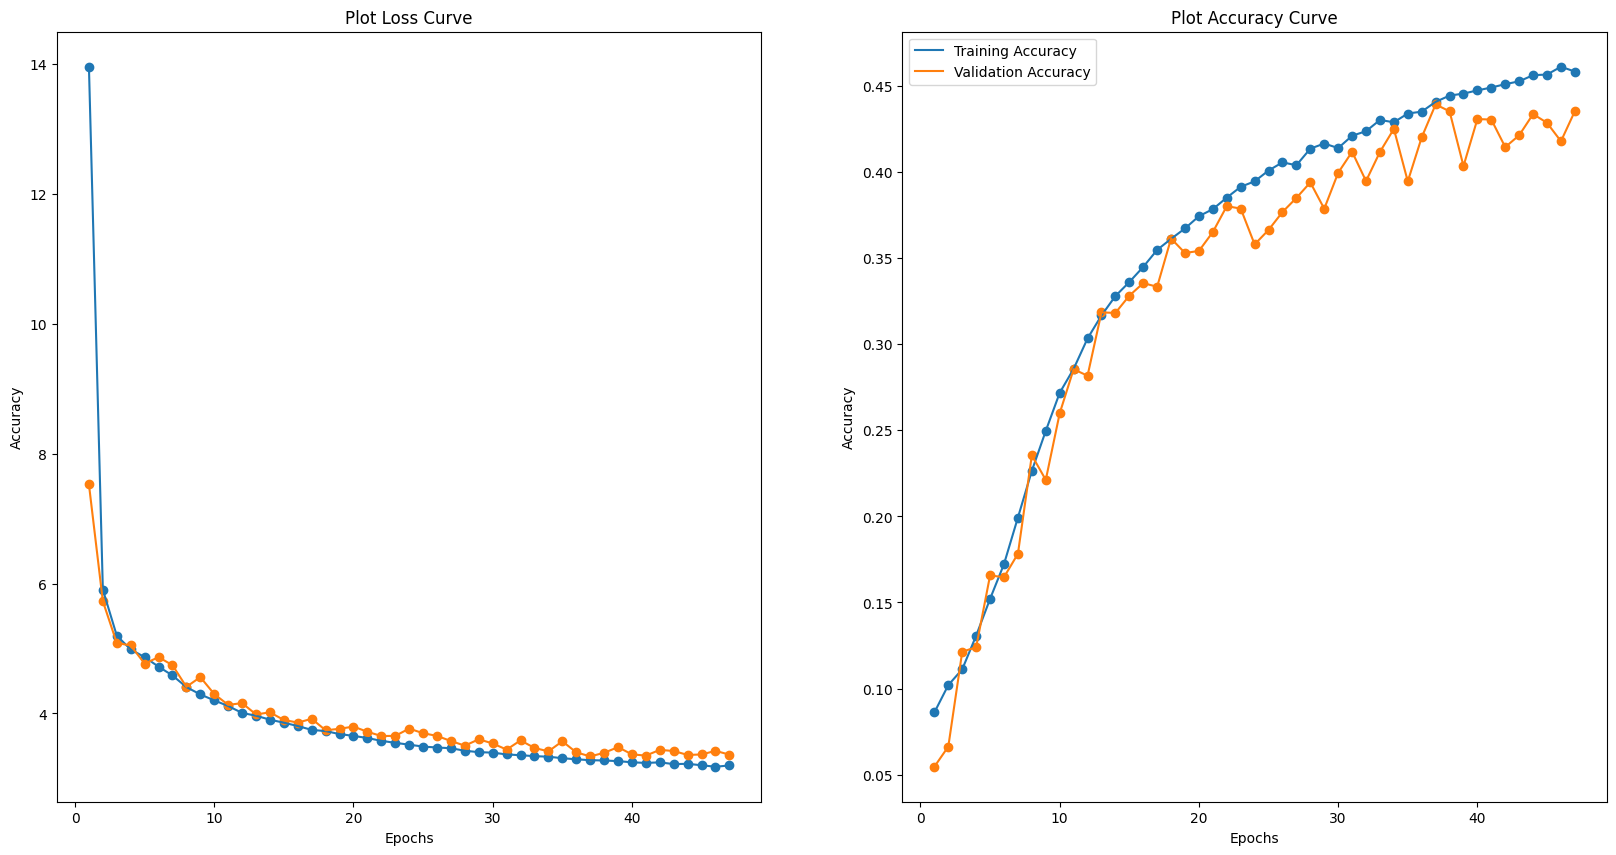

In [180]:
print(storeResult(customVGGL1ModelHistory))
plot_loss_curve(customVGGL1ModelHistory)
plt.show()


<u><b>Observations</b></u>

Even though by applying the L1 Lasso Regularisation, the model becomes generalise as both loss functions decreased. The decrease is consistent but the accuracy of both training and validation is slightly better than baseline and is worst that the normal conv2D model. This suggest the L1 Lasso Regularisation method is not very strong at improving the accuracy of the models.

##### Training CustomVGG model without Data Augmentation and using L2 Ridge Regularisation

In [36]:
def vgg_block_l2(num_convs, num_channels, weight_decay=0.0005):
    blk = Sequential()
    for _ in range(num_convs):
        blk.add(
            Conv2D(num_channels, kernel_size=3,
                   padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
        blk.add(
            BatchNormalization())
    blk.add(MaxPool2D(pool_size=2, strides=2))
    return blk


In [182]:
tf.keras.backend.clear_session()
inputs = Input(IMG_SIZE)  # Input
x = pre_processing_v1(inputs)
x = vgg_block_l2(2, 32)(x)  # we are using less filters compared to VGG16
x = vgg_block_l2(2, 64)(x)
x = vgg_block_l2(3, 128)(x)
x = vgg_block_l2(3, 256)(x)
x = GlobalAveragePooling2D()(x)
x = Dense(256, 'relu')(x)
x = Dropout(0.3)(x)
x = Dense(NUM_CLASS, 'softmax')(x)
customVGGL2Model = Model(inputs=inputs, outputs=x, name="CustomVGG_L2")
customVGGL2Model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                         loss='categorical_crossentropy', metrics=['accuracy'])


In [183]:
customVGGL2ModelHistory = customVGGL2Model.fit(x_train, y_train, epochs=50,
                                               validation_data=(x_val, y_val), batch_size=BATCH_SIZE, callbacks=EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True))


Epoch 1/50
625/625 [==============================] - 24s 33ms/step - loss: 4.5456 - accuracy: 0.1012 - val_loss: 4.0920 - val_accuracy: 0.1657
Epoch 2/50
625/625 [==============================] - 16s 26ms/step - loss: 3.8665 - accuracy: 0.1989 - val_loss: 3.6026 - val_accuracy: 0.2383
Epoch 3/50
625/625 [==============================] - 17s 27ms/step - loss: 3.4179 - accuracy: 0.2706 - val_loss: 3.2325 - val_accuracy: 0.3047
Epoch 4/50
625/625 [==============================] - 17s 27ms/step - loss: 3.0401 - accuracy: 0.3446 - val_loss: 2.9892 - val_accuracy: 0.3554
Epoch 5/50
625/625 [==============================] - 18s 29ms/step - loss: 2.7742 - accuracy: 0.4004 - val_loss: 2.8413 - val_accuracy: 0.3927
Epoch 6/50
625/625 [==============================] - 17s 27ms/step - loss: 2.5488 - accuracy: 0.4509 - val_loss: 2.7633 - val_accuracy: 0.4184
Epoch 7/50
625/625 [==============================] - 17s 27ms/step - loss: 2.3720 - accuracy: 0.4951 - val_loss: 2.6139 - val_accuracy:

{'Model Name': 'CustomVGG_L2', 'Epochs': 31, 'Batch Size': 64, 'Train Loss': 1.7207714319229126, 'Val Loss': 3.4211928844451904, 'Train Acc': 0.8033000230789185, 'Val Acc': 0.49380001425743103, '[Train - Val] Acc': 0.3095000088214874}


C:\Users\Soh Hong Yu\AppData\Local\Temp\ipykernel_30216\3161967465.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allResults = allResults.append(result, ignore_index=True)


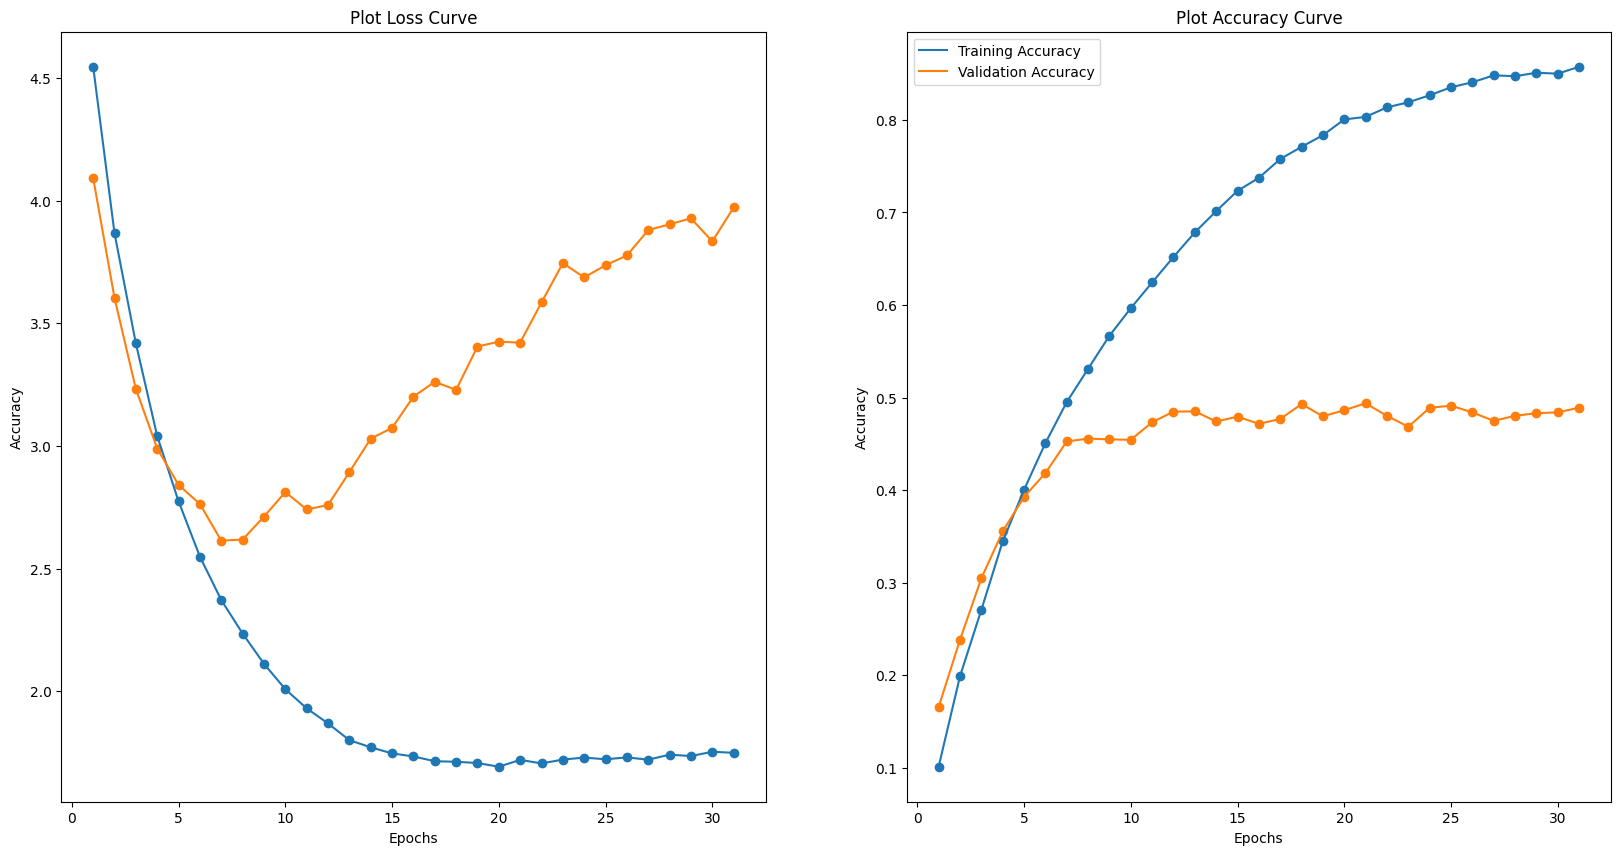

In [184]:
print(storeResult(customVGGL2ModelHistory))
plot_loss_curve(customVGGL2ModelHistory)
plt.show()


<u><b>Observations</b></u>

Comparing the CustomVGGL2 model and CustomVGG model, the accuracy of the validation data increased but there is an increase in training loss and validation loss. This suggest that the model has become less generalised even though a regularisation is suppose to help make the model more generalise and reduce overfitting.

##### Training CustomVGG model with Data Augmentation


In [185]:
tf.keras.backend.clear_session()
inputs = Input(IMG_SIZE)  # Input
x = pre_processing_v1(inputs)
x = vgg_block(2, 32)(x)  # we are using less filters compared to VGG16
x = vgg_block(2, 64)(x)
x = vgg_block(3, 128)(x)
x = vgg_block(3, 256)(x)
x = GlobalAveragePooling2D()(x)
x = Dense(256, 'relu')(x)
x = Dropout(0.3)(x)
x = Dense(NUM_CLASS, 'softmax')(x)
customVGGAugModel = Model(inputs=inputs, outputs=x, name="CustomVGGAug")
customVGGAugModel.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                         loss='categorical_crossentropy', metrics=['accuracy'])


In [186]:
customVGGAugModelHistory = customVGGAugModel.fit(x_train_aug, y_train, epochs=50,
                                               validation_data=(x_val, y_val), batch_size=BATCH_SIZE, callbacks=EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True))


Epoch 1/50
625/625 [==============================] - 18s 25ms/step - loss: 3.9599 - accuracy: 0.0990 - val_loss: 3.6223 - val_accuracy: 0.1408
Epoch 2/50
625/625 [==============================] - 12s 20ms/step - loss: 3.3739 - accuracy: 0.1860 - val_loss: 3.2180 - val_accuracy: 0.2093
Epoch 3/50
625/625 [==============================] - 14s 22ms/step - loss: 2.9742 - accuracy: 0.2557 - val_loss: 2.7690 - val_accuracy: 0.2888
Epoch 4/50
625/625 [==============================] - 16s 26ms/step - loss: 2.6168 - accuracy: 0.3237 - val_loss: 2.5638 - val_accuracy: 0.3382
Epoch 5/50
625/625 [==============================] - 15s 24ms/step - loss: 2.3341 - accuracy: 0.3822 - val_loss: 2.3654 - val_accuracy: 0.3847
Epoch 6/50
625/625 [==============================] - 13s 20ms/step - loss: 2.0888 - accuracy: 0.4358 - val_loss: 2.2284 - val_accuracy: 0.4127
Epoch 7/50
625/625 [==============================] - 12s 19ms/step - loss: 1.8707 - accuracy: 0.4835 - val_loss: 2.1099 - val_accuracy:

{'Model Name': 'CustomVGGAug', 'Epochs': 40, 'Batch Size': 64, 'Train Loss': 0.11450070887804031, 'Val Loss': 3.486694574356079, 'Train Acc': 0.9628000259399414, 'Val Acc': 0.49219998717308044, '[Train - Val] Acc': 0.47060003876686096}


C:\Users\Soh Hong Yu\AppData\Local\Temp\ipykernel_30216\3161967465.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allResults = allResults.append(result, ignore_index=True)


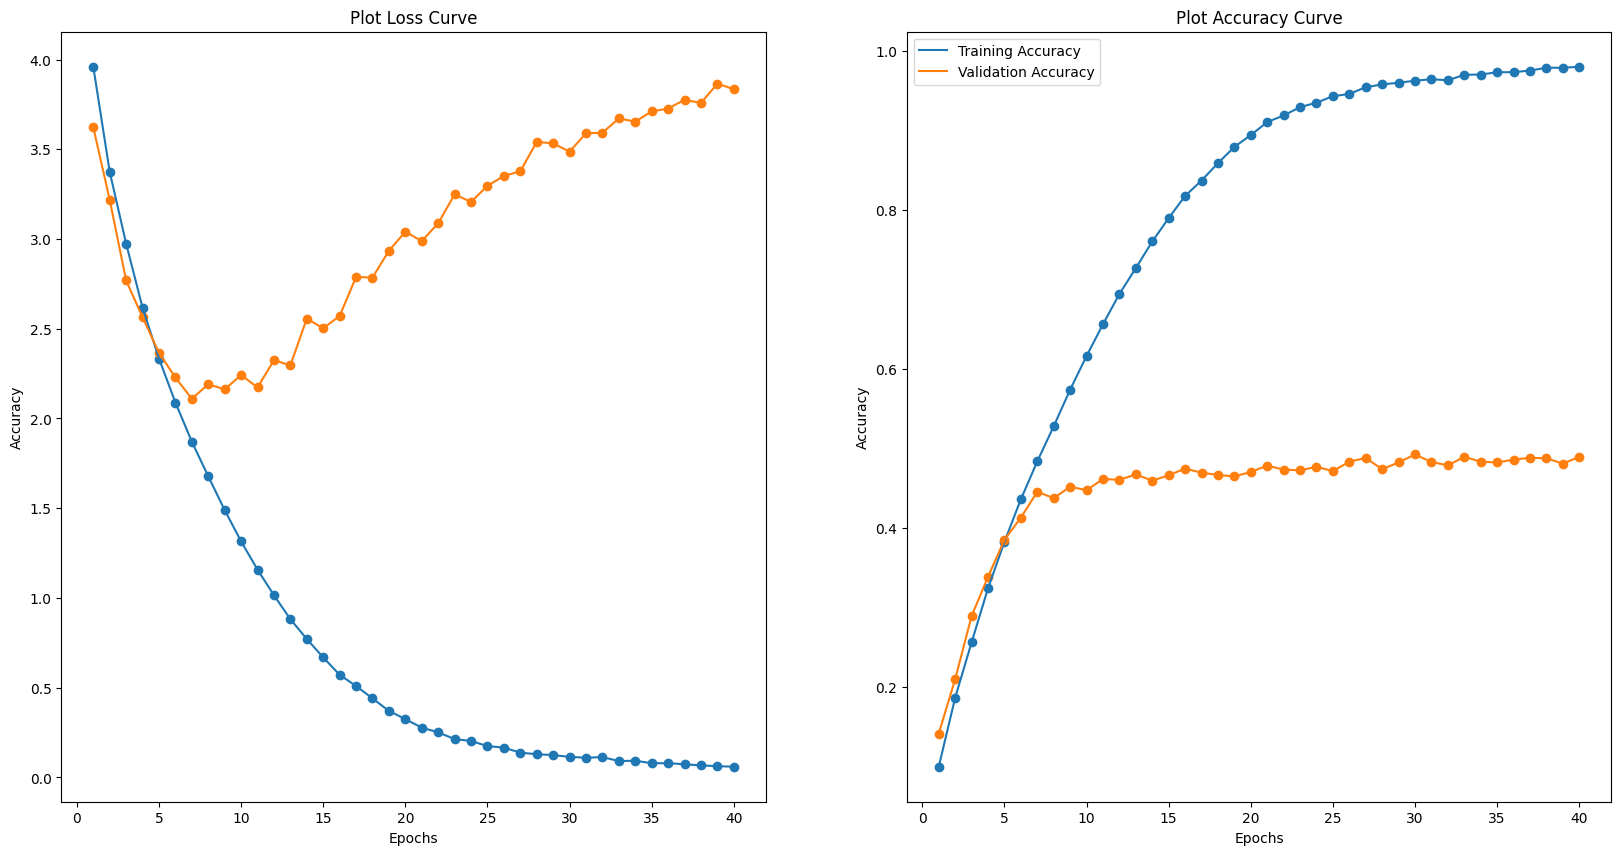

In [187]:
print(storeResult(customVGGAugModelHistory))
plot_loss_curve(customVGGAugModelHistory)
plt.show()


<u><b>Observations</b></u>

Comparing customVGG model without Data Augmentation to the customVGG model with Data Augmentation, we can see that by applying augmentation, the train loss decreased and the train accuracy increase slightly. 

##### Training CustomVGG model with CutMix Augmentation

In [40]:
tf.keras.backend.clear_session()
inputs = Input(IMG_SIZE)  # Input
x = pre_processing_v1(inputs)
x = vgg_block(2, 32)(x)  # we are using less filters compared to VGG16
x = vgg_block(2, 64)(x)
x = vgg_block(3, 128)(x)
x = vgg_block(3, 256)(x)
x = GlobalAveragePooling2D()(x)
x = Dense(256, 'relu')(x)
x = Dropout(0.3)(x)
x = Dense(NUM_CLASS, 'softmax')(x)
customVGGCutMixModel = Model(inputs=inputs, outputs=x, name="CustomVGGCutMix")
customVGGCutMixModel.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                         loss='categorical_crossentropy', metrics=['accuracy'])


In [41]:
customVGGCutMixModelHistory = customVGGCutMixModel.fit(x_train_cutmix, y_train_cutmix, epochs=50,
                                               validation_data=(x_val, y_val), batch_size=BATCH_SIZE, callbacks=EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True))


Epoch 1/50
625/625 [==============================] - 16s 23ms/step - loss: 4.5711 - accuracy: 0.0192 - val_loss: 4.3847 - val_accuracy: 0.0415
Epoch 2/50
625/625 [==============================] - 14s 22ms/step - loss: 4.4463 - accuracy: 0.0370 - val_loss: 4.2351 - val_accuracy: 0.0552
Epoch 3/50
625/625 [==============================] - 14s 22ms/step - loss: 4.3528 - accuracy: 0.0584 - val_loss: 4.0014 - val_accuracy: 0.0754
Epoch 4/50
625/625 [==============================] - 14s 22ms/step - loss: 4.2756 - accuracy: 0.0763 - val_loss: 3.8750 - val_accuracy: 0.0974
Epoch 5/50
625/625 [==============================] - 14s 23ms/step - loss: 4.2061 - accuracy: 0.0950 - val_loss: 3.7796 - val_accuracy: 0.1169
Epoch 6/50
625/625 [==============================] - 14s 23ms/step - loss: 4.1368 - accuracy: 0.1123 - val_loss: 3.6122 - val_accuracy: 0.1453
Epoch 7/50
625/625 [==============================] - 14s 23ms/step - loss: 4.0688 - accuracy: 0.1324 - val_loss: 3.5352 - val_accuracy:

C:\Users\Soh Hong Yu\AppData\Local\Temp\ipykernel_10728\3161967465.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allResults = allResults.append(result, ignore_index=True)


{'Model Name': 'CustomVGGCutMix', 'Epochs': 30, 'Batch Size': 64, 'Train Loss': 3.179823160171509, 'Val Loss': 2.8852908611297607, 'Train Acc': 0.3785249888896942, 'Val Acc': 0.3001999855041504, '[Train - Val] Acc': 0.07832500338554382}


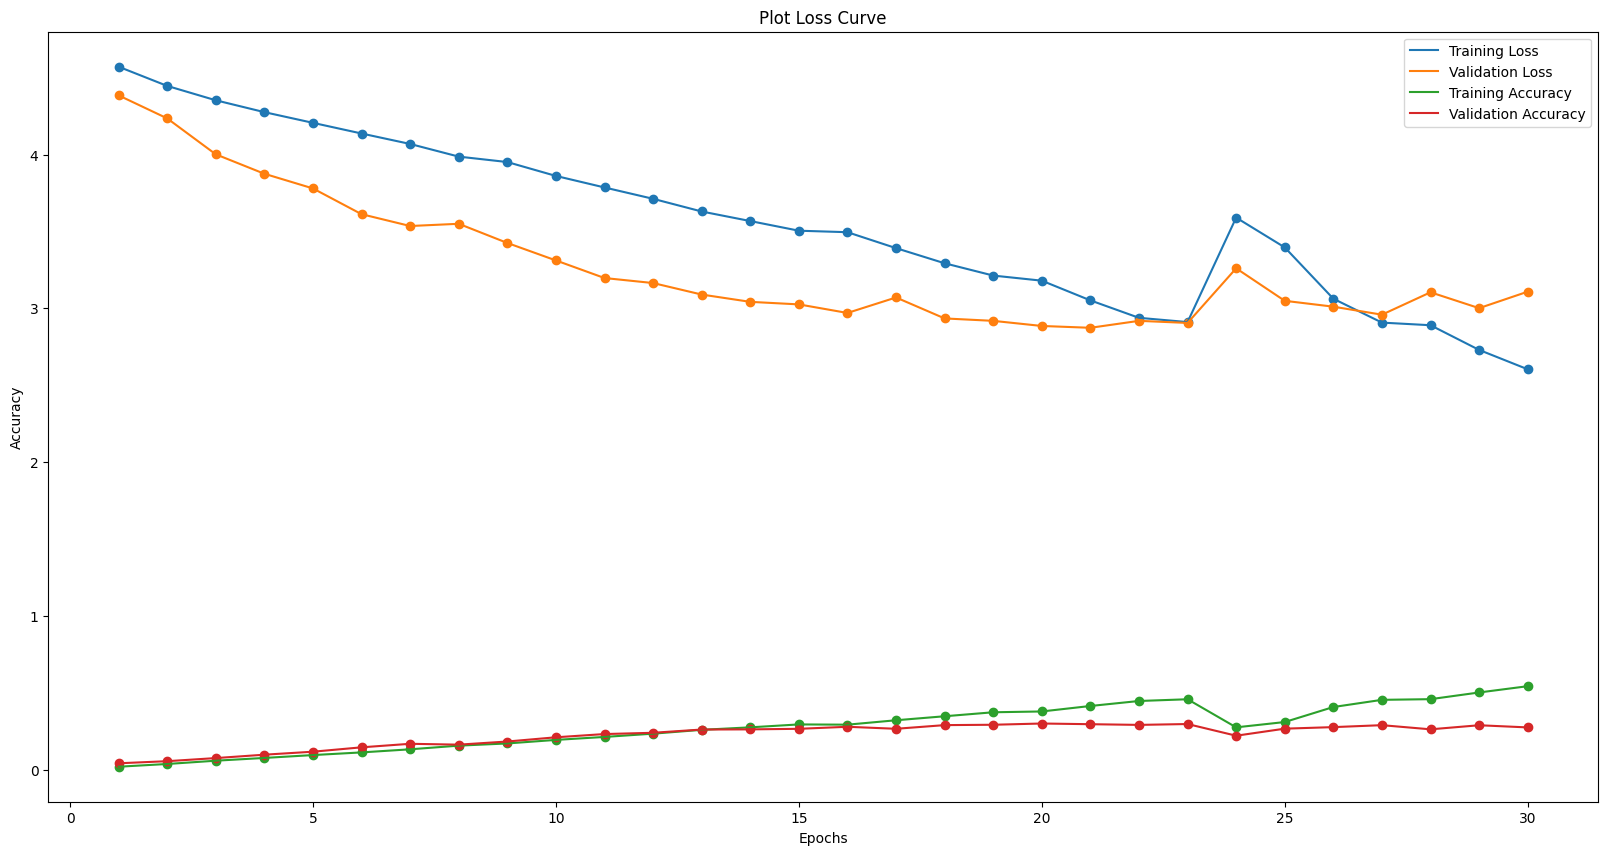

In [42]:
print(storeResult(customVGGCutMixModelHistory))
plot_loss_curve(customVGGCutMixModelHistory)
plt.show()


<u><b>Observations</b></u>

We can see that by applying cutmix, the training and validation accuracy decrease drastically. The decrease in the loss suggest that by applying the cutmix training set it makes the model more generalised to the validation set.


### CustomVGG16
To reduce overfitting, we will be increasing the number of dropout layers. But to keep the model's performance, we will be increasing the number of layers to match the VGG16 model.

##### CustomVGG-16 model without Data Augmentation


In [12]:
def vgg_block_16(num_convs, num_channels, weight_decay=0.0005, dropout=[]):
    blk = Sequential()    
    while num_convs - len(dropout) > 0:
        dropout.append(0)
    for idx in range(num_convs):
        blk.add(
            Conv2D(num_channels, kernel_size=3,
                   padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
        blk.add(
            BatchNormalization())
        blk.add(Dropout(dropout[idx]))
    blk.add(MaxPool2D(pool_size=2, strides=2))
    return blk


In [192]:
tf.keras.backend.clear_session()
weight_decay = 0.0005
inputs = Input(IMG_SIZE)  # Input
x = pre_processing_v1(inputs)
x = vgg_block_16(2, 64,dropout=[0.3])(x)
x = vgg_block_16(2, 128,dropout=[0.4])(x)
x = vgg_block_16(3, 256,dropout=[0.4,0.4])(x)
x = vgg_block_16(3, 512,dropout=[0.4,0.4])(x)
x = vgg_block_16(3, 512, dropout=[0.4, 0.4])(x)
x = Dropout(0.5)(x)
x = GlobalAveragePooling2D()(x)
x = Dense(512, 'relu',kernel_regularizer=l2(weight_decay))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(NUM_CLASS, 'softmax')(x)
customVGG16Model = Model(inputs=inputs, outputs=x, name="CustomVGG16")
customVGG16Model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                       loss='categorical_crossentropy', metrics=['accuracy'])


In [193]:
customVGG16Model.summary()

Model: "CustomVGG16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 normalization (Normalizatio  (None, 32, 32, 3)        7         
 n)                                                              
                                                                 
 sequential (Sequential)     (None, 16, 16, 64)        39232     
                                                                 
 sequential_1 (Sequential)   (None, 8, 8, 128)         222464    
                                                                 
 sequential_2 (Sequential)   (None, 4, 4, 256)         1478400   
                                                                 
 sequential_3 (Sequential)   (None, 2, 2, 512)         5905920   
                                                       

In [194]:
customVGG16ModelHistory = customVGG16Model.fit(x_train, y_train, epochs=50,
                                               validation_data=(x_val, y_val), batch_size=BATCH_SIZE, callbacks=EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True))

Epoch 1/50
 16/625 [..............................] - ETA: 48s - loss: 8.5818 - accuracy: 0.0098

ResourceExhaustedError: Graph execution error:

Detected at node 'gradient_tape/CustomVGG16/sequential_4/conv2d_12/Conv2D/Conv2DBackpropFilter' defined at (most recent call last):
    File "c:\Users\Soh Hong Yu\anaconda3\envs\gpu_env\lib\runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\Soh Hong Yu\anaconda3\envs\gpu_env\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\Users\Soh Hong Yu\anaconda3\envs\gpu_env\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\Soh Hong Yu\anaconda3\envs\gpu_env\lib\site-packages\traitlets\config\application.py", line 982, in launch_instance
      app.start()
    File "c:\Users\Soh Hong Yu\anaconda3\envs\gpu_env\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "c:\Users\Soh Hong Yu\anaconda3\envs\gpu_env\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\Soh Hong Yu\anaconda3\envs\gpu_env\lib\asyncio\base_events.py", line 570, in run_forever
      self._run_once()
    File "c:\Users\Soh Hong Yu\anaconda3\envs\gpu_env\lib\asyncio\base_events.py", line 1859, in _run_once
      handle._run()
    File "c:\Users\Soh Hong Yu\anaconda3\envs\gpu_env\lib\asyncio\events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\Soh Hong Yu\anaconda3\envs\gpu_env\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "c:\Users\Soh Hong Yu\anaconda3\envs\gpu_env\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "c:\Users\Soh Hong Yu\anaconda3\envs\gpu_env\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "c:\Users\Soh Hong Yu\anaconda3\envs\gpu_env\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "c:\Users\Soh Hong Yu\anaconda3\envs\gpu_env\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "c:\Users\Soh Hong Yu\anaconda3\envs\gpu_env\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\Soh Hong Yu\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\interactiveshell.py", line 2940, in run_cell
      result = self._run_cell(
    File "c:\Users\Soh Hong Yu\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\interactiveshell.py", line 2995, in _run_cell
      return runner(coro)
    File "c:\Users\Soh Hong Yu\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\Soh Hong Yu\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\interactiveshell.py", line 3194, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\Soh Hong Yu\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\interactiveshell.py", line 3373, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\Soh Hong Yu\anaconda3\envs\gpu_env\lib\site-packages\IPython\core\interactiveshell.py", line 3433, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Soh Hong Yu\AppData\Local\Temp\ipykernel_30216\987705819.py", line 1, in <module>
      customVGG16ModelHistory = customVGG16Model.fit(x_train, y_train, epochs=50,
    File "c:\Users\Soh Hong Yu\anaconda3\envs\gpu_env\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Soh Hong Yu\anaconda3\envs\gpu_env\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\Soh Hong Yu\anaconda3\envs\gpu_env\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "c:\Users\Soh Hong Yu\anaconda3\envs\gpu_env\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Soh Hong Yu\anaconda3\envs\gpu_env\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "c:\Users\Soh Hong Yu\anaconda3\envs\gpu_env\lib\site-packages\keras\engine\training.py", line 997, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "c:\Users\Soh Hong Yu\anaconda3\envs\gpu_env\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 576, in minimize
      grads_and_vars = self._compute_gradients(
    File "c:\Users\Soh Hong Yu\anaconda3\envs\gpu_env\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 634, in _compute_gradients
      grads_and_vars = self._get_gradients(
    File "c:\Users\Soh Hong Yu\anaconda3\envs\gpu_env\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 510, in _get_gradients
      grads = tape.gradient(loss, var_list, grad_loss)
Node: 'gradient_tape/CustomVGG16/sequential_4/conv2d_12/Conv2D/Conv2DBackpropFilter'
OOM when allocating tensor with shape[512,512,3,3] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node gradient_tape/CustomVGG16/sequential_4/conv2d_12/Conv2D/Conv2DBackpropFilter}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_5943068]

C:\Users\Soh Hong Yu\AppData\Local\Temp\ipykernel_10452\3161967465.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allResults = allResults.append(result, ignore_index=True)


{'Model Name': 'CustomVGG16', 'Epochs': 50, 'Batch Size': 64, 'Train Loss': 2.785263776779175, 'Val Loss': 3.3738694190979004, 'Train Acc': 0.6652250289916992, 'Val Acc': 0.5626000165939331, '[Train - Val] Acc': 0.10262501239776611}


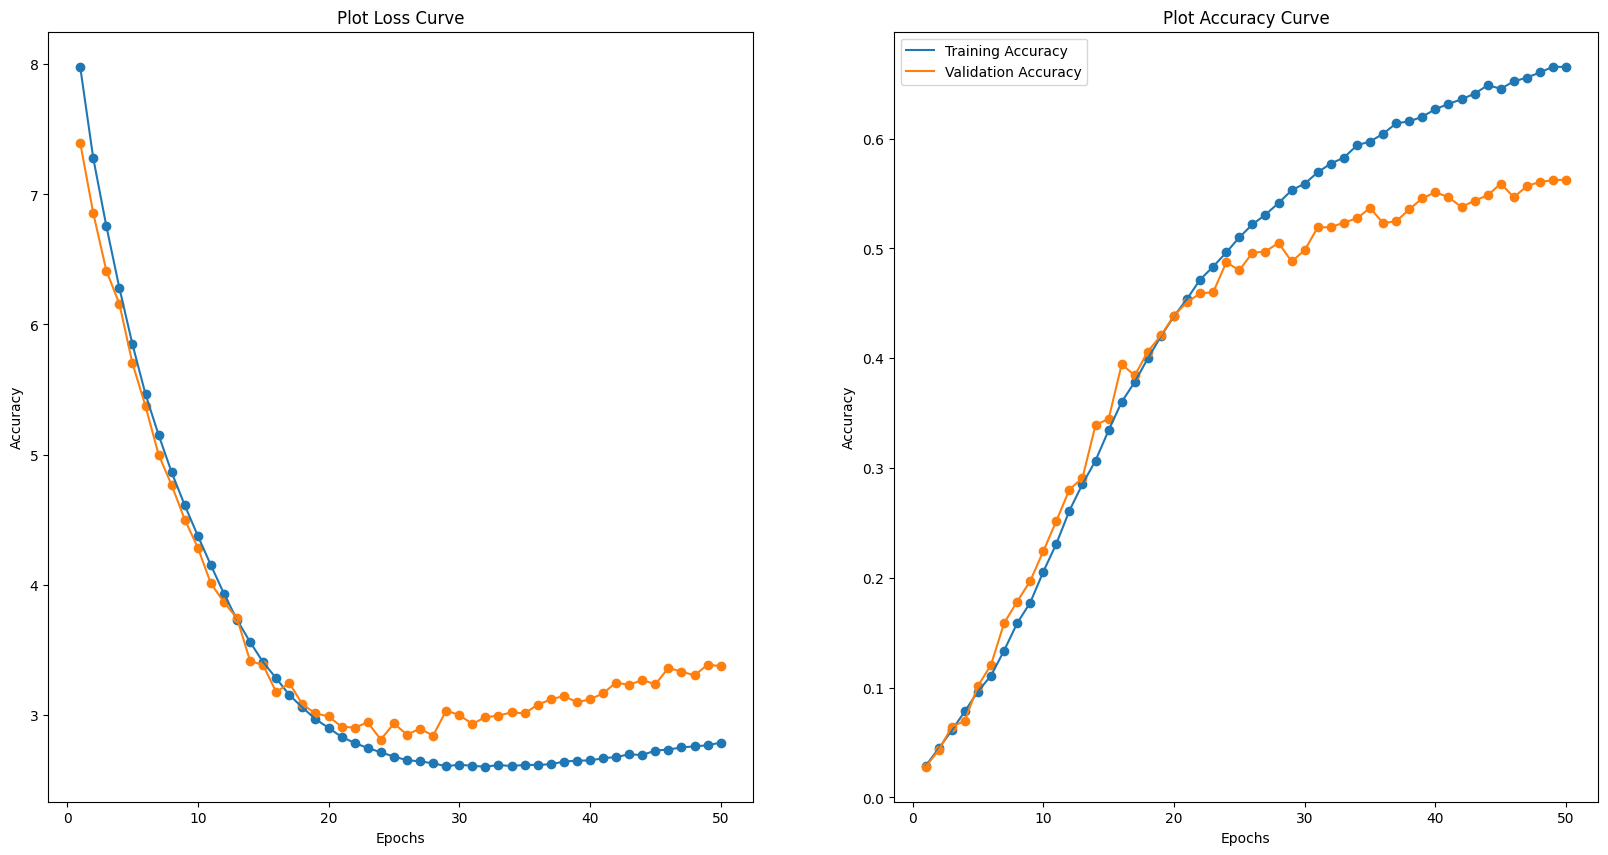

In [ ]:
print(storeResult(customVGG16ModelHistory))
plot_loss_curve(customVGG16ModelHistory)
plt.show()

<u><b>Observations</b></u>

We can see that after we have added more dropout layers, the model has become more generalised and that the both loss has been reduced significantly compared to the other models previously. This suggest that we should add more layers and increase the dropout to make model more generalise and prevent overfitting at the same time.

##### CustomVGG-16 model with Data Augmentation

In [ ]:
tf.keras.backend.clear_session()
weight_decay = 0.0005
inputs = Input(IMG_SIZE)  # Input
x = pre_processing_v1(inputs)
x = vgg_block_16(2, 64,dropout=[0.3])(x)
x = vgg_block_16(2, 128,dropout=[0.4])(x)
x = vgg_block_16(3, 256,dropout=[0.4,0.4])(x)
x = vgg_block_16(3, 512,dropout=[0.4,0.4])(x)
x = vgg_block_16(3, 512, dropout=[0.4, 0.4])(x)
x = Dropout(0.5)(x)
x = GlobalAveragePooling2D()(x)
x = Dense(512, 'relu',kernel_regularizer=l2(weight_decay))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(NUM_CLASS, 'softmax')(x)
customVGG16AugModel = Model(inputs=inputs, outputs=x, name="CustomVGG16Aug")
customVGG16AugModel.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                       loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
customVGG16AugModelHistory = customVGG16AugModel.fit(x_train_aug, y_train, epochs=50,
                                               validation_data=(x_val, y_val), batch_size=BATCH_SIZE, callbacks=EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True))


Epoch 1/50
625/625 [==============================] - 44s 64ms/step - loss: 8.0697 - accuracy: 0.0257 - val_loss: 7.4062 - val_accuracy: 0.0252
Epoch 2/50
625/625 [==============================] - 39s 62ms/step - loss: 7.3149 - accuracy: 0.0454 - val_loss: 7.7932 - val_accuracy: 0.0211
Epoch 3/50
625/625 [==============================] - ETA: 0s - loss: 6.7744 - accuracy: 0.0608

C:\Users\Soh Hong Yu\AppData\Local\Temp\ipykernel_35012\3161967465.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allResults = allResults.append(result, ignore_index=True)


{'Model Name': 'CustomVGG16Aug', 'Epochs': 50, 'Batch Size': 64, 'Train Loss': 2.7893857955932617, 'Val Loss': 3.2992160320281982, 'Train Acc': 0.6434999704360962, 'Val Acc': 0.5587999820709229, '[Train - Val] Acc': 0.08469998836517334}


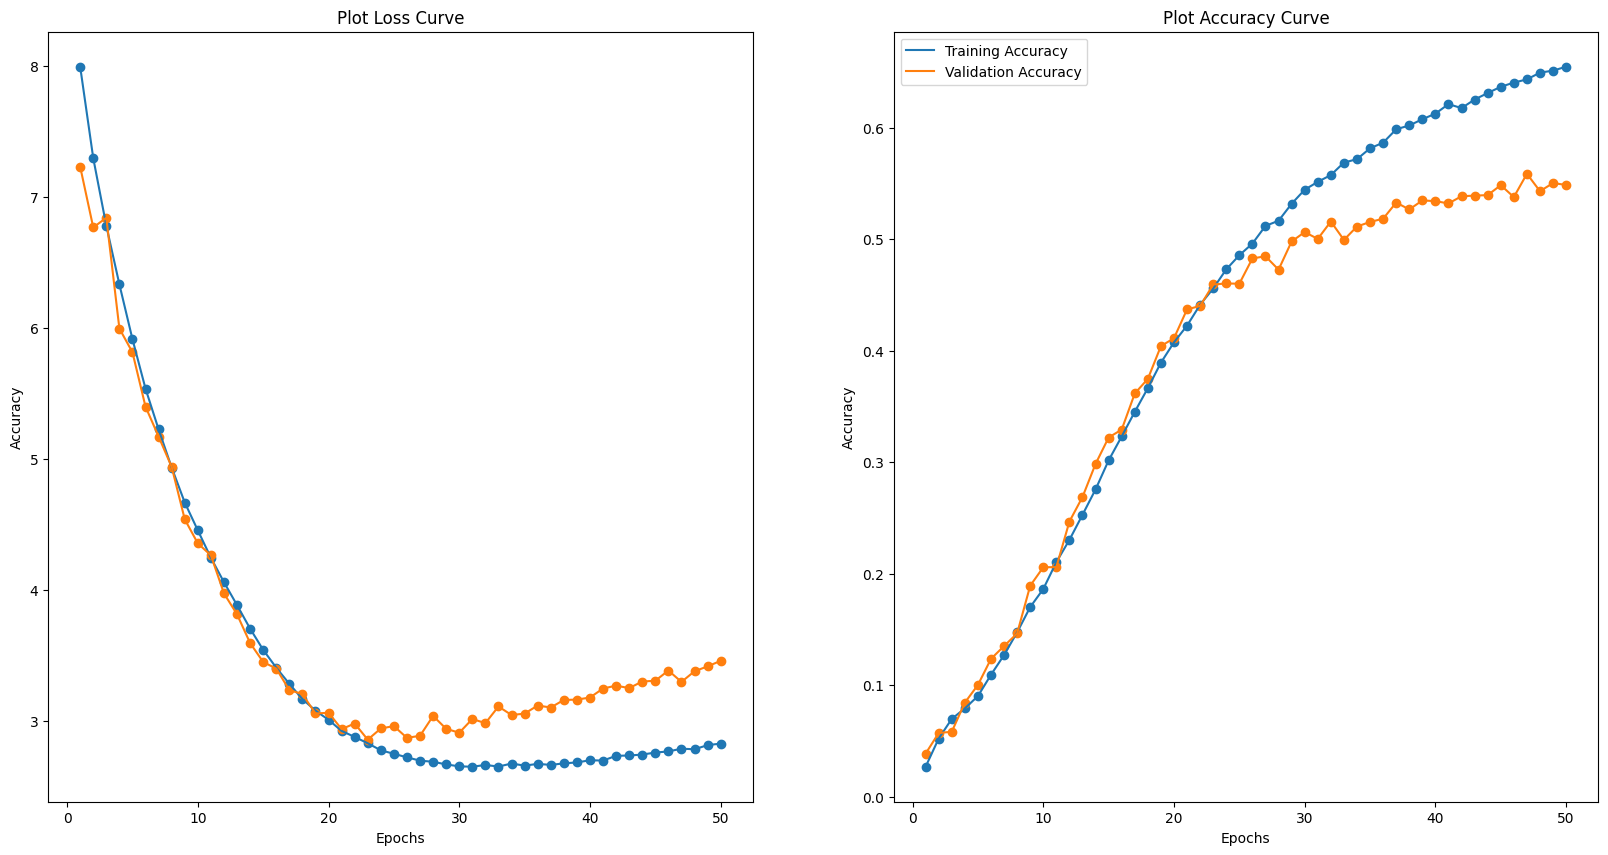

In [ ]:
print(storeResult(customVGG16AugModelHistory))
plot_loss_curve(customVGG16AugModelHistory)
plt.show()

<u><b>Observations</b></u>

We can see that the model has been very generalise and performance was better than the model that was not trained with the data augmentation. This means data augmentation for this model is very good. 

##### CustomVGG-16 model with CutMix Augmentation

In [43]:
tf.keras.backend.clear_session()
weight_decay = 0.0005
inputs = Input(IMG_SIZE)  # Input
x = pre_processing_v1(inputs)
x = vgg_block_16(2, 64,dropout=[0.3])(x)
x = vgg_block_16(2, 128,dropout=[0.4])(x)
x = vgg_block_16(3, 256,dropout=[0.4,0.4])(x)
x = vgg_block_16(3, 512,dropout=[0.4,0.4])(x)
x = vgg_block_16(3, 512, dropout=[0.4, 0.4])(x)
x = Dropout(0.5)(x)
x = GlobalAveragePooling2D()(x)
x = Dense(512, 'relu',kernel_regularizer=l2(weight_decay))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(NUM_CLASS, 'softmax')(x)
customVGG16CutMixModel = Model(inputs=inputs, outputs=x, name="CustomVGG16CutMix")
customVGG16CutMixModel.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                       loss='categorical_crossentropy', metrics=['accuracy'])


In [44]:
customVGG16CutMixModelHistory = customVGG16CutMixModel.fit(x_train_cutmix, y_train_cutmix, epochs=50,
                                               validation_data=(x_val, y_val), batch_size=BATCH_SIZE, callbacks=EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True))


Epoch 1/50
1/1 [==============================] - 10s 10s/step - loss: 8.2785 - accuracy: 0.0000e+00 - val_loss: 6.7970 - val_accuracy: 0.0118
Epoch 2/50
1/1 [==============================] - 3s 3s/step - loss: 8.5206 - accuracy: 0.0156 - val_loss: 6.8063 - val_accuracy: 0.0105
Epoch 3/50
1/1 [==============================] - 3s 3s/step - loss: 8.6141 - accuracy: 0.0000e+00 - val_loss: 6.8237 - val_accuracy: 0.0092
Epoch 4/50
1/1 [==============================] - 3s 3s/step - loss: 8.4043 - accuracy: 0.0000e+00 - val_loss: 6.8682 - val_accuracy: 0.0070
Epoch 5/50
1/1 [==============================] - 3s 3s/step - loss: 8.1857 - accuracy: 0.0000e+00 - val_loss: 7.2884 - val_accuracy: 0.0103
Epoch 6/50
1/1 [==============================] - 3s 3s/step - loss: 8.4571 - accuracy: 0.0156 - val_loss: 10.8335 - val_accuracy: 0.0109
Epoch 7/50
1/1 [==============================] - 4s 4s/step - loss: 8.4896 - accuracy: 0.0000e+00 - val_loss: 26.0565 - val_accuracy: 0.0109
Epoch 8/50
1/1 [=

C:\Users\Soh Hong Yu\AppData\Local\Temp\ipykernel_30216\3161967465.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allResults = allResults.append(result, ignore_index=True)


{'Model Name': 'CustomVGG16CutMix', 'Epochs': 50, 'Batch Size': 64, 'Train Loss': 3.1413795948028564, 'Val Loss': 2.9746015071868896, 'Train Acc': 0.5979750156402588, 'Val Acc': 0.5231999754905701, '[Train - Val] Acc': 0.07477504014968872}


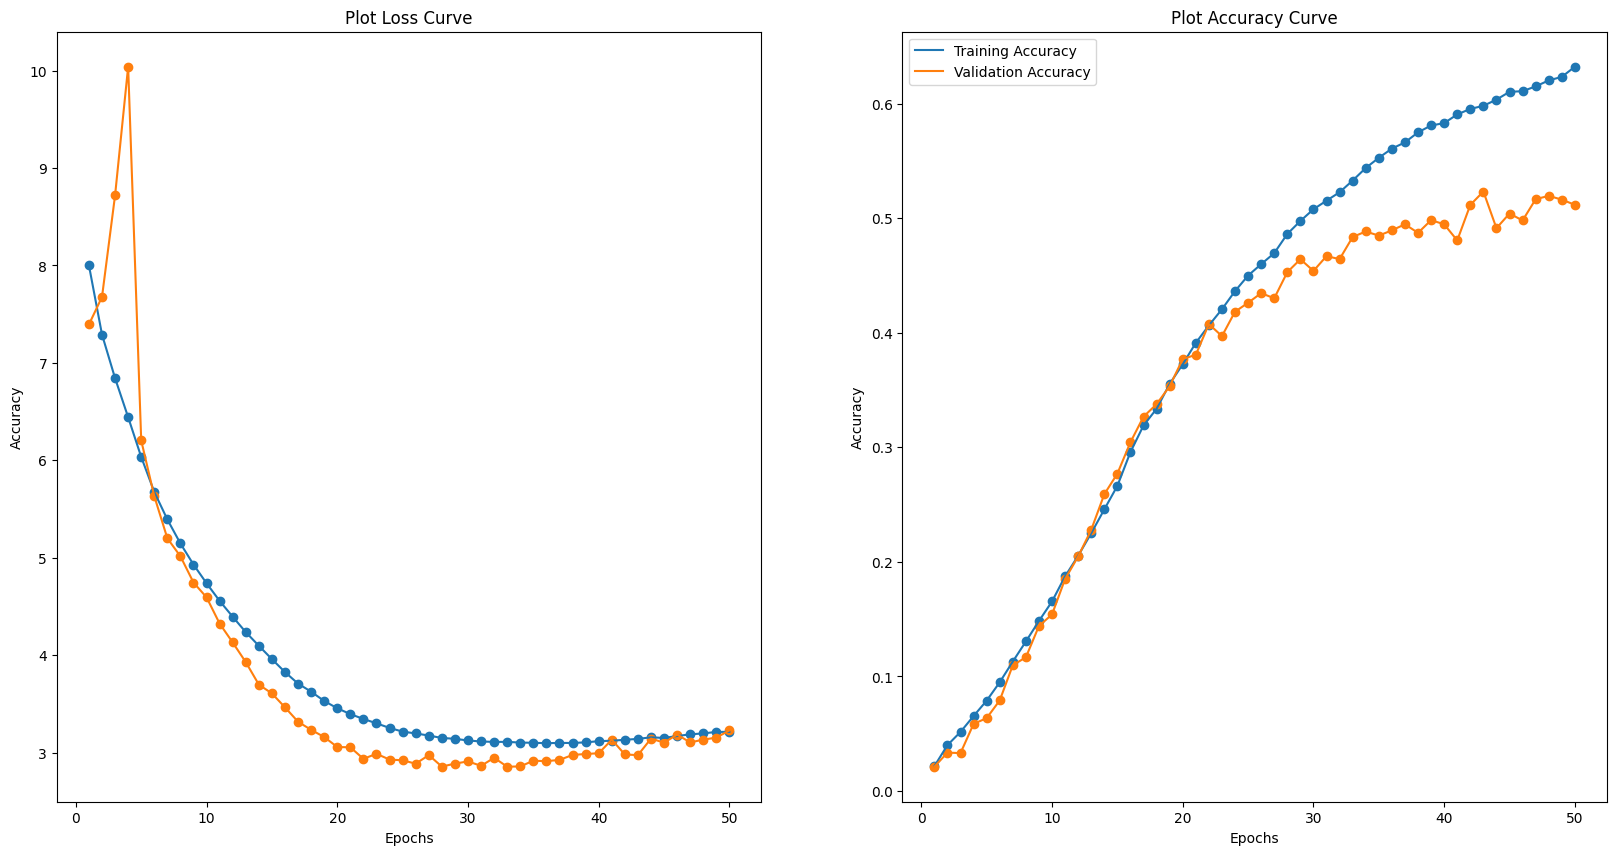

In [ ]:
print(storeResult(customVGG16CutMixModelHistory))
plot_loss_curve(customVGG16CutMixModelHistory)
plt.show()

<u><b>Observations</b></u>

Comparing the customVGG-16 model that was not train with cutmix and was more generalised and the one trained on cutmix was more generalise to the validation set but has a lower accuracy. This suggest the model was slightly underfitted and this caused the accuracy to decrease.

### CustomResNet Model
ResNets are called Residual Networks. ResNet is a special type of convolutional neural network (CNN). It was first introduced in 2015 by Kaiming He, Xiangyu Zhang, Shaoqing Ren, and Jian Sun in their paper – "Deep Residual Learning for Image Recognition".

A ResNet model can be called an upgraded version of the VGG architecture with some differences. The ResNet model will skip connections. The following image shows the difference between the ResNet and VGG model as well as a basic conv2D neural network.

<img src="https://cdn-images-1.medium.com/max/1600/1*rOFPhrpfwguotGdB1-BseA.png" style="width: 25%">

As we can see from the diagram, we can see that the ResNet model has skip connections and it jumps the gun between it's layers. So what is the purpose? There are issues with classic neural networks called the vanishing gradient problem. With more layers being added to a neural network, the performance starts dropping due to the aforementioned vanishing gradient problem. To solve this issue, skipping connections [skipping layers] allows us to avoid the vanishing gradient problem.<br>
<img src="https://cdn-images-1.medium.com/max/1600/1*SGrc3VC3fbirosDPW0AmMA.png" style="width: 50%;">


As we can see from the image above, there are 2 types of skip connections, an Identity block [left side] and a Bottleneck / Convolutional block [right side]. The difference is that the Identity block directly adds the residue to the output whereas, the Convolutional block performs a convolution followed by Batch Normalisation on the residue before adding it to the output.

As there are many iterations of the ResNet model, and we found out the main features of ResNet network. We will be coding a small custom ResNet-10 [Number represents number of layers not inclusive of the convolutional blocks [Skip Connection Conv2D]] model based on [https://d2l.ai/chapter_convolutional-modern/resnet.html]


In [45]:
def identity_block(x, filter, weight_decay=0.005):
    x_skip = x
    x = Conv2D(filter, (3, 3), padding='same',
               kernel_regularizer=l2(weight_decay))(x)
    x = BatchNormalization(axis=3)(x)
    x = Activation('relu')(x)
    x = Conv2D(filter, (3, 3), padding='same',
               kernel_regularizer=l2(weight_decay))(x)
    x = BatchNormalization(axis=3)(x)
    x = Add()([x, x_skip])
    x = Activation('relu')(x)
    return x


In [46]:
def convolutional_block(x, filter, weight_decay=0.005):
    x_skip = x
    x = Conv2D(filter, (3, 3), padding='same', strides=(
        2, 2), kernel_regularizer=l2(weight_decay))(x)
    x = BatchNormalization(axis=3)(x)
    x = Activation('relu')(x)
    x = Conv2D(filter, (3, 3), padding='same')(x)
    x = BatchNormalization(axis=3)(x)
    x_skip = Conv2D(filter, (1, 1), strides=(2, 2),
                    kernel_regularizer=l2(weight_decay))(x_skip)
    x = Add()([x, x_skip])
    x = Activation('relu')(x)
    return x


##### Training CustomResNet model without Data Augmentation

In [ ]:
tf.keras.backend.clear_session()
inputs = Input(IMG_SIZE)  # Input
weight_decay=0.005
x = pre_processing_v1(inputs)
x = ZeroPadding2D((3, 3))(x)
x = Conv2D(64, kernel_size=7, strides=2, padding='same', kernel_regularizer=l2(weight_decay))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)
block_layers = [1, 1, 1, 1]
filter_size = 64
for i in range(4):
    if i == 0:
        # For sub-block 1 Residual/Convolutional block not needed
        for j in range(block_layers[i]):
            x = identity_block(x, filter_size)
    else:
        # One Residual/Convolutional Block followed by Identity blocks
        # The filter size will go on increasing by a factor of 2
        filter_size = filter_size*2
        x = convolutional_block(x, filter_size)
        for j in range(block_layers[i] - 1):
            x = identity_block(x, filter_size)
x = AveragePooling2D((2, 2), padding='same')(x)
x = Flatten()(x)
x = Dense(NUM_CLASS, 'softmax')(x)
customResNetModel = Model(inputs=inputs, outputs=x, name="CustomResNet")
customResNetModel.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                          loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
customResNetModelHistory = customResNetModel.fit(x_train, y_train, epochs=50,
                                               validation_data=(x_val, y_val), batch_size=BATCH_SIZE, callbacks=EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True))


Epoch 1/50
625/625 [==============================] - 23s 32ms/step - loss: 7.4661 - accuracy: 0.1772 - val_loss: 5.4840 - val_accuracy: 0.2066
Epoch 2/50
625/625 [==============================] - 18s 28ms/step - loss: 4.2588 - accuracy: 0.2898 - val_loss: 3.8644 - val_accuracy: 0.2764
Epoch 3/50
625/625 [==============================] - 19s 31ms/step - loss: 3.3108 - accuracy: 0.3472 - val_loss: 3.4037 - val_accuracy: 0.3138
Epoch 4/50
625/625 [==============================] - 18s 28ms/step - loss: 2.9659 - accuracy: 0.3959 - val_loss: 3.2623 - val_accuracy: 0.3254
Epoch 5/50
625/625 [==============================] - 18s 29ms/step - loss: 2.8265 - accuracy: 0.4251 - val_loss: 3.4327 - val_accuracy: 0.3185
Epoch 6/50
625/625 [==============================] - 18s 28ms/step - loss: 2.7353 - accuracy: 0.4550 - val_loss: 3.4837 - val_accuracy: 0.3222
Epoch 7/50
625/625 [==============================] - 18s 30ms/step - loss: 2.6745 - accuracy: 0.4754 - val_loss: 3.2010 - val_accuracy:

C:\Users\Soh Hong Yu\AppData\Local\Temp\ipykernel_35012\3161967465.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allResults = allResults.append(result, ignore_index=True)


{'Model Name': 'CustomResNet', 'Epochs': 17, 'Batch Size': 64, 'Train Loss': 2.674546718597412, 'Val Loss': 3.201004981994629, 'Train Acc': 0.47540000081062317, 'Val Acc': 0.38019999861717224, '[Train - Val] Acc': 0.09520000219345093}


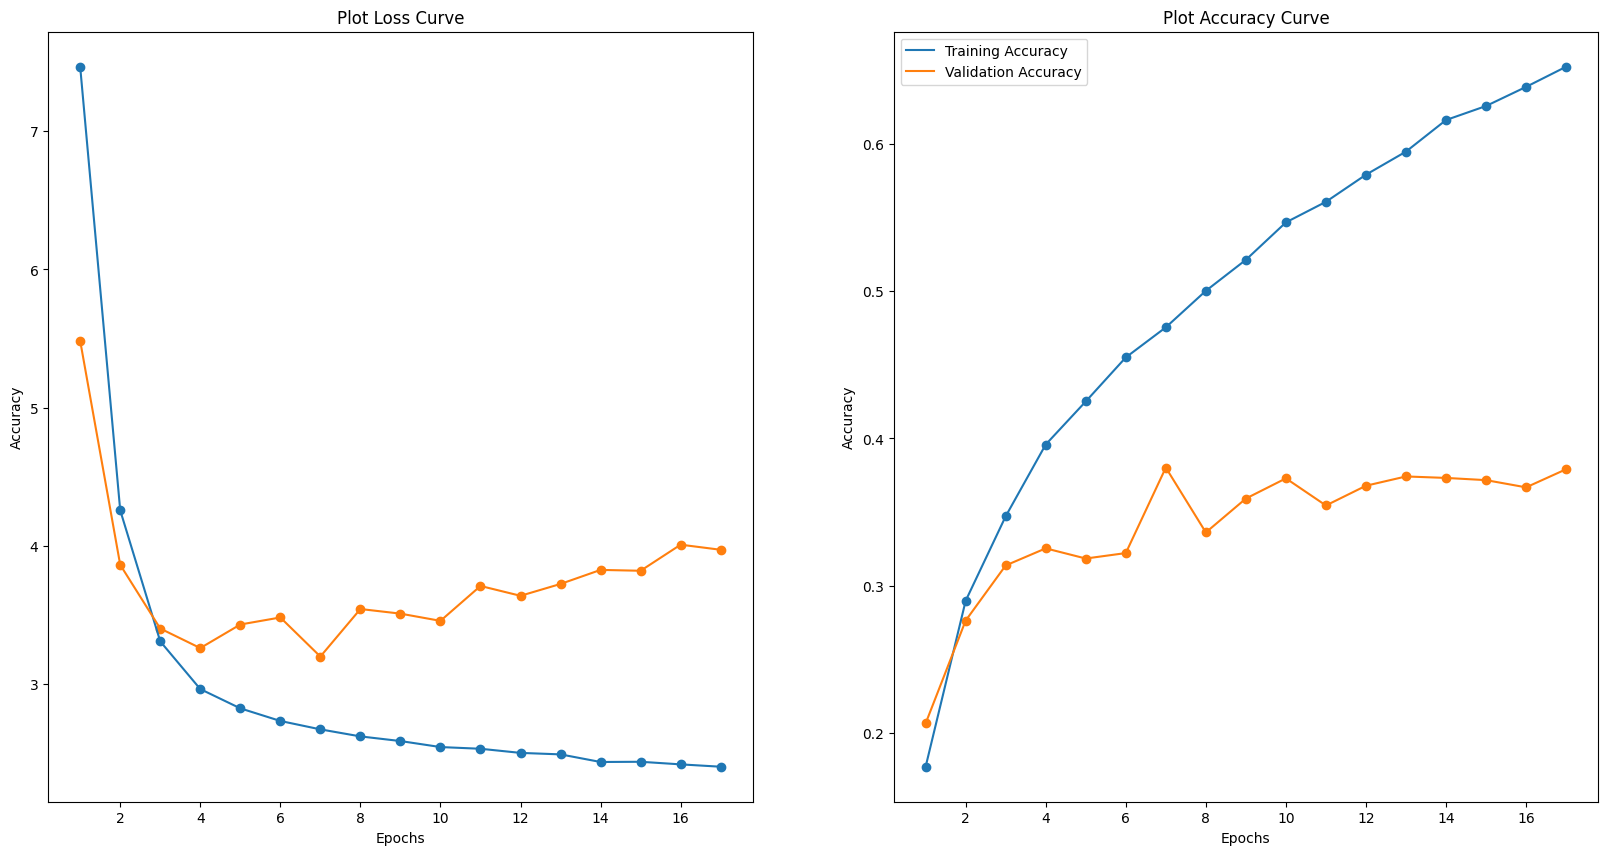

In [ ]:
print(storeResult(customResNetModelHistory))
plot_loss_curve(customResNetModelHistory)
plt.show()


<u><b>Observations</b></u>

Comparing the customResNet model to the baseline model, we can see that both train and validation accuracy increased. Train loss is decreased as well which means that the model is generalise to the training data. However, more tuning will be need to change and modify to reduce the loss. 

##### Training CustomResNet model with Data Augmentation

In [ ]:
tf.keras.backend.clear_session()
inputs = Input(IMG_SIZE)  # Input
weight_decay=0.005
x = pre_processing_v1(inputs)
x = ZeroPadding2D((3, 3))(x)
x = Conv2D(64, kernel_size=7, strides=2, padding='same', kernel_regularizer=l2(weight_decay))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)
block_layers = [1, 1, 1, 1]
filter_size = 64
for i in range(4):
    if i == 0:
        # For sub-block 1 Residual/Convolutional block not needed
        for j in range(block_layers[i]):
            x = identity_block(x, filter_size)
    else:
        # One Residual/Convolutional Block followed by Identity blocks
        # The filter size will go on increasing by a factor of 2
        filter_size = filter_size*2
        x = convolutional_block(x, filter_size)
        for j in range(block_layers[i] - 1):
            x = identity_block(x, filter_size)
x = AveragePooling2D((2, 2), padding='same')(x)
x = Flatten()(x)
x = Dense(NUM_CLASS, 'softmax')(x)
customResNetAugModel = Model(inputs=inputs, outputs=x, name="CustomResNetAug")
customResNetAugModel.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                          loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
customResNetAugModelHistory = customResNetAugModel.fit(x_train_aug, y_train, epochs=50,
                                               validation_data=(x_val, y_val), batch_size=BATCH_SIZE, callbacks=EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True))


Epoch 1/50
625/625 [==============================] - 20s 28ms/step - loss: 7.5562 - accuracy: 0.1541 - val_loss: 5.5738 - val_accuracy: 0.1859
Epoch 2/50
625/625 [==============================] - 17s 28ms/step - loss: 4.3617 - accuracy: 0.2613 - val_loss: 4.1984 - val_accuracy: 0.2280
Epoch 3/50
625/625 [==============================] - 18s 29ms/step - loss: 3.4240 - accuracy: 0.3198 - val_loss: 3.6390 - val_accuracy: 0.2634
Epoch 4/50
625/625 [==============================] - 17s 28ms/step - loss: 3.0797 - accuracy: 0.3605 - val_loss: 3.4258 - val_accuracy: 0.2982
Epoch 5/50
625/625 [==============================] - 18s 29ms/step - loss: 2.9377 - accuracy: 0.3914 - val_loss: 3.4849 - val_accuracy: 0.3067
Epoch 6/50
625/625 [==============================] - 18s 28ms/step - loss: 2.8456 - accuracy: 0.4189 - val_loss: 3.2379 - val_accuracy: 0.3556
Epoch 7/50
625/625 [==============================] - 18s 28ms/step - loss: 2.7945 - accuracy: 0.4425 - val_loss: 3.4696 - val_accuracy:

C:\Users\Soh Hong Yu\AppData\Local\Temp\ipykernel_15772\3161967465.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allResults = allResults.append(result, ignore_index=True)


{'Model Name': 'CustomResNetAug', 'Epochs': 30, 'Batch Size': 64, 'Train Loss': 2.4555885791778564, 'Val Loss': 4.1176228523254395, 'Train Acc': 0.6650000214576721, 'Val Acc': 0.3804999887943268, '[Train - Val] Acc': 0.28450003266334534}


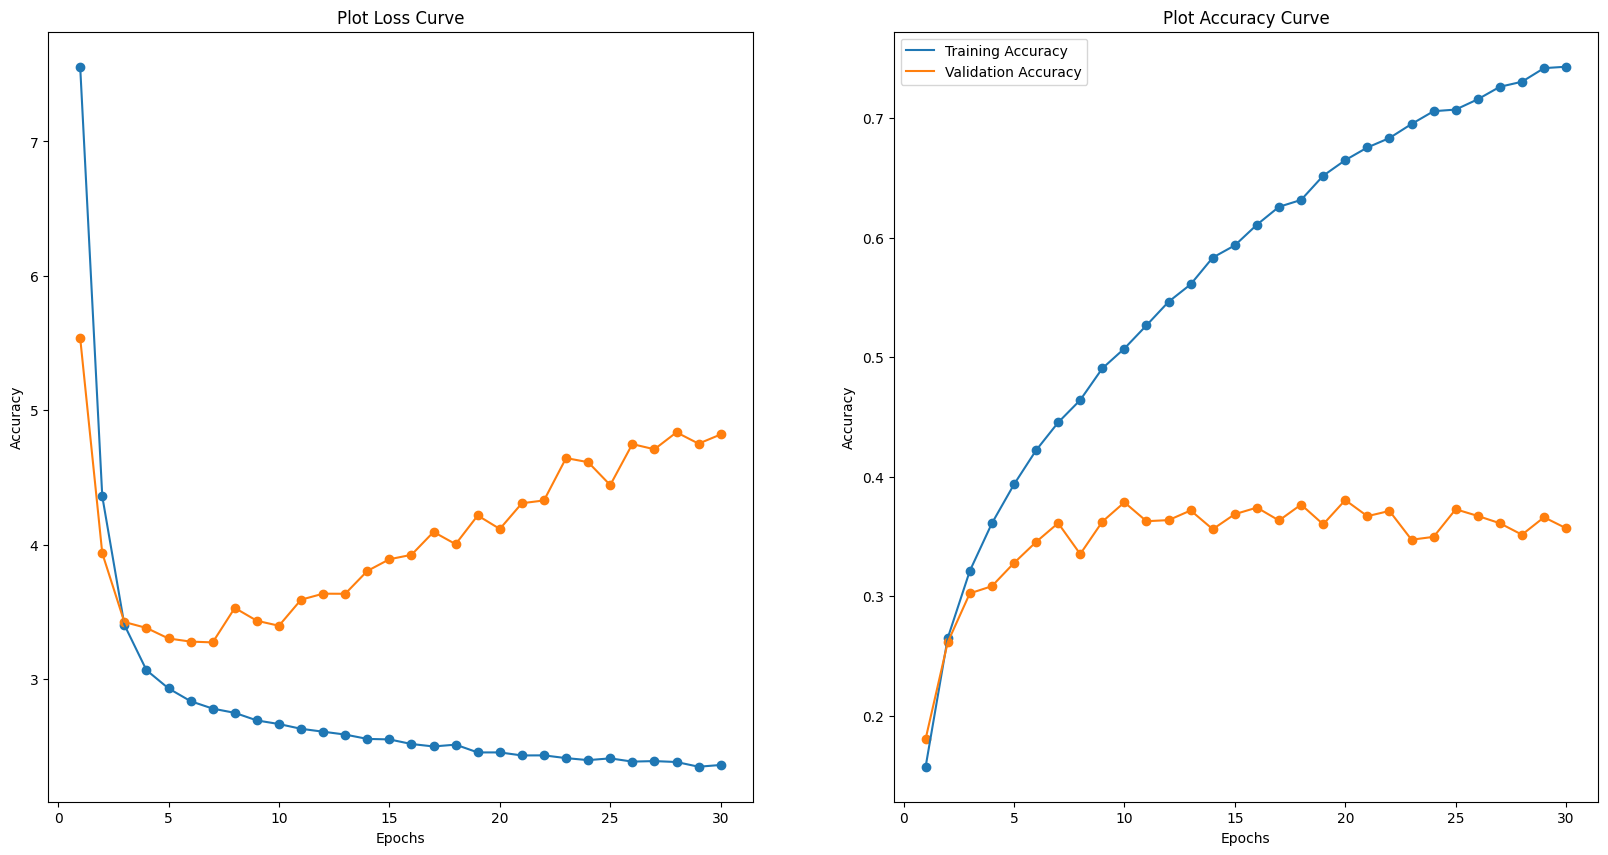

In [ ]:
print(storeResult(customResNetAugModelHistory))
plot_loss_curve(customResNetAugModelHistory)
plt.show()


<u><b>Observations</b></u>

By comparing the ResNet with Augmentation to ResNet without Augmentation, we can see that the validation accuracy plateau more and become more generalised. The validation accuracy and training accuracy also increase as well this suggest that augmentation improved the model.

##### Training CustomResNet model with CutMix Augmentation

In [47]:
tf.keras.backend.clear_session()
inputs = Input(IMG_SIZE)  # Input
weight_decay=0.005
x = pre_processing_v1(inputs)
x = ZeroPadding2D((3, 3))(x)
x = Conv2D(64, kernel_size=7, strides=2, padding='same', kernel_regularizer=l2(weight_decay))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)
block_layers = [1, 1, 1, 1]
filter_size = 64
for i in range(4):
    if i == 0:
        # For sub-block 1 Residual/Convolutional block not needed
        for j in range(block_layers[i]):
            x = identity_block(x, filter_size)
    else:
        # One Residual/Convolutional Block followed by Identity blocks
        # The filter size will go on increasing by a factor of 2
        filter_size = filter_size*2
        x = convolutional_block(x, filter_size)
        for j in range(block_layers[i] - 1):
            x = identity_block(x, filter_size)
x = AveragePooling2D((2, 2), padding='same')(x)
x = Flatten()(x)
x = Dense(NUM_CLASS, 'softmax')(x)
customResNetCutMixModel = Model(inputs=inputs, outputs=x, name="CustomResNetCutMix")
customResNetCutMixModel.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                          loss='categorical_crossentropy', metrics=['accuracy'])


In [48]:
customResNetCutMixModelHistory = customResNetCutMixModel.fit(x_train_cutmix, y_train_cutmix, epochs=50,
                                               validation_data=(x_val, y_val), batch_size=BATCH_SIZE, callbacks=EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True))


Epoch 1/50
625/625 [==============================] - 20s 27ms/step - loss: 8.0739 - accuracy: 0.1102 - val_loss: 5.6092 - val_accuracy: 0.1736
Epoch 2/50
625/625 [==============================] - 18s 29ms/step - loss: 5.1185 - accuracy: 0.1909 - val_loss: 4.0249 - val_accuracy: 0.2249
Epoch 3/50
625/625 [==============================] - 17s 27ms/step - loss: 4.2625 - accuracy: 0.2316 - val_loss: 3.5506 - val_accuracy: 0.2504
Epoch 4/50
625/625 [==============================] - 17s 27ms/step - loss: 3.9826 - accuracy: 0.2673 - val_loss: 3.3675 - val_accuracy: 0.2708
Epoch 5/50
625/625 [==============================] - 16s 26ms/step - loss: 3.8712 - accuracy: 0.2919 - val_loss: 3.4064 - val_accuracy: 0.2717
Epoch 6/50
625/625 [==============================] - 17s 26ms/step - loss: 3.8065 - accuracy: 0.3159 - val_loss: 3.2979 - val_accuracy: 0.3035
Epoch 7/50
625/625 [==============================] - 16s 26ms/step - loss: 3.7575 - accuracy: 0.3378 - val_loss: 3.3912 - val_accuracy:

C:\Users\Soh Hong Yu\AppData\Local\Temp\ipykernel_10728\3161967465.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allResults = allResults.append(result, ignore_index=True)


{'Model Name': 'CustomResNetCutMix', 'Epochs': 18, 'Batch Size': 64, 'Train Loss': 3.7268757820129395, 'Val Loss': 3.2672340869903564, 'Train Acc': 0.35534998774528503, 'Val Acc': 0.32510000467300415, '[Train - Val] Acc': 0.030249983072280884}


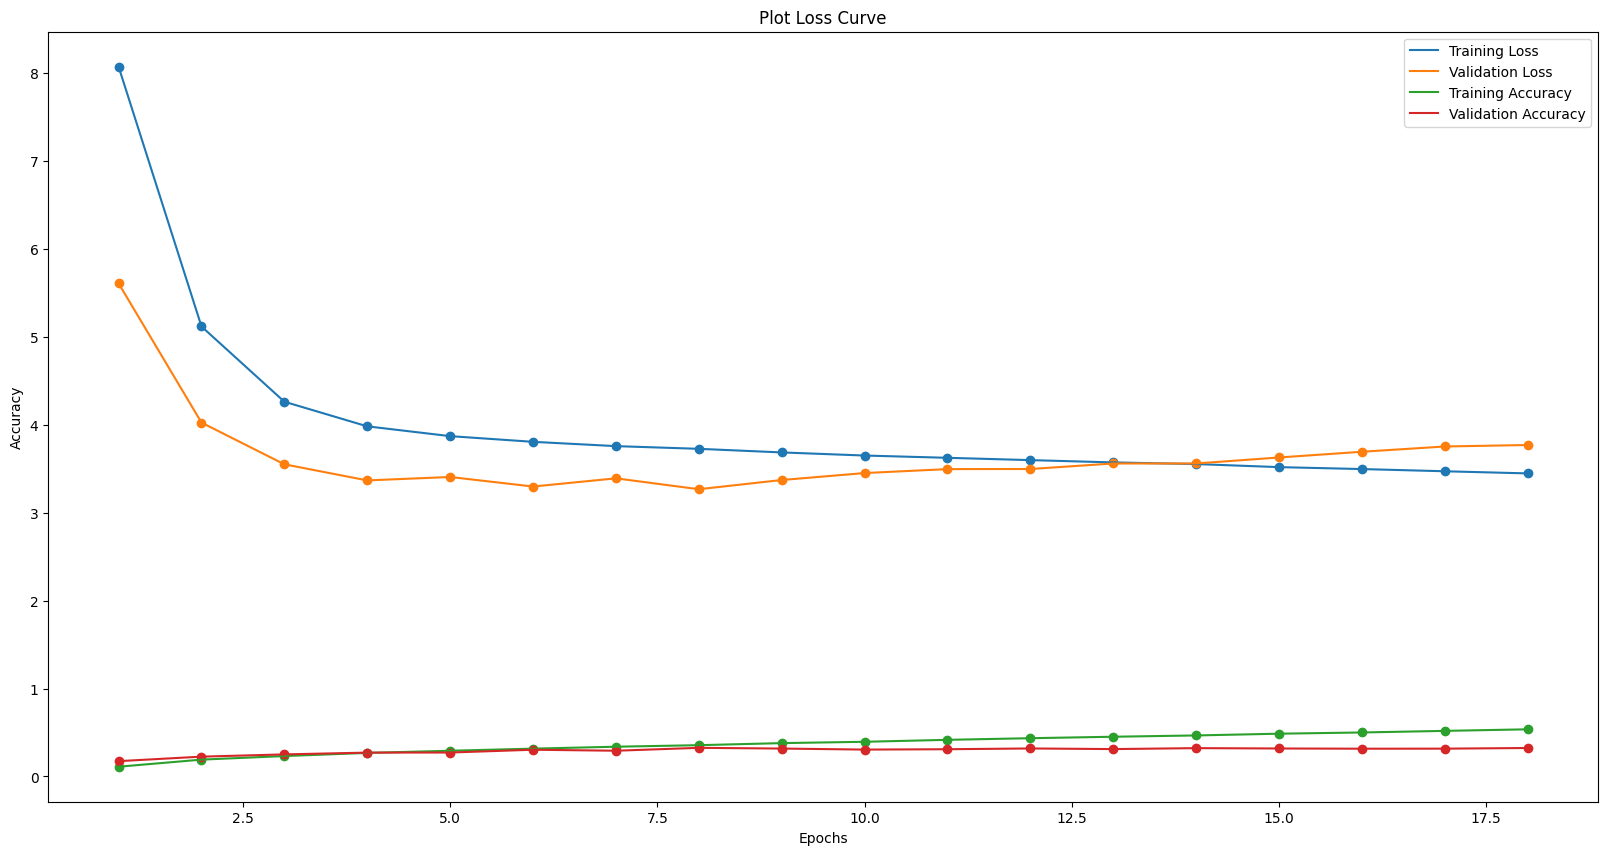

In [49]:
print(storeResult(customResNetCutMixModelHistory))
plot_loss_curve(customResNetCutMixModelHistory)
plt.show()


<u><b>Observations</b></u>

We can see that by applying the cutmix algorithm, the model becomes more generalise as the accuracy are very similar. However, although the model is generalise the accuracy is very low which means some changes needs to be done to make it better

##### CustomResNet model with Dropout Layers

To help reduce the overfitting and reduce the loss of the model, we will be using dropout layers. Dropout layers will randomly sets input units to 0 during the training period. This is means that weights and biases that might affect the model and cause the model to overfit might be ignore (disconnected)

In [ ]:
tf.keras.backend.clear_session()
inputs = Input(IMG_SIZE)  # Input
weight_decay = 0.005
x = pre_processing_v1(inputs)
x = ZeroPadding2D((3, 3))(x)
x = Conv2D(64, kernel_size=7, strides=2, padding='same',
           kernel_regularizer=l2(weight_decay))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)
block_layers = [3, 4, 6, 3]
filter_size = 64
for i in range(4):
    if i == 0:
        # For sub-block 1 Residual/Convolutional block not needed
        for j in range(block_layers[i]):
            x = identity_block(x, filter_size)
    else:
        # One Residual/Convolutional Block followed by Identity blocks
        # The filter size will go on increasing by a factor of 2
        filter_size = filter_size*2
        x = convolutional_block(x, filter_size)
        for j in range(block_layers[i] - 1):
            x = identity_block(x, filter_size)
    x = Dropout(0.3)(x)
x = AveragePooling2D((2, 2), padding='same')(x)
x = Flatten()(x)
x = Dense(NUM_CLASS, 'softmax')(x)
customResNetDropModel = Model(
    inputs=inputs, outputs=x, name="CustomResNetDropV2")
customResNetDropModel.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                                loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
customResNetDropModel.summary()

Model: "CustomResNetDropV2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 normalization (Normalization)  (None, 32, 32, 3)    7           ['input_1[0][0]']                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 38, 38, 3)   0           ['normalization[17][0]']         
                                                                                                  
 conv2d (Conv2D)                (None, 19, 19, 64)   9472        ['zero_padding2d[0][0]']         
                                                                                 

In [ ]:
customResNetDropModelHistory = customResNetDropModel.fit(x_train, y_train, epochs=50,
                                               validation_data=(x_val, y_val), batch_size=BATCH_SIZE, callbacks=EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True))


Epoch 1/50
625/625 [==============================] - 66s 94ms/step - loss: 24.9811 - accuracy: 0.0373 - val_loss: 14.7620 - val_accuracy: 0.0421
Epoch 2/50
625/625 [==============================] - 57s 92ms/step - loss: 9.8900 - accuracy: 0.0939 - val_loss: 6.9625 - val_accuracy: 0.1013
Epoch 3/50
625/625 [==============================] - 57s 91ms/step - loss: 5.5795 - accuracy: 0.1380 - val_loss: 4.6622 - val_accuracy: 0.1595
Epoch 4/50
625/625 [==============================] - 56s 90ms/step - loss: 4.3186 - accuracy: 0.1696 - val_loss: 4.1422 - val_accuracy: 0.1720
Epoch 5/50
625/625 [==============================] - 54s 87ms/step - loss: 3.9090 - accuracy: 0.1928 - val_loss: 4.1753 - val_accuracy: 0.1801
Epoch 6/50
625/625 [==============================] - 53s 85ms/step - loss: 3.7301 - accuracy: 0.2165 - val_loss: 3.9380 - val_accuracy: 0.2124
Epoch 7/50
625/625 [==============================] - 53s 85ms/step - loss: 3.7247 - accuracy: 0.2249 - val_loss: 4.0858 - val_accurac

C:\Users\Soh Hong Yu\AppData\Local\Temp\ipykernel_15772\3161967465.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allResults = allResults.append(result, ignore_index=True)


{'Model Name': 'CustomResNetDropV2', 'Epochs': 33, 'Batch Size': 64, 'Train Loss': 3.31612491607666, 'Val Loss': 3.458369255065918, 'Train Acc': 0.3716000020503998, 'Val Acc': 0.35899999737739563, '[Train - Val] Acc': 0.01260000467300415}


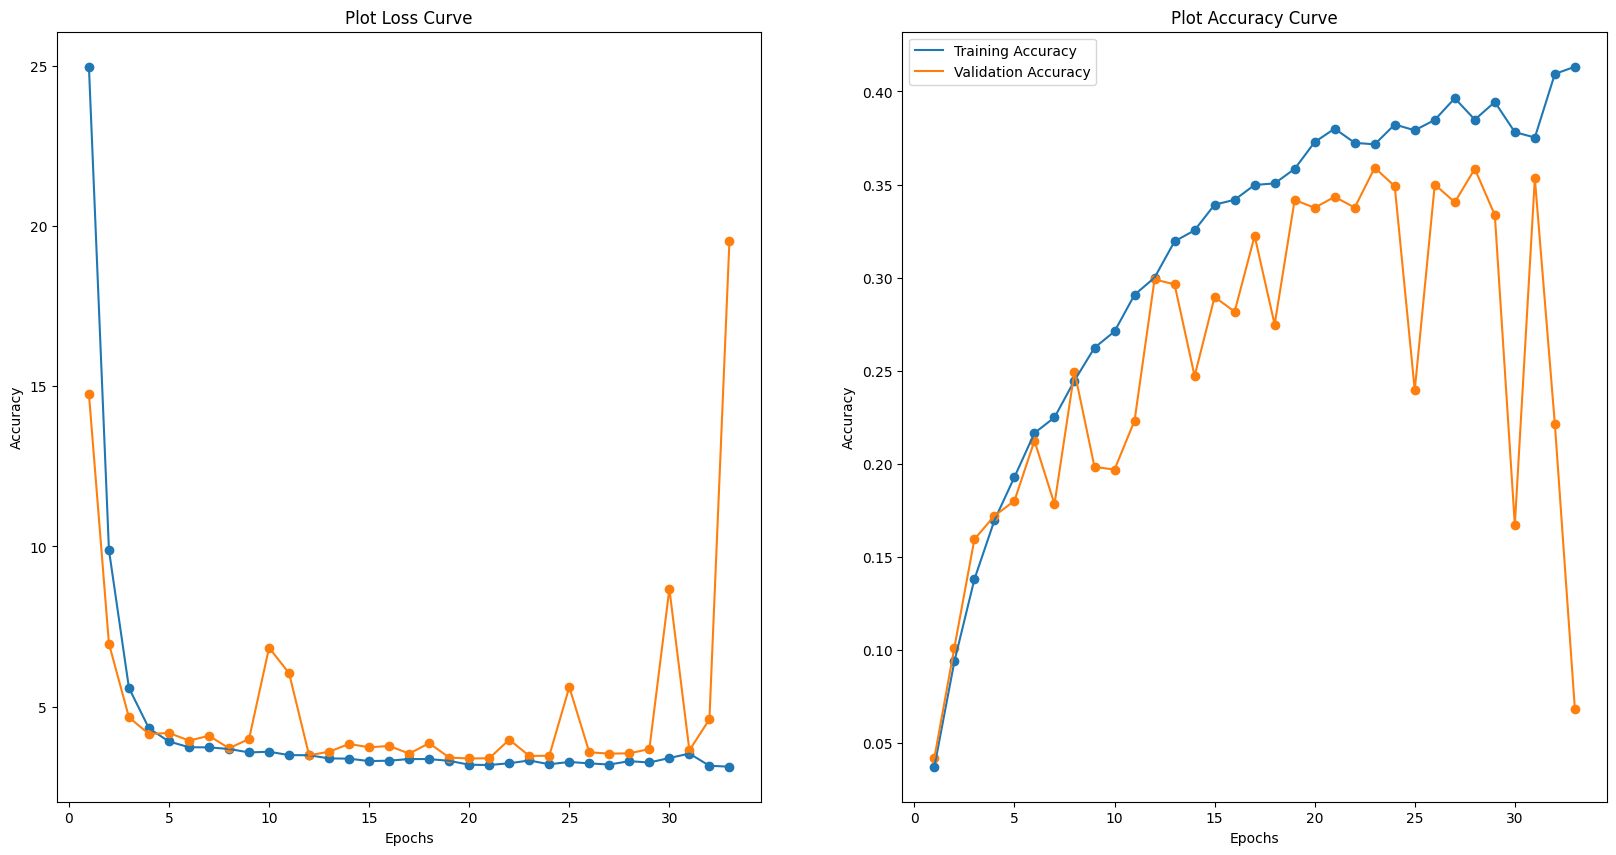

In [ ]:
print(storeResult(customResNetDropModelHistory))
plot_loss_curve(customResNetDropModelHistory)
plt.show()


<u><b>Observations</b></u>

We can see that the model has a worst performance after applying dropout. This is likely because of the ResNet's batch normalization layers. When the two layers are put together, there will be a disharmony created. This is due too Batch Normalization layer having a normalization process which use the batch's mean and standard deviation. But the dropout layer will randomly drop the weights and bias in the network. This causes the model to lose the important weights [After the weights have been normalised] that is essential in the model's performance.

### EfficientNetV2 Model

EfficientNet is a convolutional neural network architecture and scaling method that uniformly scales all dimensions of depth/width/resolution using a compound coefficient. Unlike conventional practice that arbitrary scales these factors, the EfficientNet scaling method uniformly scales network width, depth, and resolution with a set of fixed scaling coefficients. 

However, the EfficientNet model is quite huge and comprehensive, we will be building a smaller scaled down version introduced by Ming Xing Tan called the EfficientNetV2 model.

##### Deep dive into the EfficientNetV2 network

The EfficientNetV2 model uses extensively the MBConv layer and the fused-MBConv layer as shown below. It also uses a smaller kernel size but adds more layers to compensate for the smaller kernel size. 

<img src="https://media.discordapp.net/attachments/910885868733087747/1043757172590399499/image.png">

Here is how the architecture looks like.

<img src="https://media.discordapp.net/attachments/910885868733087747/1043757858086457374/image.png">

For this model, due to the higher complexity, we will be using a pre build model and removing all the weights and biases to train our own model using transfer learning

##### EfficientNetV2B0 model without Data Augmentation


In [66]:
tf.keras.backend.clear_session()
inputs = Input(IMG_SIZE)  # Input
x = pre_processing_v1(inputs)
x = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(
    include_top=False,
    weights='imagenet',
    input_shape=IMG_SIZE,
    pooling="max",
    include_preprocessing=False
)(x)
x = Flatten()(x)
x = Dense(NUM_CLASS, 'softmax')(x)
efficientNetModel = Model(
    inputs=inputs, outputs=x, name="efficientNetV2")
efficientNetModel.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                                loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
efficientNetModel.summary()


Model: "efficientNetV2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 normalization (Normalizatio  (None, 32, 32, 3)        7         
 n)                                                              
                                                                 
 efficientnetv2-b0 (Function  (None, 1280)             5919312   
 al)                                                             
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 100)               128100    
                                                                 
Total params: 6,047,419
Trainable params: 5,986,804


In [67]:
efficientNetModelHistory = efficientNetModel.fit(x_train, y_train, epochs=50,
                                               validation_data=(x_val, y_val), batch_size=BATCH_SIZE, callbacks=EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True))


Epoch 1/50
625/625 [==============================] - 105s 146ms/step - loss: 3.3650 - accuracy: 0.2138 - val_loss: 2.4541 - val_accuracy: 0.3616
Epoch 2/50
625/625 [==============================] - 103s 164ms/step - loss: 2.1879 - accuracy: 0.4212 - val_loss: 1.9901 - val_accuracy: 0.4664
Epoch 3/50
625/625 [==============================] - 130s 207ms/step - loss: 1.7188 - accuracy: 0.5245 - val_loss: 1.8133 - val_accuracy: 0.5092
Epoch 4/50
625/625 [==============================] - 117s 187ms/step - loss: 1.4167 - accuracy: 0.6008 - val_loss: 1.7624 - val_accuracy: 0.5275
Epoch 5/50
625/625 [==============================] - 136s 217ms/step - loss: 1.1900 - accuracy: 0.6519 - val_loss: 1.7420 - val_accuracy: 0.5445
Epoch 6/50
625/625 [==============================] - 129s 206ms/step - loss: 1.0092 - accuracy: 0.7025 - val_loss: 1.7859 - val_accuracy: 0.5463
Epoch 7/50
625/625 [==============================] - 87s 138ms/step - loss: 0.8397 - accuracy: 0.7462 - val_loss: 1.8330 - 

C:\Users\Soh Hong Yu\AppData\Local\Temp\ipykernel_10728\3161967465.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allResults = allResults.append(result, ignore_index=True)


{'Model Name': 'efficientNetV2', 'Epochs': 50, 'Batch Size': 64, 'Train Loss': 0.04178773984313011, 'Val Loss': 2.6202239990234375, 'Train Acc': 0.9876000285148621, 'Val Acc': 0.5781999826431274, '[Train - Val] Acc': 0.4094000458717346}


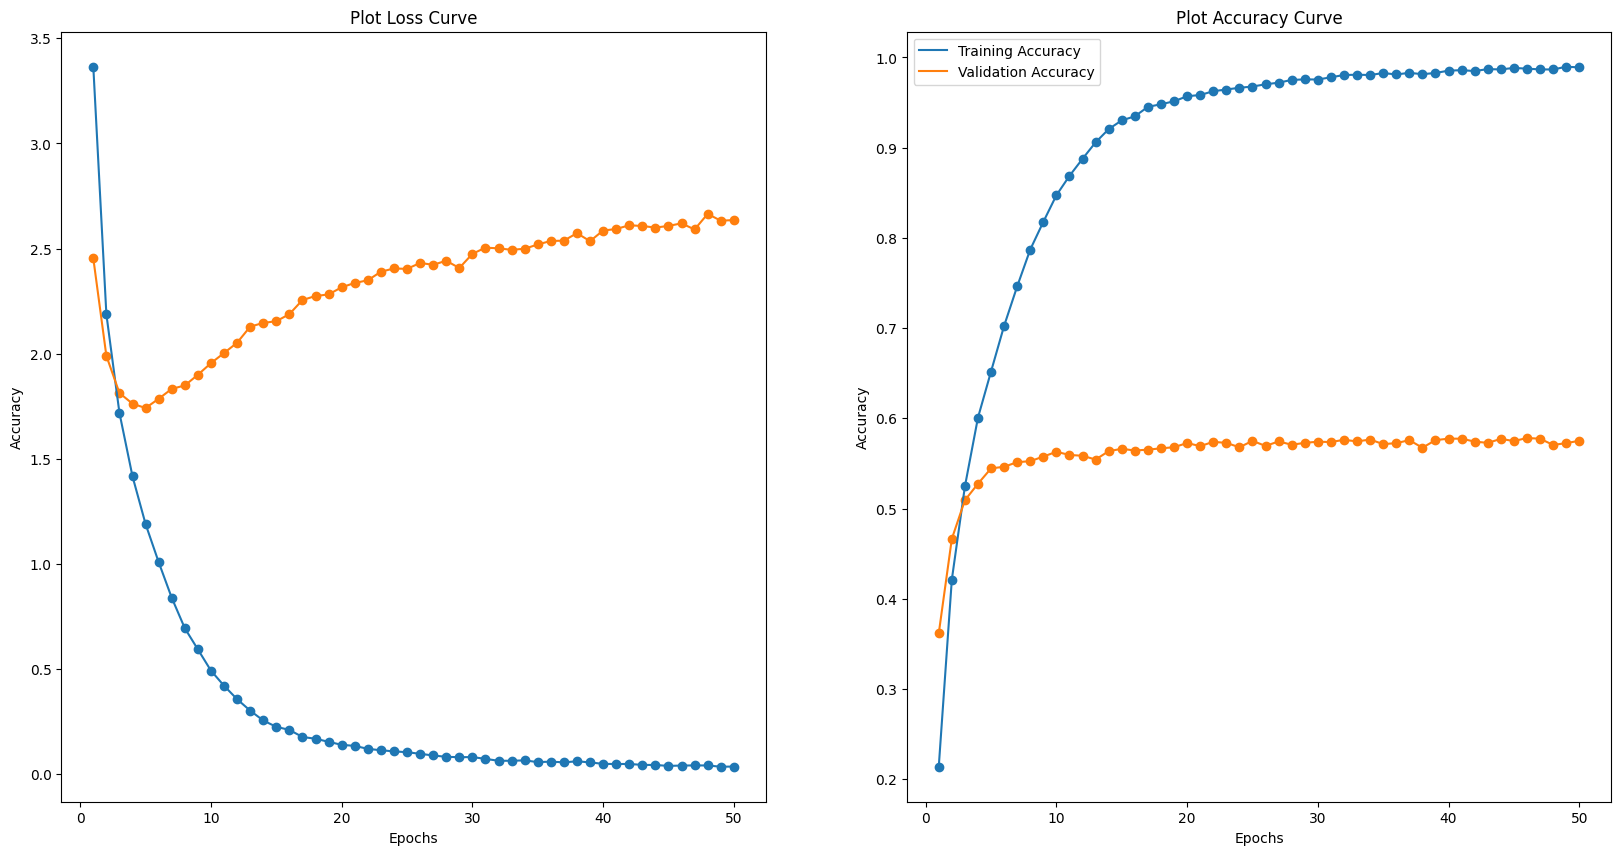

In [68]:
print(storeResult(efficientNetModelHistory))
plot_loss_curve(efficientNetModelHistory)
plt.show()

<u><b>Observation</b></u>

Comparing the EfficientNetV2 Model with the baseline model, we can see that the the model plateau and the model is able to generalise well. The accuracy of both training and validation improved which suggest that efficientNet is a good model.

##### EfficientNetV2B0 model with Data Augmentation


In [51]:
tf.keras.backend.clear_session()
inputs = Input(IMG_SIZE)  # Input
x = pre_processing_v1(inputs)
x = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(
    include_top=False,
    weights='imagenet',
    input_shape=IMG_SIZE,
    pooling="max",
    include_preprocessing=False
)(x)
x = Flatten()(x)
x = Dense(NUM_CLASS, 'softmax')(x)
efficientNetAugModel = Model(
    inputs=inputs, outputs=x, name="efficientNetV2Aug")
efficientNetAugModel.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                                loss='categorical_crossentropy', metrics=['accuracy'])


In [52]:
efficientNetAugModelHistory = efficientNetAugModel.fit(x_train_aug, y_train, epochs=50,
                                               validation_data=(x_val, y_val), batch_size=BATCH_SIZE, callbacks=EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True))


Epoch 1/50
625/625 [==============================] - 88s 116ms/step - loss: 3.4810 - accuracy: 0.1921 - val_loss: 2.5065 - val_accuracy: 0.3564
Epoch 2/50
625/625 [==============================] - 114s 183ms/step - loss: 2.2895 - accuracy: 0.3965 - val_loss: 2.0273 - val_accuracy: 0.4523
Epoch 3/50
625/625 [==============================] - 392s 628ms/step - loss: 1.8082 - accuracy: 0.5042 - val_loss: 1.9098 - val_accuracy: 0.4948
Epoch 4/50
625/625 [==============================] - 495s 787ms/step - loss: 1.5162 - accuracy: 0.5713 - val_loss: 1.7776 - val_accuracy: 0.5269
Epoch 5/50
625/625 [==============================] - 431s 690ms/step - loss: 1.2741 - accuracy: 0.6320 - val_loss: 1.8137 - val_accuracy: 0.5264
Epoch 6/50
625/625 [==============================] - 576s 922ms/step - loss: 1.0835 - accuracy: 0.6798 - val_loss: 1.7929 - val_accuracy: 0.5405
Epoch 7/50
625/625 [==============================] - 514s 824ms/step - loss: 0.9189 - accuracy: 0.7229 - val_loss: 1.8373 - 

C:\Users\Soh Hong Yu\AppData\Local\Temp\ipykernel_10728\3161967465.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allResults = allResults.append(result, ignore_index=True)


{'Model Name': 'efficientNetV2Aug', 'Epochs': 50, 'Batch Size': 64, 'Train Loss': 0.04659847542643547, 'Val Loss': 2.6339080333709717, 'Train Acc': 0.9853000044822693, 'Val Acc': 0.5753999948501587, '[Train - Val] Acc': 0.4099000096321106}


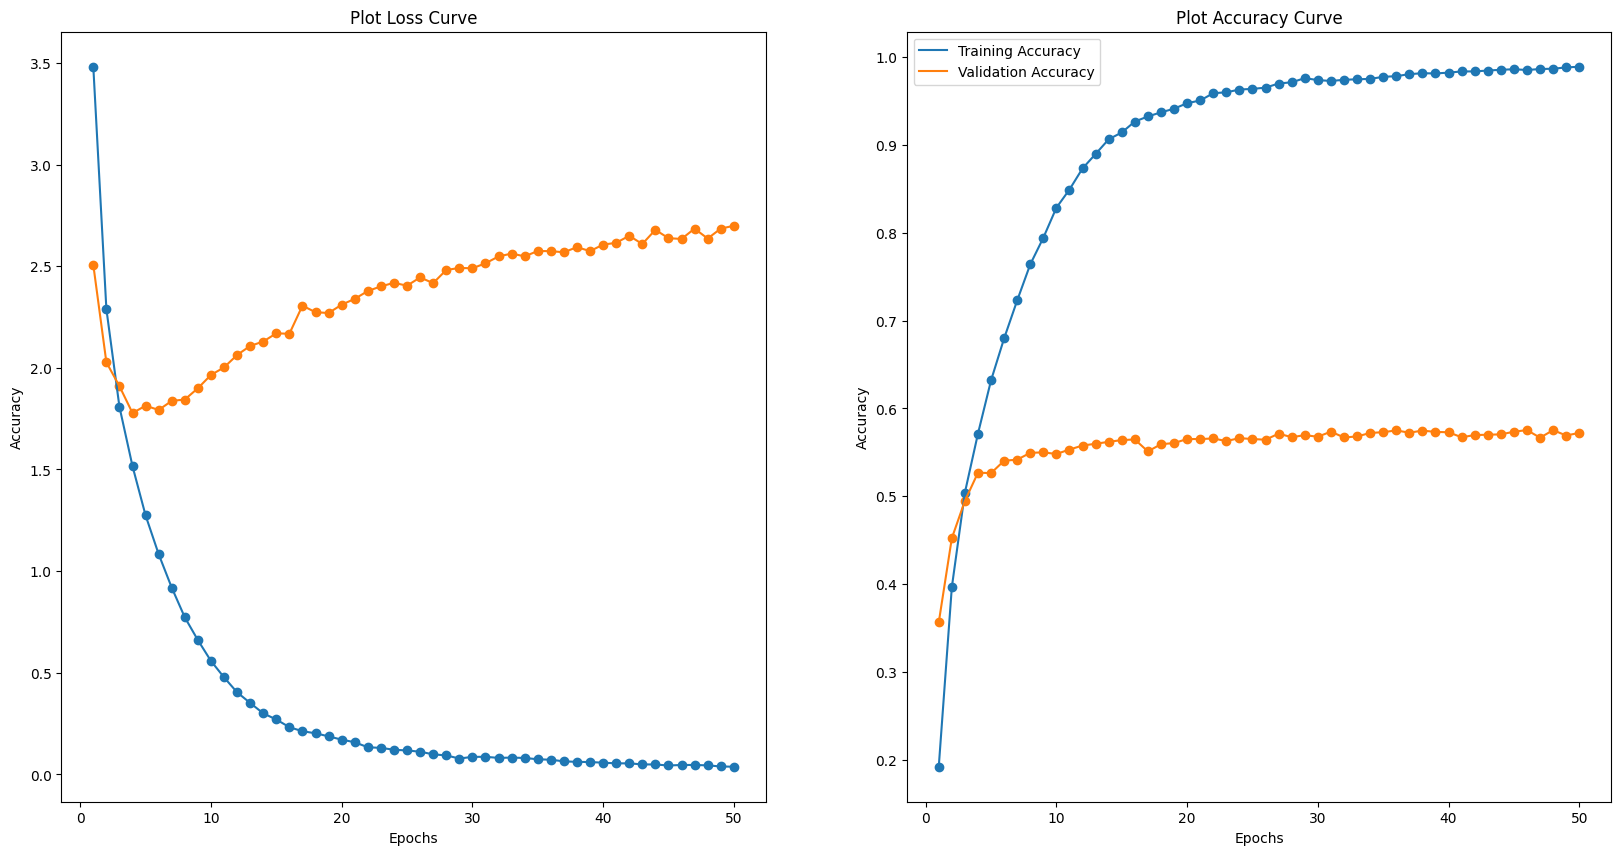

In [53]:
print(storeResult(efficientNetAugModelHistory))
plot_loss_curve(efficientNetAugModelHistory)
plt.show()

<u><b>Observation</b></u>

Comparing the EfficientNetV2 model with augmentation and model without augmentation, we can see that the model decreased slightly but the training and validation loss decreased which suggest the model fitting more generalise to the augmented data.

##### EfficientNetV2B0 model with CutMix Augmentation


In [54]:
tf.keras.backend.clear_session()
inputs = Input(IMG_SIZE)  # Input
x = pre_processing_v1(inputs)
x = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(
    include_top=False,
    weights='imagenet',
    input_shape=IMG_SIZE,
    pooling="max",
    include_preprocessing=False
)(x)
x = Flatten()(x)
x = Dense(NUM_CLASS, 'softmax')(x)
efficientNetCutMixModel = Model(
    inputs=inputs, outputs=x, name="efficientNetV2CutMix")
efficientNetCutMixModel.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                                loss='categorical_crossentropy', metrics=['accuracy'])


In [55]:
efficientNetCutMixModelHistory = efficientNetCutMixModel.fit(train_ds_cutmix, epochs=50,
                                               validation_data=(x_val, y_val), batch_size=BATCH_SIZE, callbacks=EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True))


Epoch 1/50
625/625 [==============================] - 107s 112ms/step - loss: 3.4472 - accuracy: 0.2016 - val_loss: 2.4806 - val_accuracy: 0.3609
Epoch 2/50
625/625 [==============================] - 86s 137ms/step - loss: 2.2219 - accuracy: 0.4133 - val_loss: 2.0129 - val_accuracy: 0.4606
Epoch 3/50
625/625 [==============================] - 92s 147ms/step - loss: 1.7405 - accuracy: 0.5216 - val_loss: 1.8431 - val_accuracy: 0.5000
Epoch 4/50
625/625 [==============================] - 159s 255ms/step - loss: 1.4303 - accuracy: 0.5935 - val_loss: 1.7641 - val_accuracy: 0.5248
Epoch 5/50
625/625 [==============================] - 93s 145ms/step - loss: 1.1901 - accuracy: 0.6546 - val_loss: 1.7518 - val_accuracy: 0.5414
Epoch 6/50
625/625 [==============================] - 71s 114ms/step - loss: 1.0052 - accuracy: 0.6988 - val_loss: 1.7931 - val_accuracy: 0.5393
Epoch 7/50
625/625 [==============================] - 74s 119ms/step - loss: 0.8399 - accuracy: 0.7470 - val_loss: 1.8187 - val_

C:\Users\Soh Hong Yu\AppData\Local\Temp\ipykernel_10728\3161967465.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allResults = allResults.append(result, ignore_index=True)


{'Model Name': 'efficientNetV2CutMix', 'Epochs': 25, 'Batch Size': 64, 'Train Loss': 0.23833569884300232, 'Val Loss': 2.1801090240478516, 'Train Acc': 0.9263250231742859, 'Val Acc': 0.5681999921798706, '[Train - Val] Acc': 0.3581250309944153}


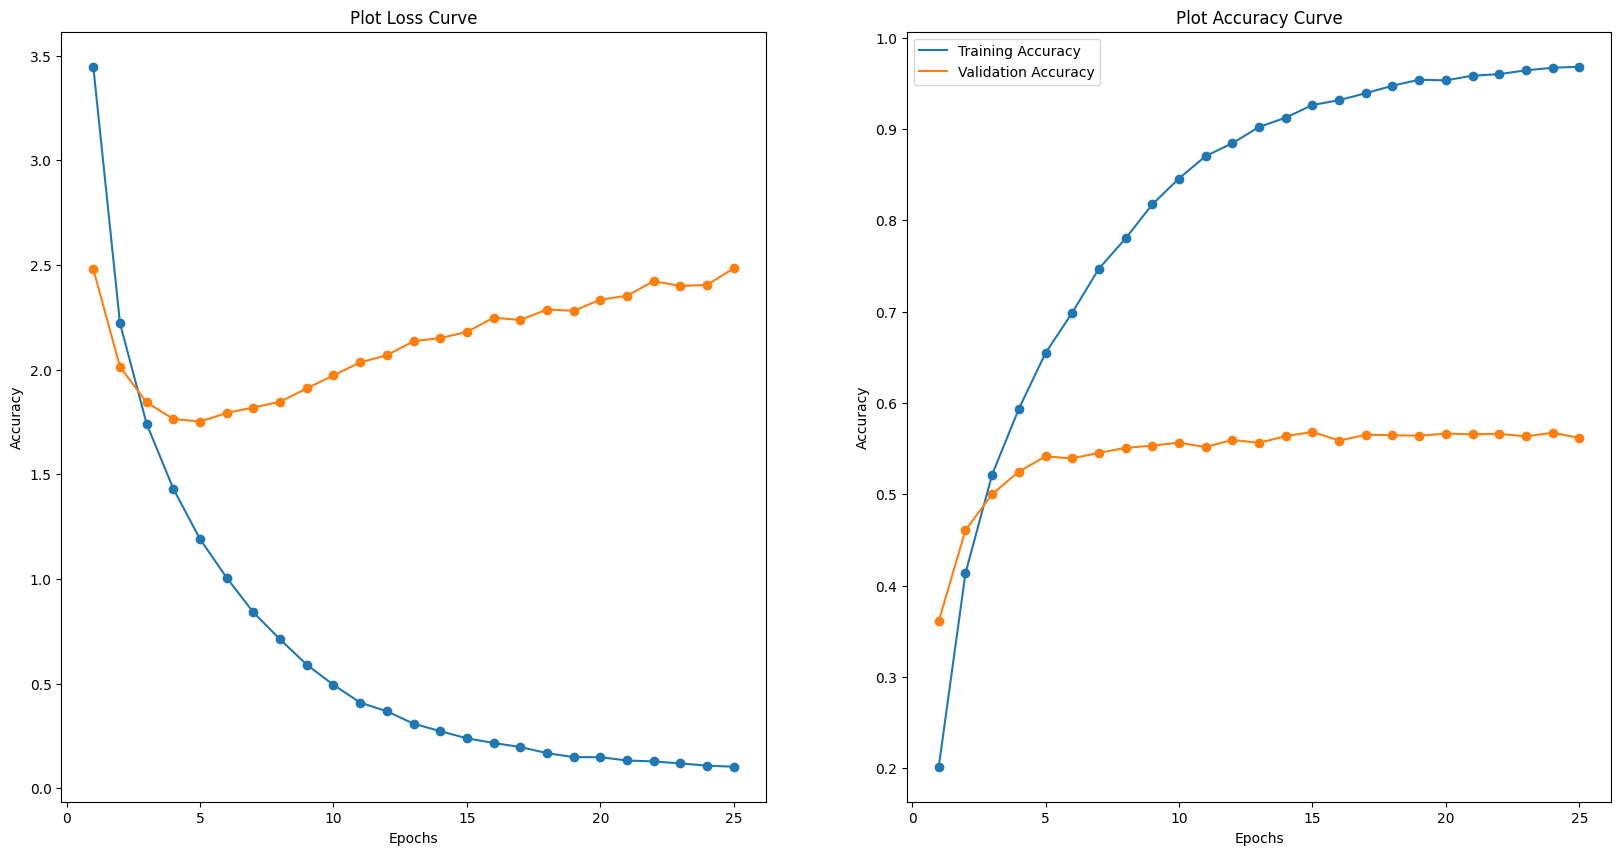

In [56]:
print(storeResult(efficientNetCutMixModelHistory))
plot_loss_curve(efficientNetCutMixModelHistory)
plt.show()

<u><b>Observation</b></u>

We can see that the validation and training accuracy decrease slightly compared to the model that as train using the unaugmented dataset but the model trained with the cutmix model manage to be more generalise as the validation and training loss decreased

# Model Selection

After running the different types of model, we need to decide on one of the model to be hyper tuned to be our final model


In [100]:
allResults.sort_values(by=["Val Acc", "Train Acc"], ascending=False).style.apply(
    lambda x: [
        "background-color: red; color: white" if v else "" for v in x == x.min()]
).apply(
    lambda x: [
        "background-color: green; color: white" if v else "" for v in x == x.max()
    ]
)


It seems like the efficientNetV2 model [pre-trained] performed the best. However, out of all the custom models, the VGG16 and VGG10 model performed the best. Therefore we will be making model improvements to the customVGG16 model and comparing the results to see if it is better than the efficientNetV2 Model.

# Model Improvement - customVGG16

We will doing the following to tune the VGG models.

- Using the Cosine Annealing Learning Rate Scheduler
- Use Keras Tuner to do a search to fine


In [14]:
steps_per_epoch = np.ceil(len(x_train) / BATCH_SIZE)


In [ ]:
def tune_vgg16_model(hp):
    weight_decay = hp.Float("weight_decay", min_value=3e-4,
                            max_value=1e-2, sampling="log")
    learning_rate = hp.Float(
        "learning_rate", min_value=1e-3, max_value=1e-1, sampling="log")
    scheduler = tf.keras.optimizers.schedules.CosineDecay(
        learning_rate, 50 * steps_per_epoch)
    optimizer = SGD(learning_rate=scheduler, momentum=0.9)
    inputs = Input(IMG_SIZE)
    x = pre_processing_v1(inputs)
    x = vgg_block_16(2, 64, dropout=[0.3])(x)
    x = vgg_block_16(2, 128, dropout=[0.4])(x)
    x = vgg_block_16(3, 256, dropout=[0.4, 0.4])(x)
    x = vgg_block_16(3, 512, dropout=[0.4, 0.4])(x)
    x = vgg_block_16(3, 512, dropout=[0.4, 0.4])(x)
    x = Dropout(0.5)(x)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, 'relu', kernel_regularizer=l2(weight_decay))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(NUM_CLASS, 'softmax')(x)
    model = Model(inputs=inputs, outputs=x, name="tuneVGG16")
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
VGG16Tuner = kt.RandomSearch(tune_vgg16_model, objective="val_accuracy", overwrite=True, project_name="cifar100_vgg16",max_trials=3)


In [ ]:
VGG16Tuner.search(
    x_train, y_train, validation_data=(x_val, y_val), epochs=60, batch_size=BATCH_SIZE, callbacks=[
        EarlyStopping(monitor="val_accuracy", patience=10,
                      restore_best_weights=True)
    ]
)
VGG16Tuner.results_summary(num_trials=3)


Trial 3 Complete [00h 37m 03s]
val_accuracy: 0.5857999920845032

Best val_accuracy So Far: 0.6098999977111816
Total elapsed time: 03h 12m 54s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in .\cifar100_vgg16
Showing 3 best trials
Trial summary
Hyperparameters:
weight_decay: 0.001070054939430907
learning_rate: 0.022339176031524674
Score: 0.6098999977111816
Trial summary
Hyperparameters:
weight_decay: 0.0011071608759999094
learning_rate: 0.010553804410088815
Score: 0.5857999920845032
Trial summary
Hyperparameters:
weight_decay: 0.002211330377554398
learning_rate: 0.0058924994283040275
Score: 0.5669000148773193


# Tuned Model Selection

In [ ]:
vgg16_model = VGG16Tuner.get_best_models()[0]

# Model Evaluation

Now it is time to evaluate my final model. To ensure it generalise well, We want to ensure the accuracy on the testing set consistent with that on the validation set.


### Saving model


In [18]:
vgg16_model.save('models/customVGG16 - Final')
efficientNetModel.save('models/efficientNetV2')

INFO:tensorflow:Assets written to: models/customVGG16 - Final\assets


INFO:tensorflow:Assets written to: models/customVGG16 - Final\assets


In [19]:
vgg16_model.save('models/customVGG16 - Final.h5')
efficientNetModel.save('models/efficientNetV2.h5')

### Initiate model after tuning and saving


In [20]:
final_model = tf.keras.models.load_model('models/customVGG16 - Final')

final_model.summary()


Model: "tuneVGG16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 normalization (Normalizatio  (None, 32, 32, 3)        7         
 n)                                                              
                                                                 
 sequential (Sequential)     (None, 16, 16, 64)        39232     
                                                                 
 sequential_1 (Sequential)   (None, 8, 8, 128)         222464    
                                                                 
 sequential_2 (Sequential)   (None, 4, 4, 256)         1478400   
                                                                 
 sequential_3 (Sequential)   (None, 2, 2, 512)         5905920   
                                                         

### Testing Set

After training our model, we need to use the test set to test the model accuracy of the model for unseen data.


In [21]:
final_model.evaluate(x_test, y_test)


313/313 [==============================] - 7s 17ms/step - loss: 2.6634 - accuracy: 0.6155


[2.663435697555542, 0.6154999732971191]

In [22]:
y_pred = final_model.predict(x_test)


313/313 [==============================] - 4s 13ms/step


In [23]:
report = classification_report(
    np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), target_names=class_labels.values()
)
print(report)

               precision    recall  f1-score   support

        apple       0.83      0.85      0.84       100
aquarium_fish       0.77      0.72      0.75       100
         baby       0.48      0.44      0.46       100
         bear       0.34      0.30      0.32       100
       beaver       0.32      0.42      0.36       100
          bed       0.66      0.61      0.64       100
          bee       0.77      0.67      0.72       100
       beetle       0.65      0.58      0.61       100
      bicycle       0.82      0.74      0.78       100
       bottle       0.81      0.80      0.80       100
         bowl       0.54      0.44      0.49       100
          boy       0.46      0.30      0.36       100
       bridge       0.66      0.68      0.67       100
          bus       0.69      0.49      0.57       100
    butterfly       0.58      0.42      0.49       100
        camel       0.59      0.61      0.60       100
          can       0.63      0.70      0.66       100
       ca

We can see from the classification report that the model is very good at identifying and differentiating lawn_mower, sunflower, palm_tree and pickup_truck but not as good as predicting lizard, otter, rabbit and seal. Let's do a mini error analysis and find out why.


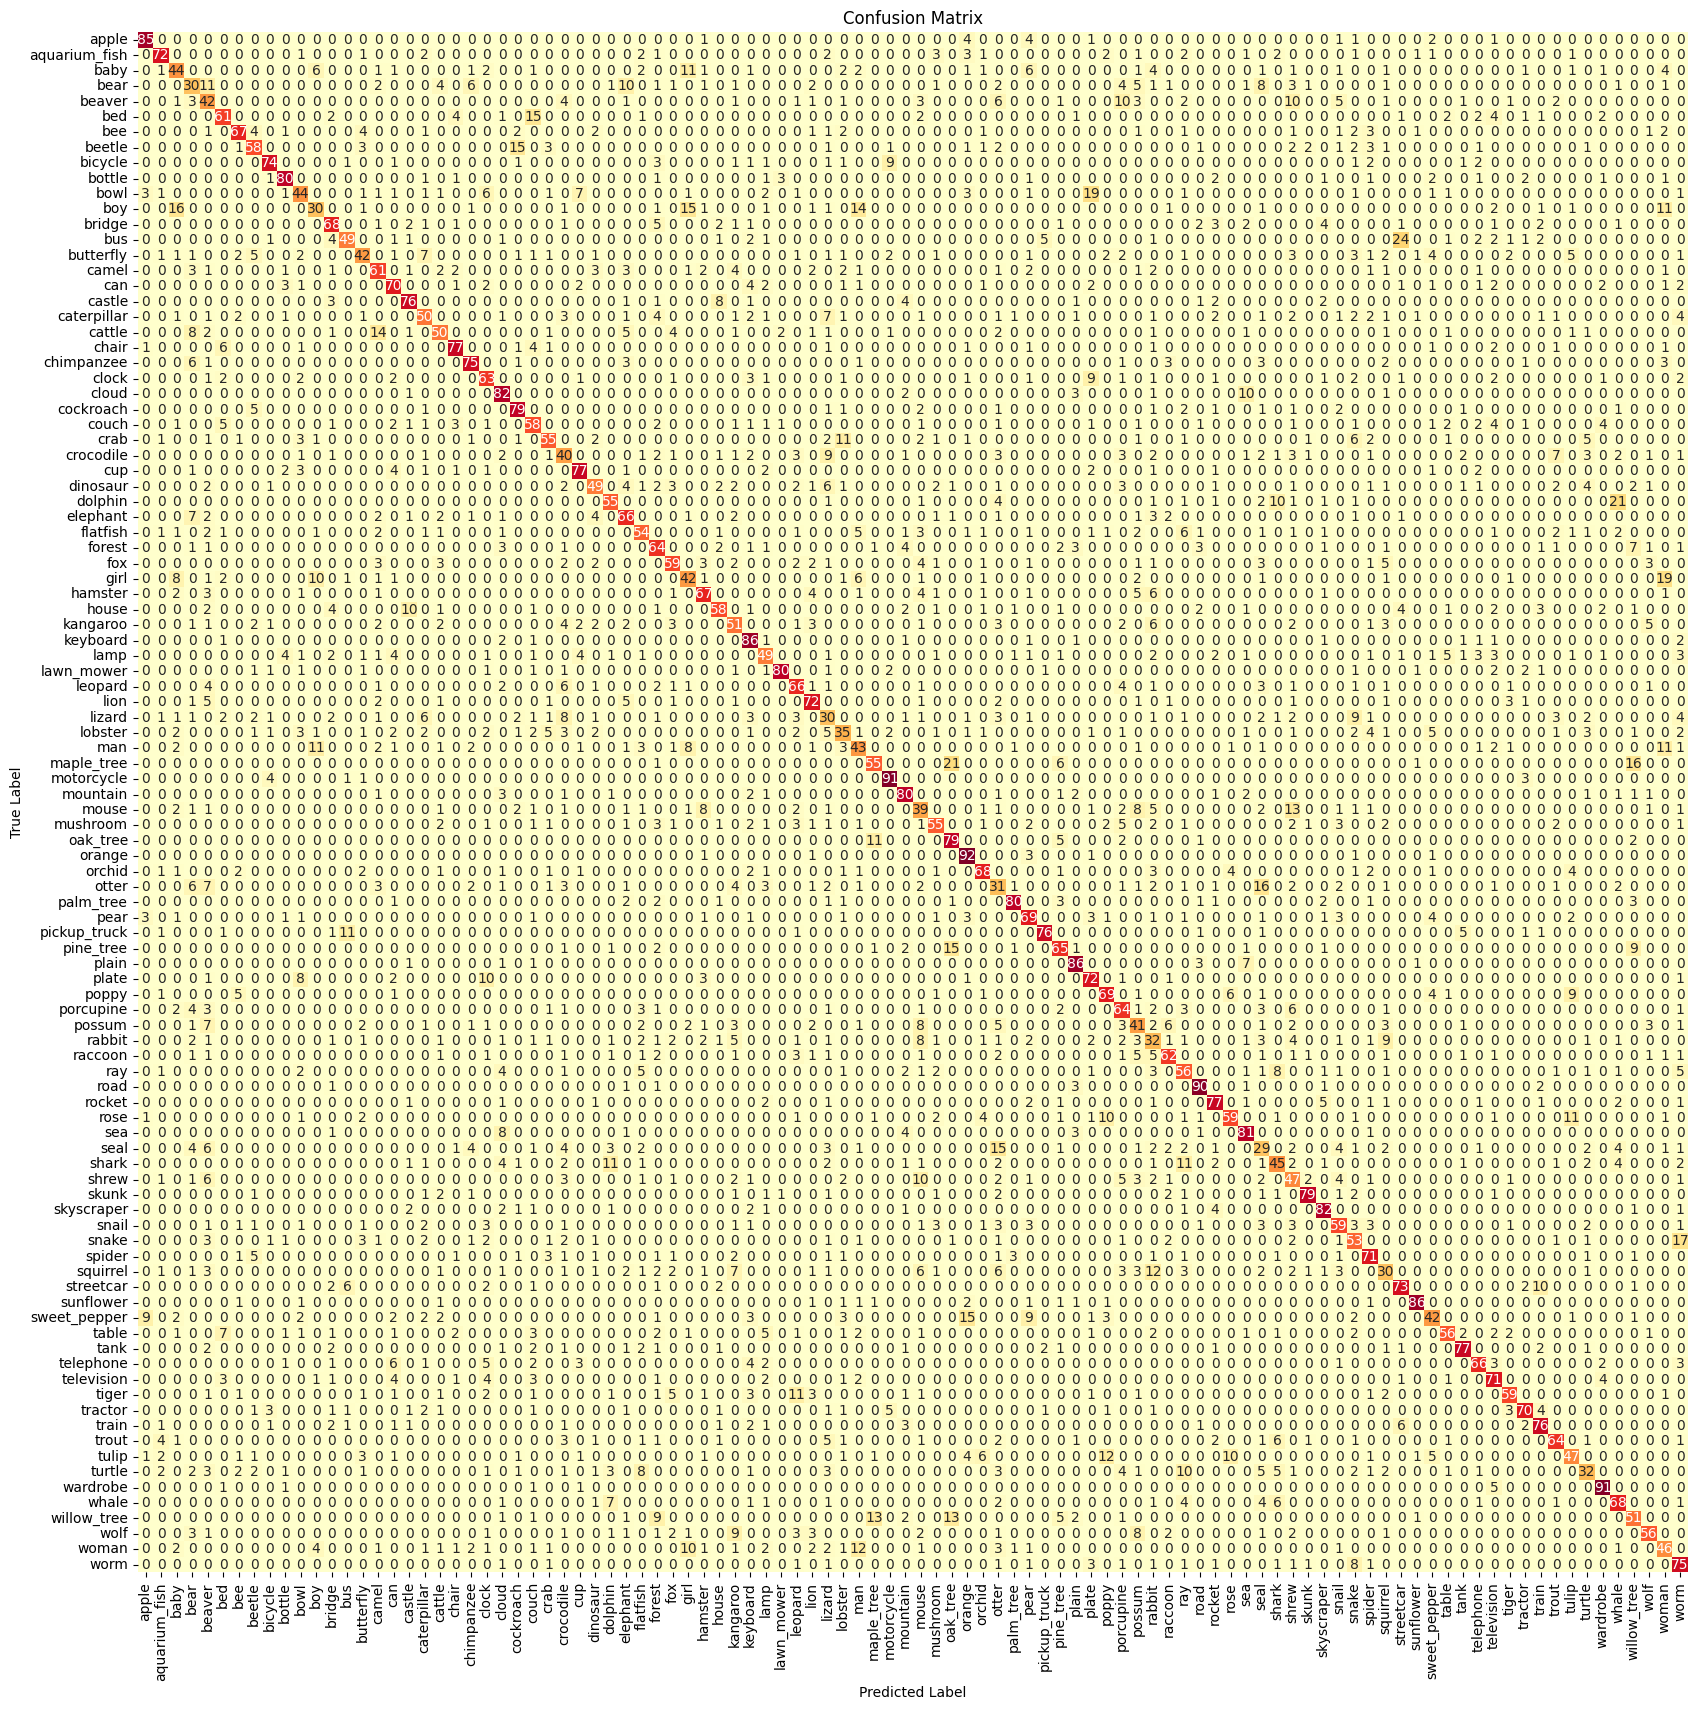

In [25]:
plt.figure(1, figsize=(20, 20))
plt.title("Confusion Matrix")
sns.heatmap(tf.math.confusion_matrix(
    np.argmax(y_test, axis=1),
    np.argmax(y_pred, axis=1),
    num_classes=NUM_CLASS,
    dtype=tf.dtypes.int32,
    name=None
), annot=True, fmt="", cbar=False, cmap="YlOrRd", yticklabels=class_labels.values(), xticklabels=class_labels.values())
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()


### Error Analysis


In [28]:
wrong = (np.argmax(y_test, axis=1) != np.argmax(y_pred, axis=1))
x_test_wrong = x_test[wrong]
y_test_wrong = np.argmax(y_test[wrong], axis=1)
y_pred_wrong = y_pred[wrong]


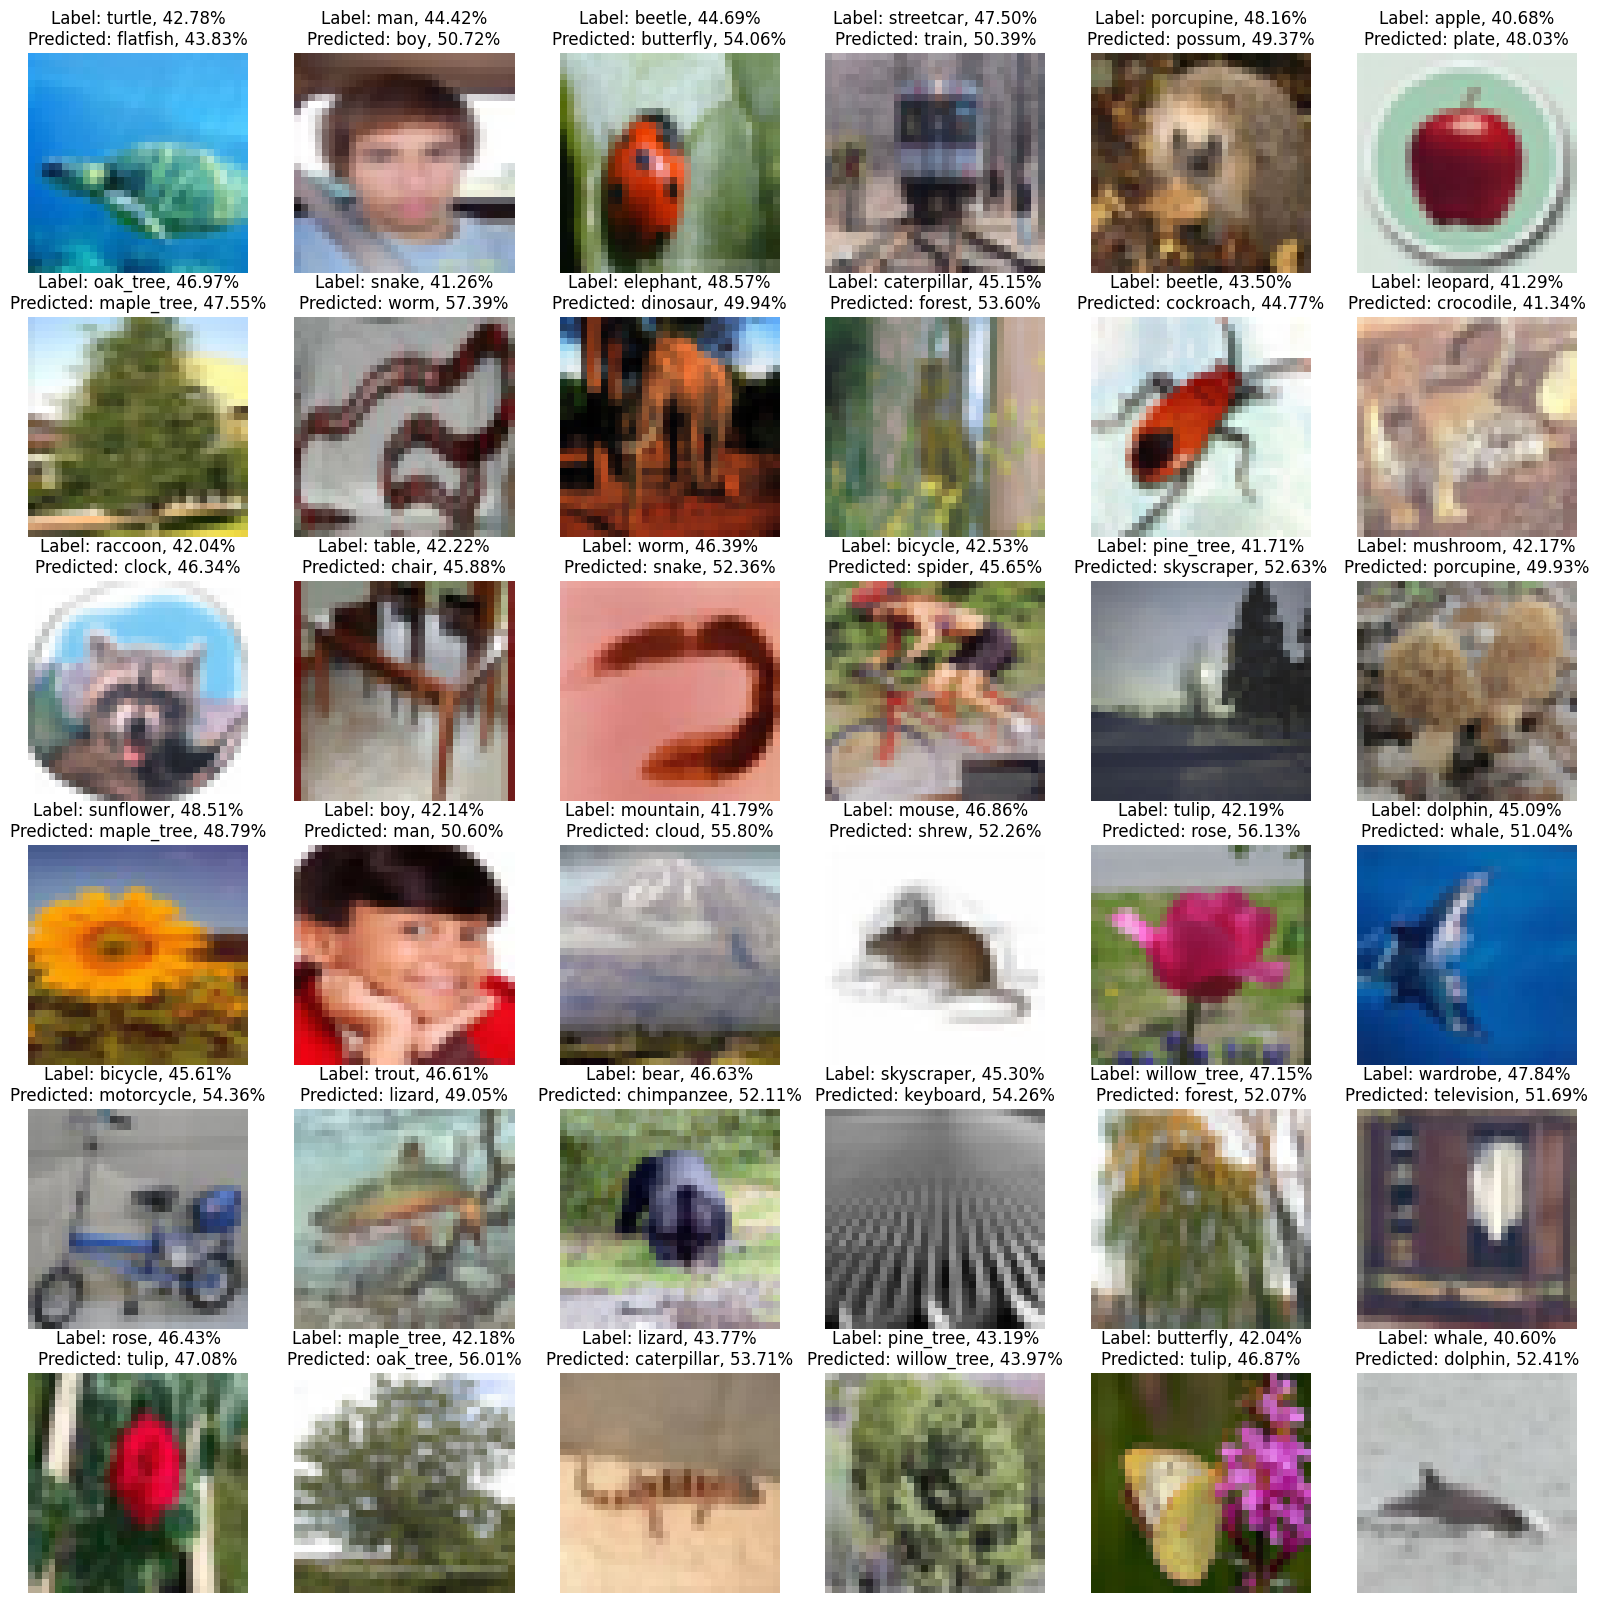

In [35]:
fig, ax = plt.subplots(6, 6, figsize=(20, 20))
existArr = []
for subplot in ax.ravel():
    idx = np.random.choice(x_test_wrong.shape[0], 1, replace=False)
    while (y_pred_wrong[idx][0][int(y_test_wrong[idx])] * 100) <= 40 or idx in existArr:
        idx = np.random.choice(x_test_wrong.shape[0], 1, replace=False)
    pred = class_labels[np.argmax(y_pred_wrong[idx])]
    subplot.axis("off")
    actual = class_labels[int(y_test_wrong[idx])]
    subplot.imshow(x_test_wrong[idx].reshape(32, 32, 3))
    subplot.set_title(f"""Label: {actual}, {(y_pred_wrong[idx][0][int(y_test_wrong[idx])] * 100):.2f}%
Predicted: {pred}, {(np.max(y_pred_wrong[idx]) * 100):.2f}%""")
    existArr.append(idx)


<u><b>Observations</b></u>

When we look at the examples that the model made a wrong prediction, we can identify some reasons why it is the case.

1. Low pixel resolutions makes images hard to be distinguished.
   - Example: Row 2 Column 4<br>That images looks a bunch of pixels [Due to low resolutions] and it is hard to distinguish the features.
2. Similar features
   - Example: Row 4 Column 4<br>The model predicted the values of a mouse and shrew wrongly. This is likely due to both mouse and shrew being mammals and having similar features like having a tail and big ears.
3. Color similarity
   - Example: Row 4 Column 5<br>Both roses and tulips come in many different colors. The model is likely confused by the color and therefore mixed up the prediction
4. Background noise
   - Example: Row 6 Column 5<br>Even though the label is butterfly, almost half the image is a flower. This might have caused the model to predict the flower instead of the butterfly.

Therefore, it appears that the model's mistakes are reasonable.


##### Comparing final_model VS other people's model

Based on PapersWithCode.com, our final model is ranked 165th out of the 183 models [Not inclusive of ours].
[https://paperswithcode.com/sota/image-classification-on-cifar-100]


# Model Visualisation


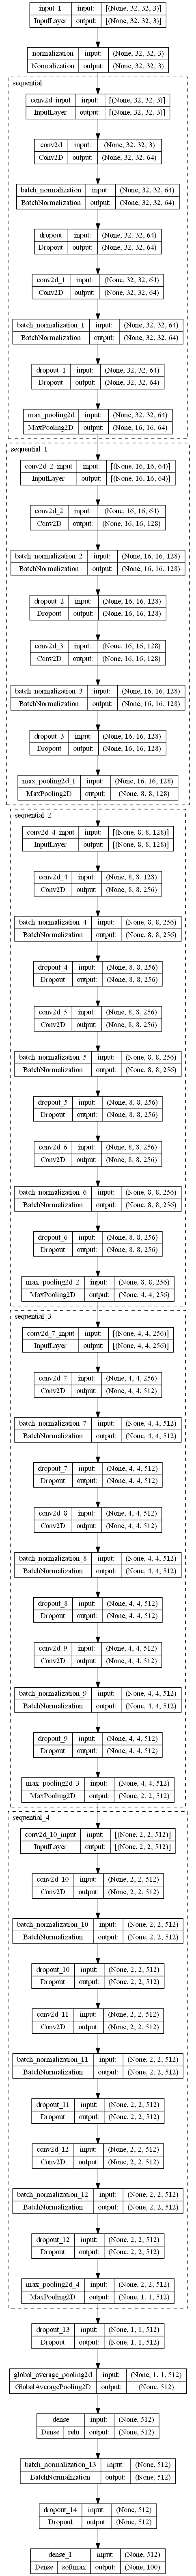

In [26]:
tf.keras.utils.plot_model(final_model, show_shapes=True,
                          expand_nested=True, show_layer_activations=True)


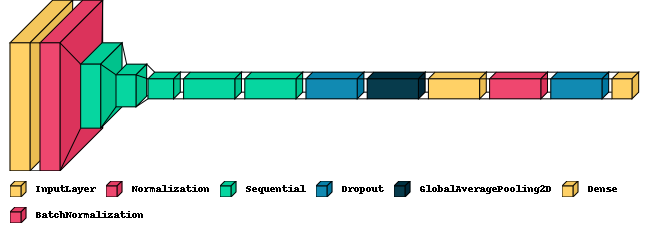

In [27]:
visualkeras.layered_view(final_model,legend=True, to_file="vgg.png")

# Summary

In summary, I experimented with various models using transfer learning and tried different image augmentation approach. More room for improvement can be made like tuning the efficientNetModel and using techniques like ensemble as well as using other callbacks like ReduceLROnPlateau to make training faster and improve accuracy.
